In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from tqdm import tqdm
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
import warnings
# import matplotlib.pyplot as plt

# 忽略特定的 UserWarning
warnings.filterwarnings("ignore", category=UserWarning)
import mplhep as hep
hep.style.use("CMS")
import os

In [2]:
torch.set_default_dtype(torch.float64)
from IPython.display import set_matplotlib_formats

colors = ['whitesmoke','c','darkorange','seagreen','limegreen','orchid','gold']
edgecolors = ['black','c','darkorange','seagreen','limegreen','orchid','gold']
color_r = ["#ffffff", "#ff6666", "#ff3333", "#ff0000", "#cc0000"]
custom_red_cmap = LinearSegmentedColormap.from_list("custom_red", color_r)
plt.cm.unregister_cmap("reds")
plt.register_cmap(name="reds", cmap=custom_red_cmap)
color_b = ["#ffffff", "#66aaff", "#3366ff", "#1144cc", "#0000aa"]
custom_blue_cmap = LinearSegmentedColormap.from_list("custom_blue", color_b[-1::-1])
plt.cm.unregister_cmap("blues_r")
plt.register_cmap(name="blues_r", cmap=custom_blue_cmap)
colors = ['whitesmoke','c','darkorange','seagreen','limegreen','orchid','gold']
edgecolors = ['black','c','darkorange','seagreen','limegreen','orchid','gold']
color_o = ["#ffffff", "#ffdaba","#ff9944","#ee6622","#cc4400",  "#772200"]
custom_orange_cmap = LinearSegmentedColormap.from_list("Oranges", color_o)
plt.cm.unregister_cmap("oranges")
plt.register_cmap(name="oranges", cmap=custom_orange_cmap)

color_g = ["#ffffff", "#cceecc","#99ee99","#55bb66","#339944",  "#113322"]
custom_green_cmap = LinearSegmentedColormap.from_list("Greens", color_g)
plt.cm.unregister_cmap("greens")
plt.register_cmap(name="greens", cmap=custom_green_cmap)

set_matplotlib_formats('png', 'pdf', 'svg')
set_matplotlib_formats('retina')
plt.rcParams['figure.dpi'] = 70     
plt.rcParams.update({'font.size': 24})

/tmp/ipykernel_752178/2824297745.py:8: MatplotlibDeprecationWarning: The unregister_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.unregister(name)`` instead.
  plt.cm.unregister_cmap("reds")
/tmp/ipykernel_752178/2824297745.py:9: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(name="reds", cmap=custom_red_cmap)
/tmp/ipykernel_752178/2824297745.py:12: MatplotlibDeprecationWarning: The unregister_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.unregister(name)`` instead.
  plt.cm.unregister_cmap("blues_r")
/tmp/ipykernel_752178/2824297745.py:13: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``m

In [3]:
iaxgbcode='xgb_Wd_sftmx_md10'
xgbcode='xgb_Wd_sftmx_md10'
iacecode='Wd_x40x60_x100'
iacode='x7x3'
occode = 'Wd_x40x60_x100'
# filecode = 'InfA_xgb_AJF_x2'
filecode = f'{occode}_{iaxgbcode}_{iacode}'
folder_name = f"/vols/cms/hw423/WeekF/plots/{filecode}"
# occode = 'InfAwar_test_rmvd_ubld_40'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    print(f"folder'{folder_name}' has made")
else:
    print(f"folder '{folder_name}' already exists")

# filecode = f'{occode}_x6'
# oc = np.load(f'/vols/cms/hw423/Data/Week14/Combined_octest_{filecode}.npy')
# Lb = pd.read_pickle('/vols/cms/hw423/Data/Week14/Label.pkl')
# dfw = pd.read_pickle('/vols/cms/hw423/Data/Week14/weight.pkl')

oc_ia_ce = np.load(f'/vols/cms/hw423/Data/Week14/Post/octest_{iacecode}_{iacode}.npy')
oc_ia_xgb = np.load(f'/vols/cms/hw423/Data/Week14/Post/octest_{iaxgbcode}_{iacode}.npy')
Lb = pd.read_pickle('/vols/cms/hw423/Data/Week14/label_InfA_DPrmvd.pkl')
dfw = pd.read_pickle('/vols/cms/hw423/Data/Week14/weight_InfA_DPrmvd.pkl')
dfy = pd.get_dummies(Lb)

true = torch.tensor(np.array(dfy).astype(int))
labels = torch.tensor(np.array(Lb))
label = torch.tensor(np.array(dfy),dtype = torch.float64)
OC_ia_ce = torch.tensor(oc_ia_ce)
OC_ia_xgb = torch.tensor(oc_ia_xgb)

weight = torch.tensor(np.array(dfw),dtype = torch.float64)
w_1 = torch.ones(weight.size())
test_loss_ia_ce = np.load(f'/vols/cms/hw423/Data/Week14/Post/test_loss_{iacecode}_{iacode}.npy')
train_loss_ia_ce = np.load(f'/vols/cms/hw423/Data/Week14/Post/train_loss_{iacecode}_{iacode}.npy')
test_loss_ia_xgb = np.load(f'/vols/cms/hw423/Data/Week14/Post/test_loss_{iaxgbcode}_{iacode}.npy')
train_loss_ia_xgb = np.load(f'/vols/cms/hw423/Data/Week14/Post/train_loss_{iaxgbcode}_{iacode}.npy')
test_loss_ce = np.load(f'/vols/cms/hw423/Data/Week14/test_loss_bce_{occode}.npy')
train_loss_ce = np.load(f'/vols/cms/hw423/Data/Week14/train_loss_bce_{occode}.npy')
# test_loss = np.load(f'/vols/cms/hw423/Data/Week14/test_loss_{filecode}.npy')
# train_loss = np.load(f'/vols/cms/hw423/Data/Week14/train_loss_{filecode}.npy')




col = ['$\gamma\gamma$','ggH','qqH','WH','ZH','ttH','tH']

folder '/vols/cms/hw423/WeekF/plots/Wd_x40x60_x100_xgb_Wd_sftmx_md10_x7x3' already exists


In [4]:

def smooth_argmax(tensor, dim=-1, temperature=1.0):
    softmax_tensor =F.softmax(tensor / temperature, dim=dim)
    return softmax_tensor
def confusion_matrix(OC,label,weight):
    label_w = 138000*weight.unsqueeze(1)*label
    pred_matrix = smooth_argmax(OC,temperature=.0000001,dim=1)
    # pred_matrix_w = weight.unsqueeze(1)*pred_matrix
    confusion_matrix = torch.matmul(pred_matrix.t(),label_w)[:,:]
    return confusion_matrix

def nll(theta1,cm):
    O = torch.sum(cm,dim=1)
    theta0 = torch.ones(1)
    theta = torch.cat([theta0,theta1])
    return -(O@(torch.log(cm@theta))-torch.sum((cm@theta)))

col = ['$\gamma\gamma$','ggH','qqH','WH','ZH','ttH','tH']
def plot_confusion_matrix(cm, title1='Confusion Matrix', title2 = 'Col Normalised', cmap=plt.cm.Blues, filename='confusion_matrix',**kwargs):
    fig, ax = plt.subplots(figsize=(8,6.4))
    plot_params = {k: v for k, v in kwargs.items()}
    mask = abs(cm) < 0.005
    annot = np.where(mask, "", np.round(cm*100).astype(int).astype(str))
    cmap = sns.color_palette(cmap, as_cmap=True)
    cmap_colors = ['white'] + list(cmap(np.linspace(0, 1, cmap.N)))
    custom_cmap = mcolors.ListedColormap(cmap_colors)
    boundaries = [-0.005, 0.005] + list(np.linspace(0.005, 1, cmap.N))
    norm = mcolors.BoundaryNorm(boundaries=boundaries, ncolors=len(boundaries))
    
    ax = sns.heatmap(cm,annot=annot, fmt='',linewidths=1,linecolor='grey', cmap=custom_cmap,norm=norm,**plot_params)  # Using '.2f' for floating point format
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    # ax.set_title(title)
    ax.set_xticklabels(col[1:])
    ax.set_yticklabels(col[1:])
    x0, y0, width, height = ax.get_position().bounds
    rect = plt.Rectangle((x0, y0), width, height, fill=False, edgecolor='black', lw=4, transform=plt.gcf().transFigure, figure=plt.gcf())
    plt.gca().add_patch(rect)
    cbar = ax.collections[0].colorbar
    def percentage(x, pos):
        return f'{x*100:.0f}'
    cbar.ax.yaxis.set_major_formatter(FuncFormatter(percentage))
    cbar.ax.yaxis.set_major_locator(MaxNLocator(nbins=11))
    cbar.ax.yaxis.set_minor_locator(plt.NullLocator())
    cbar.set_label('Category signal composition (%)')
    cbar.outline.set_linewidth(2)
    
    plt.title(f"{title1}",loc='left',fontweight='bold')
    plt.title(f"{title2}",loc='right')

    fig.savefig(f'{folder_name}/{filename}.pdf', bbox_inches='tight')

tensor([1., 1., 1.,  ..., 1., 1., 1.])

In [5]:
ratio = pd.concat([dfw,pd.DataFrame(dfy.idxmax(axis=1),columns=['proc'])],axis=1).groupby(['proc']).sum()/dfw.sum()
rt = torch.tensor(np.array(ratio),dtype = torch.float64)
wone = torch.ones(weight.size())
rtb = label@rt
# oc_test =  np.load('/vols/cms/hw423/Data/Week14/octest_InfA_xgb_AJF.npy')
oc_xgb =  np.load(f'/vols/cms/hw423/Data/Week14/octest_{xgbcode}.npy')
OC_xgb = torch.tensor(oc_xgb,dtype = torch.float64)
oc_ce = np.load(f'/vols/cms/hw423/Data/Week14/octest_{occode}.npy')
OC_ce = torch.tensor(oc_ce,dtype = torch.float64)
prior = rt.view(1,-1)
OC_ce_new = OC_ce * prior
OC_xgb_new = OC_xgb * prior
OC_ia_xgb_new = OC_ia_xgb *prior

cm_ce = confusion_matrix(OC_ce,label,weight).to(torch.float64)
cm_ce_new = confusion_matrix(OC_ce_new,label,weight).to(torch.float64)
cm_xgb = confusion_matrix(OC_xgb,label,weight).to(torch.float64)
cm_xgb_new = confusion_matrix(OC_xgb_new,label,weight).to(torch.float64)
# cm_ia_ce = confusion_matrix(OC_ia_ce,label,weight).to(torch.float64)
cm_ia_xgb = confusion_matrix(OC_ia_xgb,label,weight).to(torch.float64)
cm_ia_xgb_new = confusion_matrix(OC_ia_xgb_new,label,weight).to(torch.float64)
cm_xgb_uw = confusion_matrix(OC_xgb,label,wone).to(torch.float64)
cm_ia_uw = confusion_matrix(OC_ia_xgb,label,wone).to(torch.float64)


: 

In [ ]:
piror

# Loss

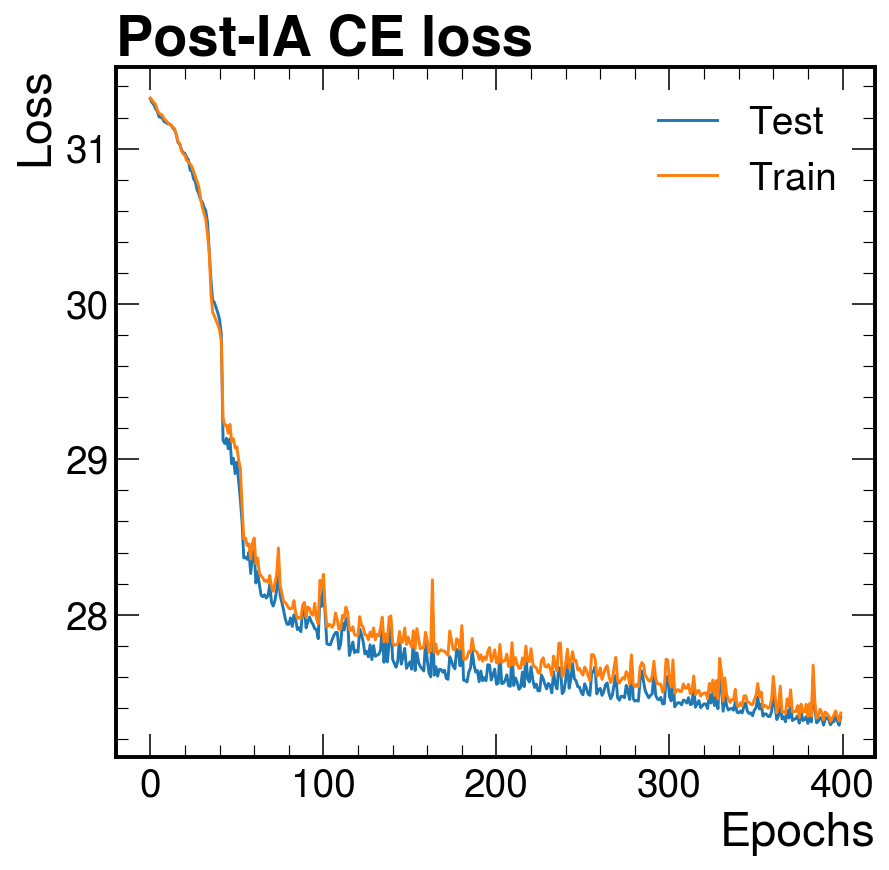

In [ ]:
# plt.plot(0.952*test_loss,label='Test')
fig,ax=plt.subplots(figsize=(7,6.4))
plt.plot(0.819*test_loss_ia_ce,label='Test')
plt.plot(train_loss_ia_ce,label = 'Train')
plt.ylabel(r'Loss')
plt.xlabel('Epochs')
plt.title('Post-IA CE loss',loc='left',fontweight='bold')
# plt.ylim(0,10)
plt.legend()
plt.savefig(f'{folder_name}/ia_Loss.pdf', bbox_inches='tight')
plt.show()


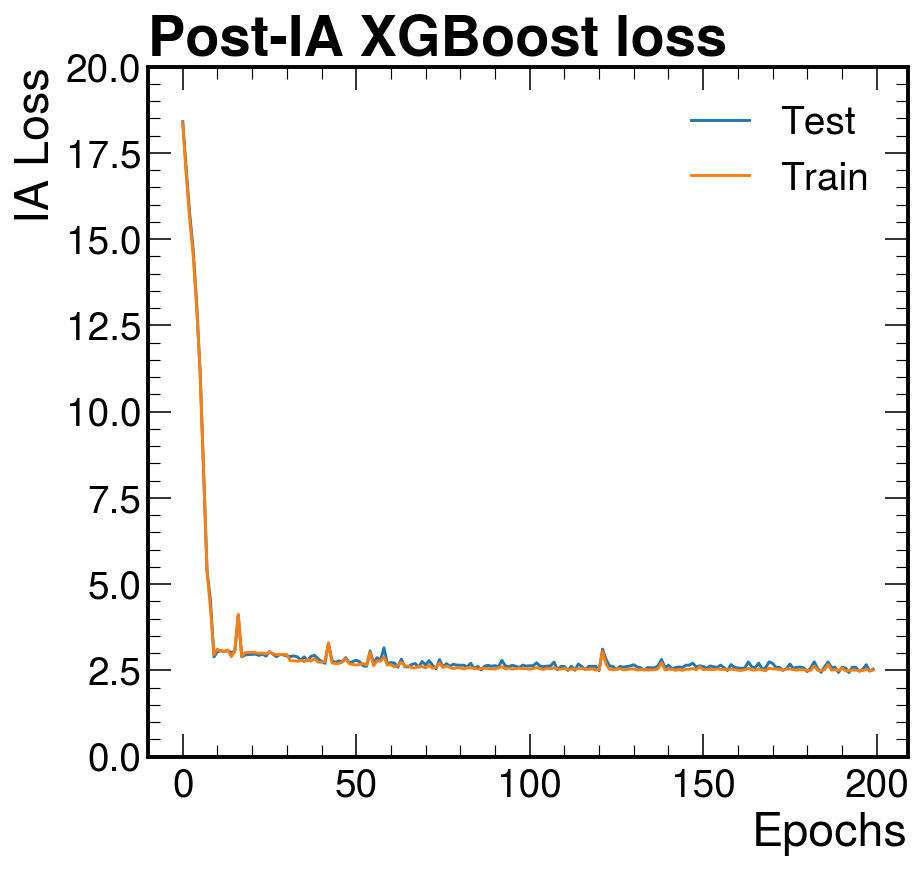

In [31]:
# plt.plot(0.952*test_loss,label='Test')
fig,ax=plt.subplots(figsize=(7,6.4))
plt.plot(0.819*test_loss_ia_xgb,label='Test')
plt.plot(train_loss_ia_xgb,label = 'Train')
plt.ylabel(r'IA Loss')
plt.xlabel('Epochs')
plt.title('Post-IA XGBoost loss',loc='left',fontweight='bold')
plt.ylim(0,20)
plt.legend()
plt.savefig(f'{folder_name}/ia_Loss_xgb.pdf', bbox_inches='tight')
plt.show()


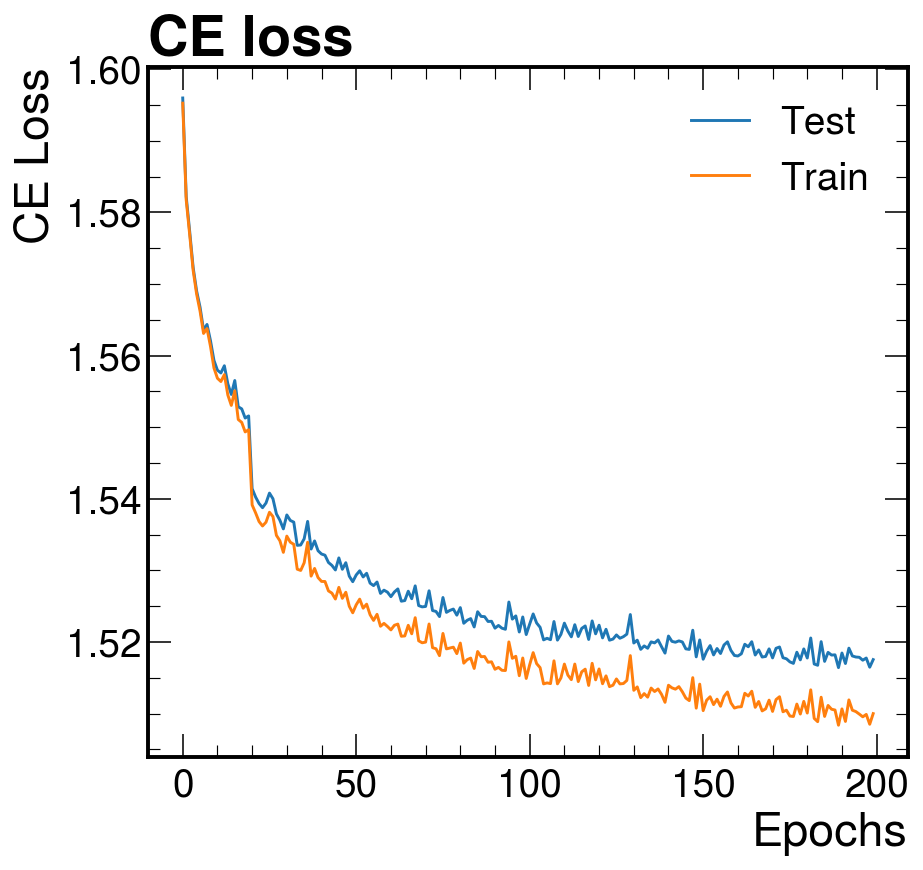

In [ ]:
fig,ax=plt.subplots(figsize=(7,6.4))
plt.plot(test_loss_ce,label='Test')
plt.plot(train_loss_ce,label = 'Train')
plt.ylabel(r'CE Loss')
plt.xlabel('Epochs')
plt.xlabel('Epochs')
plt.title('CE loss',loc='left',fontweight='bold')
plt.legend()
fig.savefig(f'{folder_name}/Loss_ce.pdf', bbox_inches='tight')
plt.show()


# CM

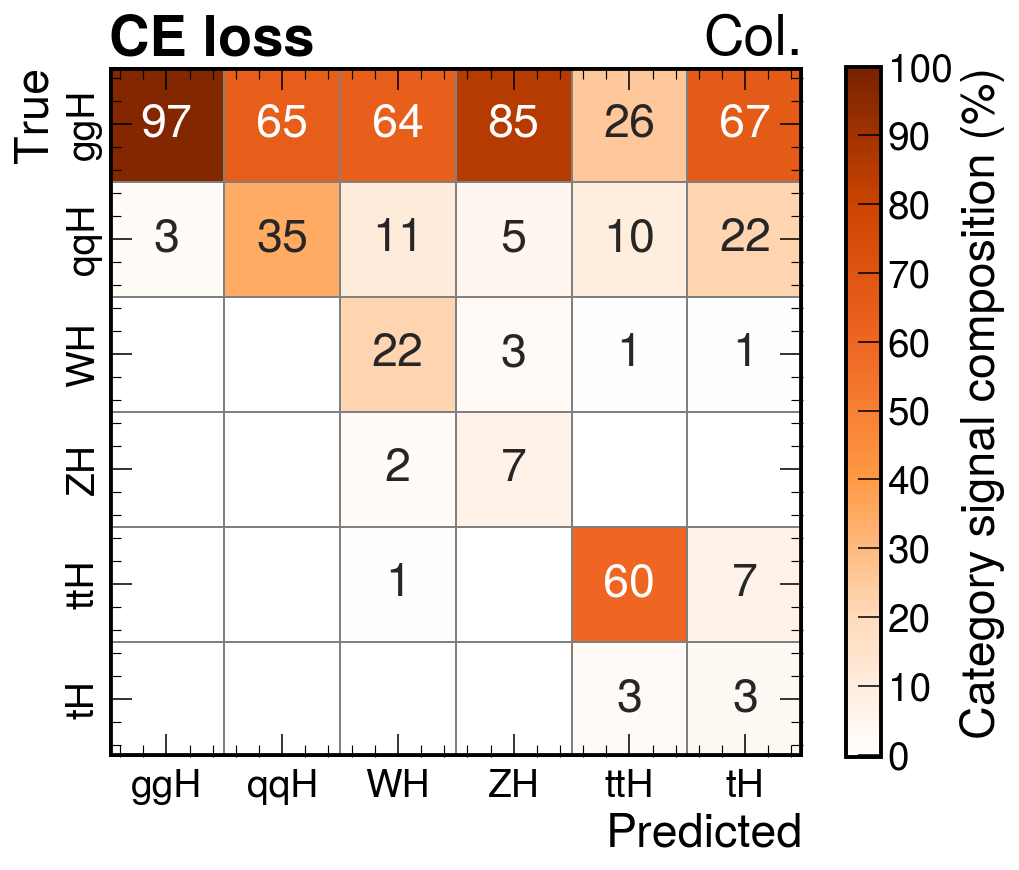

In [185]:
cm_w = pd.DataFrame(cm_ce[1:,1:].detach().numpy()).T
CM = []
for i in range(6):
    cl = cm_w.iloc[:,i]/cm_w.iloc[:,i].sum()
    CM.append(cl)
cm = pd.DataFrame(CM).T

plot_confusion_matrix(cm,title1='CE loss',title2='Col.', cmap='oranges',filename='CM_CE')

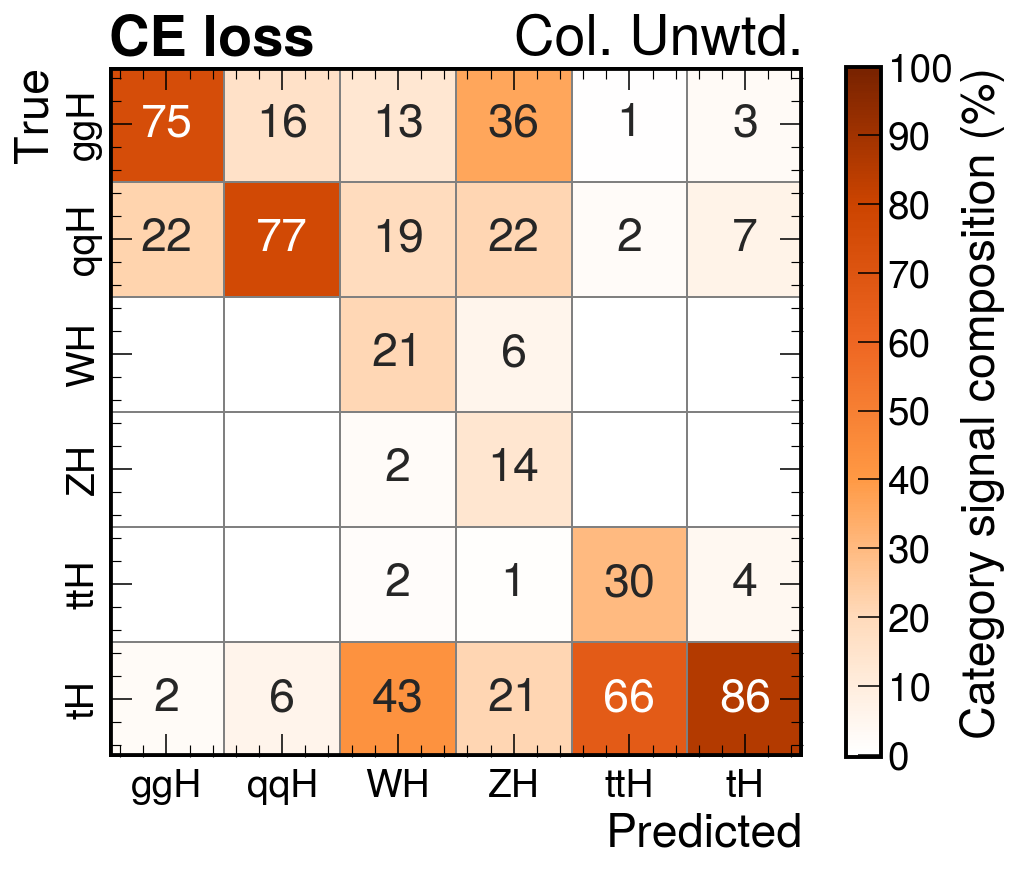

In [184]:
cm_w = pd.DataFrame(confusion_matrix(OC_ce,label,w_1)[1:,1:].detach().numpy()).T
CM = []
for i in range(6):
    cl = cm_w.iloc[:,i]/cm_w.iloc[:,i].sum()
    CM.append(cl)
cm = pd.DataFrame(CM).T

plot_confusion_matrix(cm,title1='CE loss',title2='Col. Unwtd.', cmap='oranges',filename='CM_CE_uw')

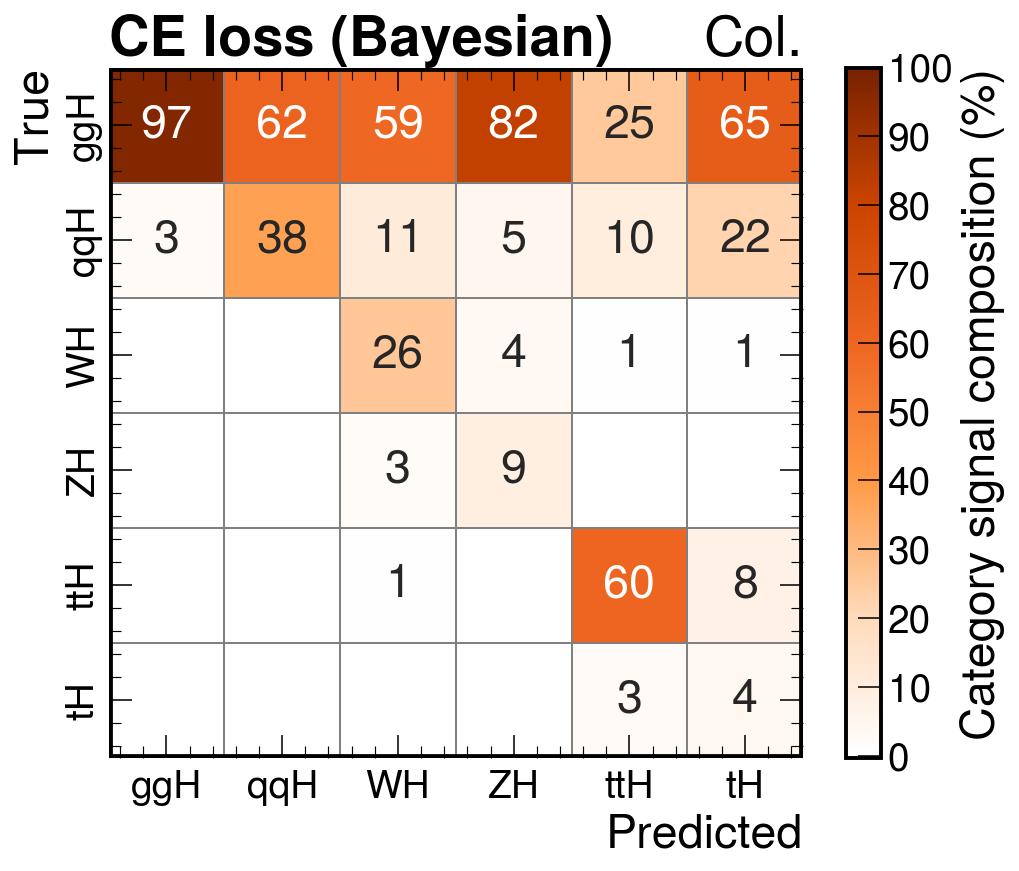

In [186]:
cm_w = pd.DataFrame(cm_ce_new[1:,1:].detach().numpy()).T
CM = []
for i in range(6):
    cl = cm_w.iloc[:,i]/cm_w.iloc[:,i].sum()
    CM.append(cl)
cm = pd.DataFrame(CM).T

plot_confusion_matrix(cm,title1='CE loss (Bayesian)',title2='Col.', cmap='oranges',filename='CM_CE_new')

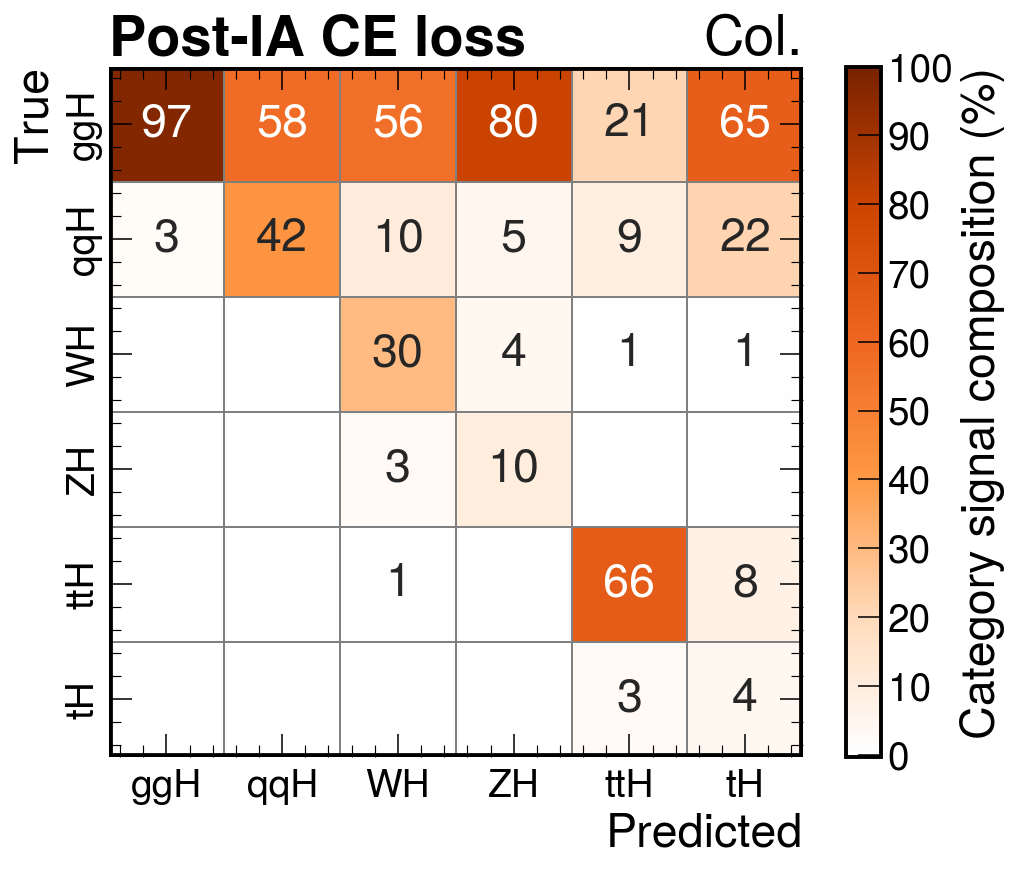

In [187]:
cm_w = pd.DataFrame(cm_ia_ce[1:,1:].detach().numpy()).T
CM = []
for i in range(6):
    cl = cm_w.iloc[:,i]/cm_w.iloc[:,i].sum()
    CM.append(cl)
cm = pd.DataFrame(CM).T

plot_confusion_matrix(cm,title1='Post-IA CE loss',title2='Col.', cmap='oranges',filename='CM_ia_CE')

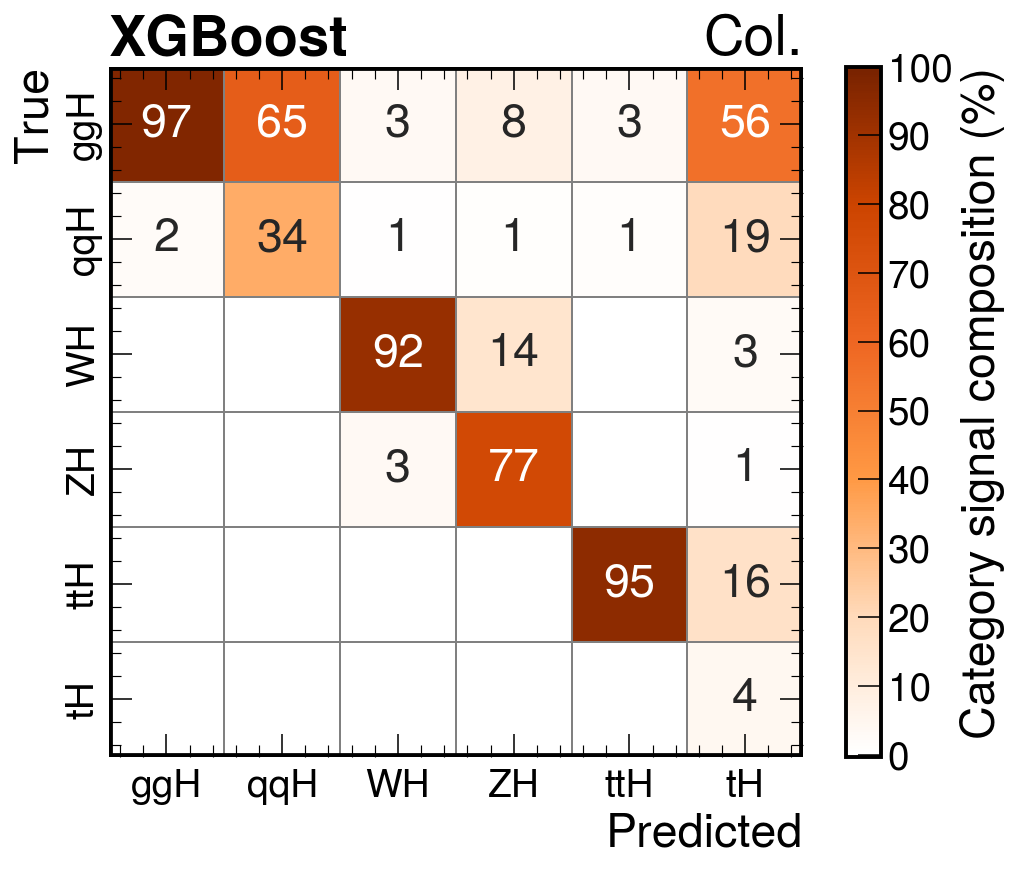

In [16]:
cm_w = pd.DataFrame(cm_xgb[1:,1:].detach().numpy()).T
CM = []
for i in range(6):
    cl = cm_w.iloc[:,i]/cm_w.iloc[:,i].sum()
    CM.append(cl)
cm = pd.DataFrame(CM).T

plot_confusion_matrix(cm,title1='XGBoost', title2 ='Col.',cmap='oranges',filename='CM_xgb')

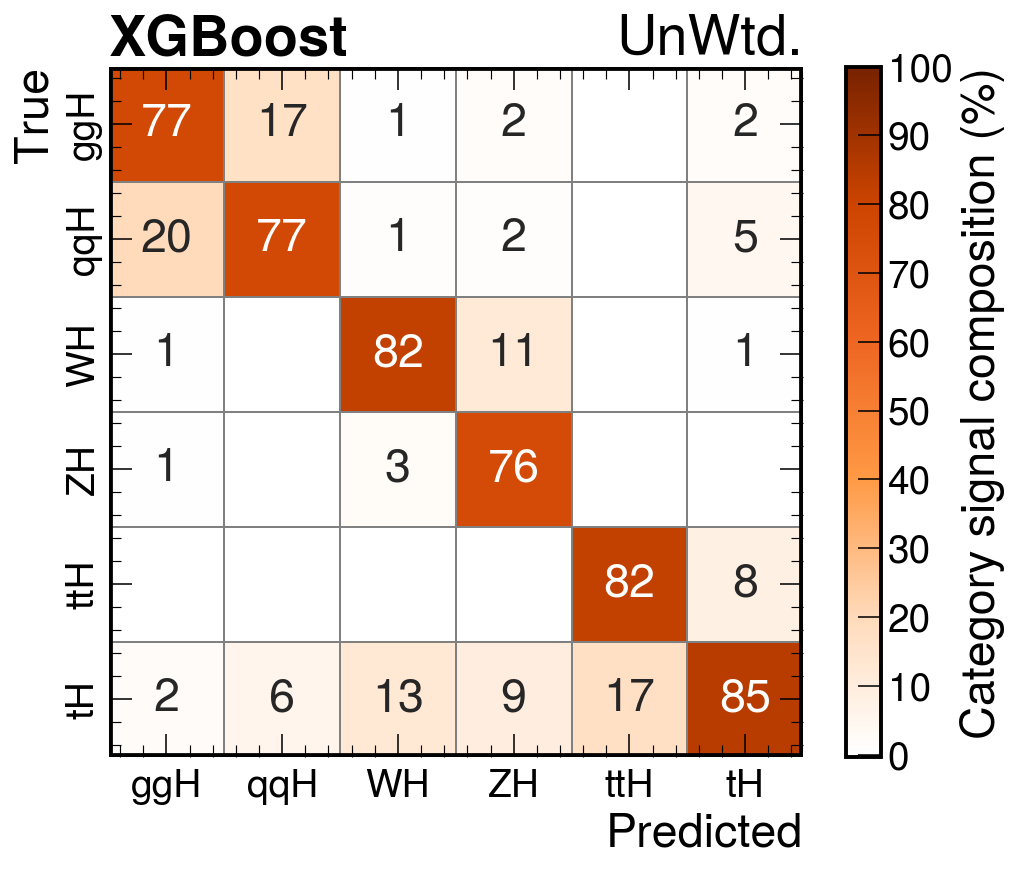

In [20]:
cm_w = pd.DataFrame(cm_xgb_uw[1:,1:].detach().numpy()).T
CM = []
for i in range(6):
    cl = cm_w.iloc[:,i]/cm_w.iloc[:,i].sum()
    CM.append(cl)
cm = pd.DataFrame(CM).T

plot_confusion_matrix(cm,title1='XGBoost', title2 ='UnWtd.',cmap='oranges',filename='CM_xgb_uw')

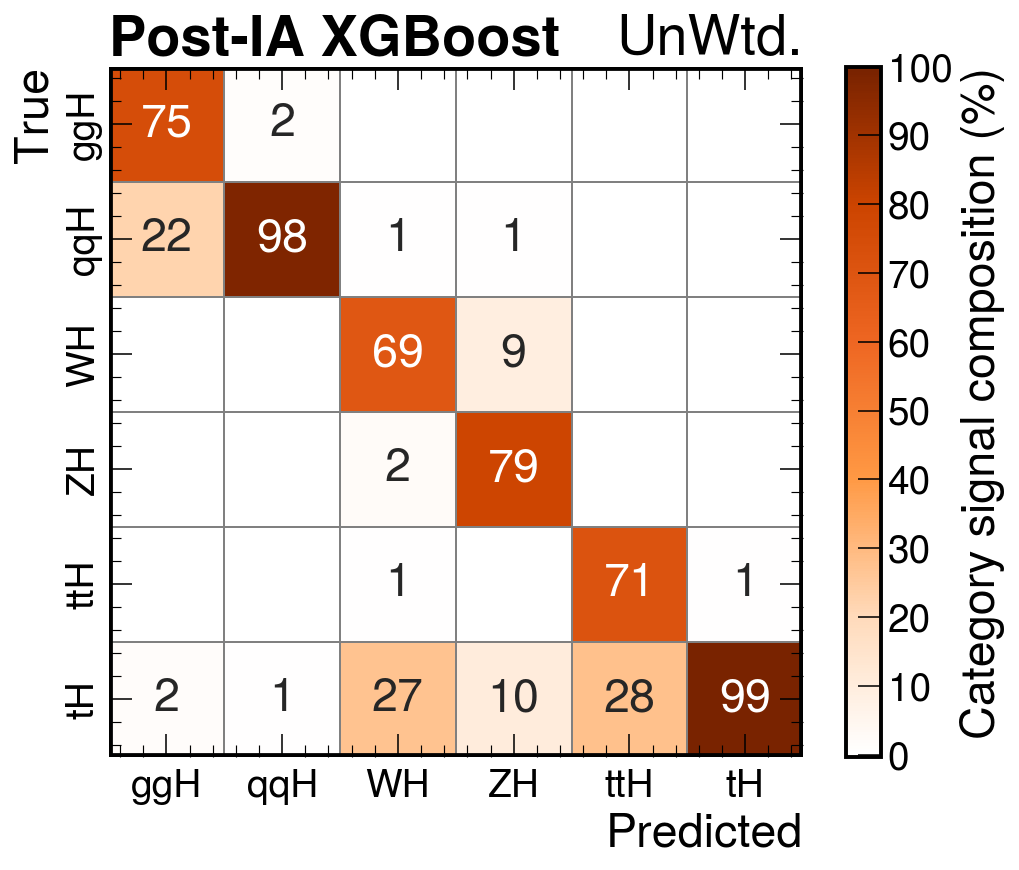

In [21]:
cm_w = pd.DataFrame(cm_ia_uw[1:,1:].detach().numpy()).T
CM = []
for i in range(6):
    cl = cm_w.iloc[:,i]/cm_w.iloc[:,i].sum()
    CM.append(cl)
cm = pd.DataFrame(CM).T

plot_confusion_matrix(cm,title1='Post-IA XGBoost', title2 ='UnWtd.',cmap='oranges',filename='CM_xgb_ia_uw')

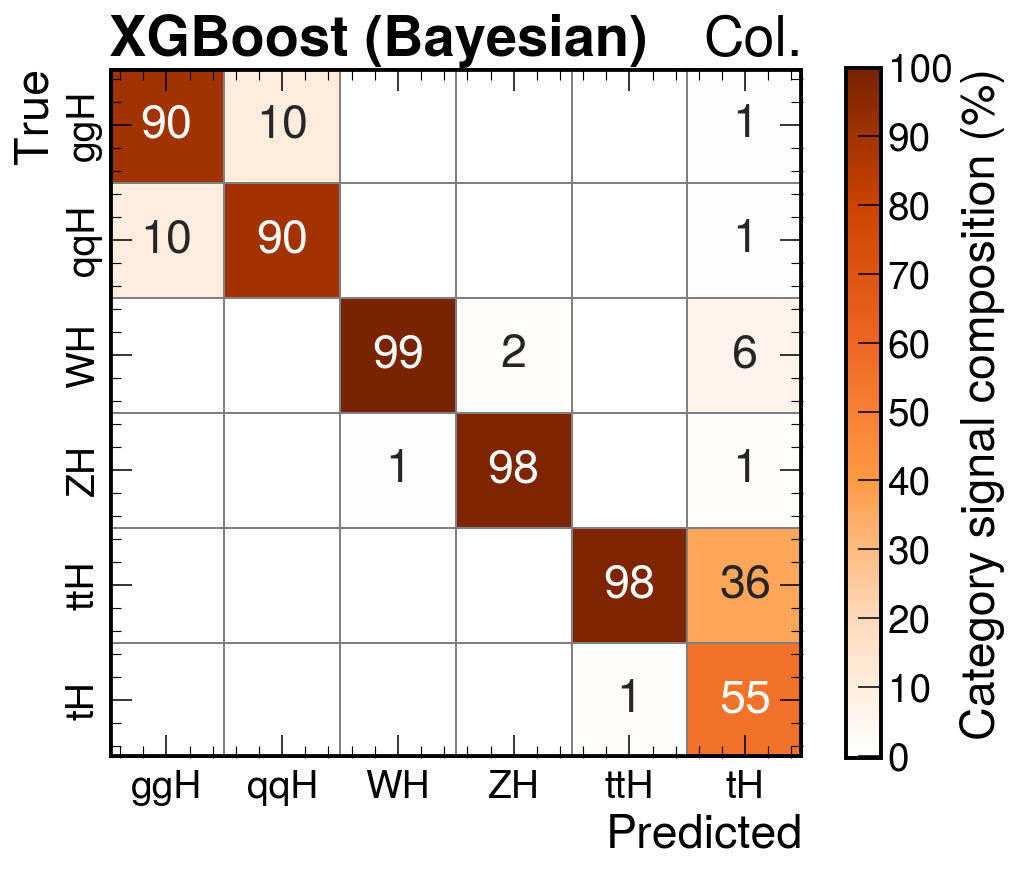

In [34]:
cm_w = pd.DataFrame(cm_xgb_new[1:,1:].detach().numpy()).T
CM = []
for i in range(6):
    cl = cm_w.iloc[:,i]/cm_w.iloc[:,i].sum()
    CM.append(cl)
cm = pd.DataFrame(CM).T

plot_confusion_matrix(cm,title1='XGBoost (Bayesian)',title2='Col.' ,cmap='oranges',filename='CM_xgb_new')

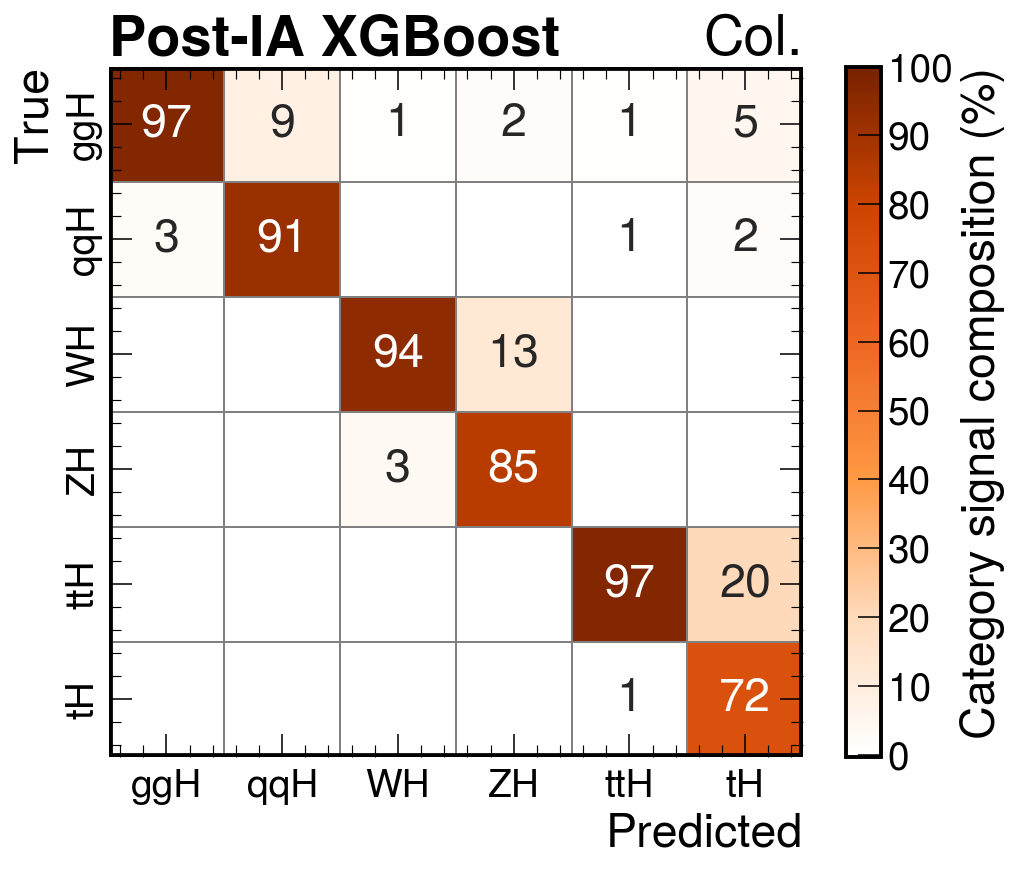

In [33]:
cm_w = pd.DataFrame(cm_ia_xgb[1:,1:].detach().numpy()).T
CM = []
for i in range(6):
    cl = cm_w.iloc[:,i]/cm_w.iloc[:,i].sum()
    CM.append(cl)
cm = pd.DataFrame(CM).T

plot_confusion_matrix(cm,title1='Post-IA XGBoost',title2='Col.' ,cmap='oranges',filename='CM_xgb_ia')

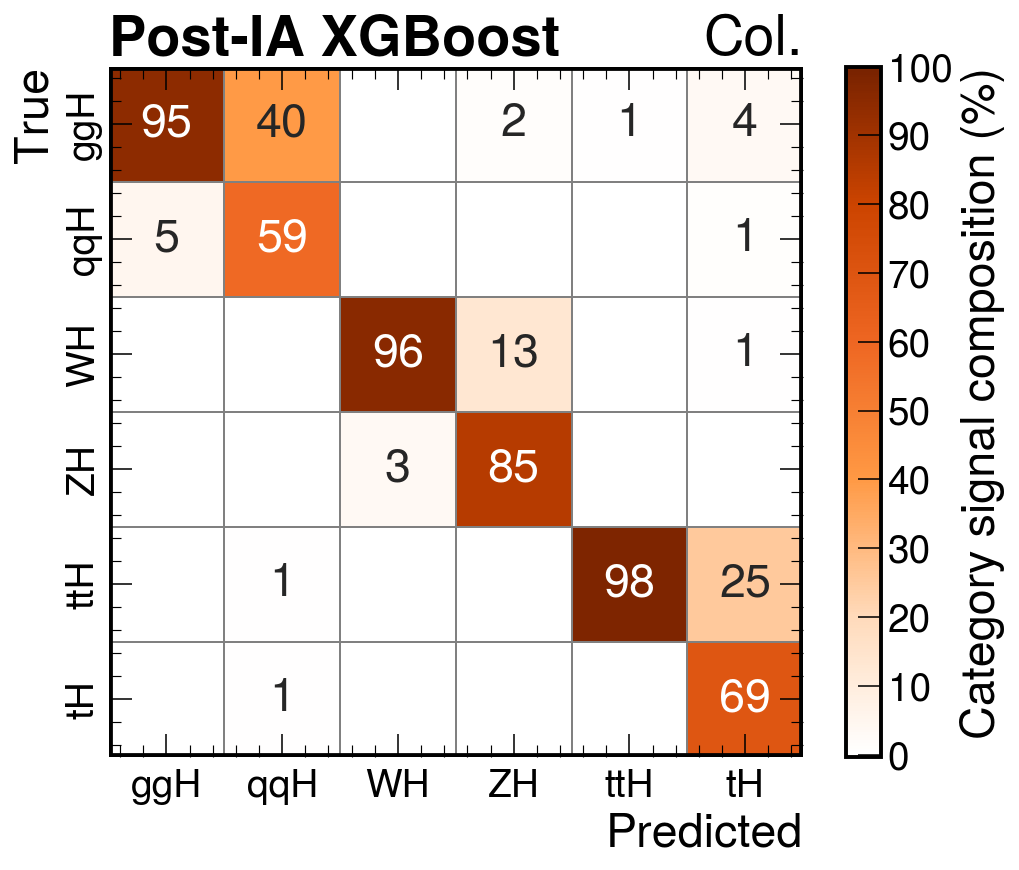

In [23]:
cm_w = pd.DataFrame(cm_ia_xgb[1:,1:].detach().numpy()).T
CM = []
for i in range(6):
    cl = cm_w.iloc[:,i]/cm_w.iloc[:,i].sum()
    CM.append(cl)
cm = pd.DataFrame(CM).T

plot_confusion_matrix(cm,title1='Post-IA XGBoost',title2='Col.' ,cmap='oranges',filename='CM_xgb_ia_test')

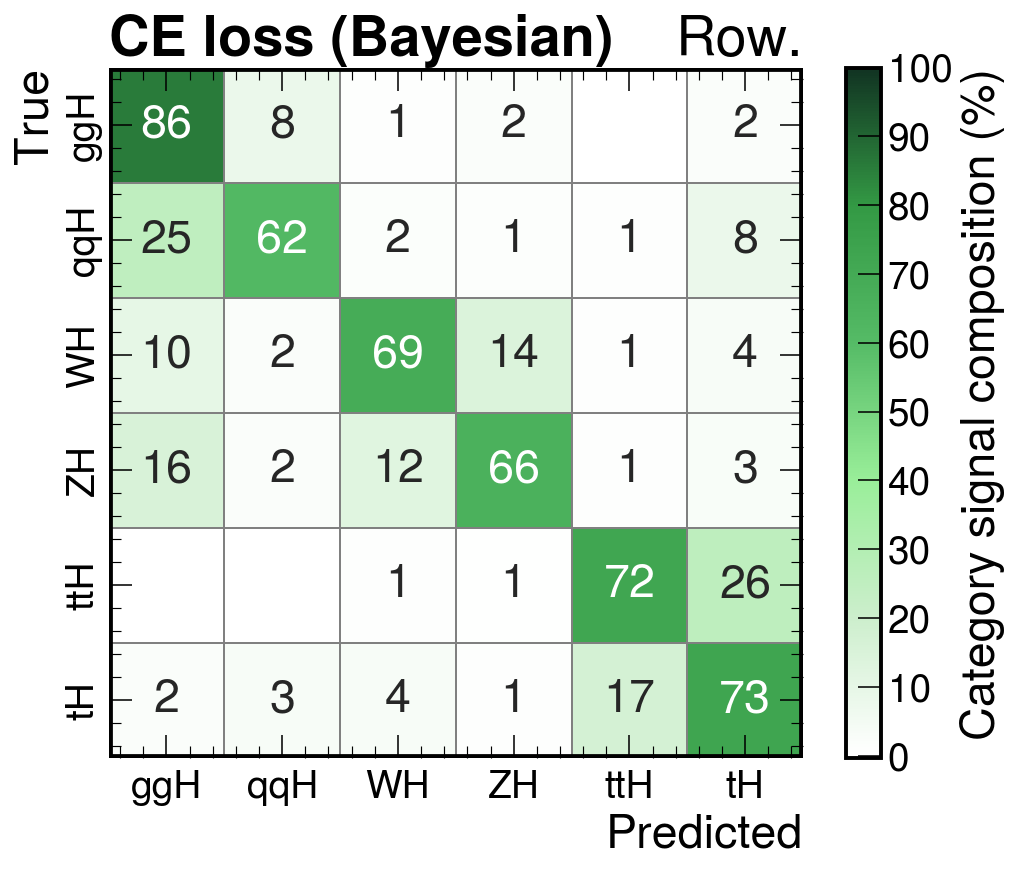

In [206]:
cm_w = pd.DataFrame(cm_ia_ce[1:,1:].detach().numpy())
CM = []
for i in range(6):
    cl = cm_w.iloc[:,i]/cm_w.iloc[:,i].sum()
    CM.append(cl)
cm = pd.DataFrame(CM)

plot_confusion_matrix(cm,title1='CE loss (Bayesian)', title2 = 'Row.',filename='CM_rn_IA', cmap='greens')

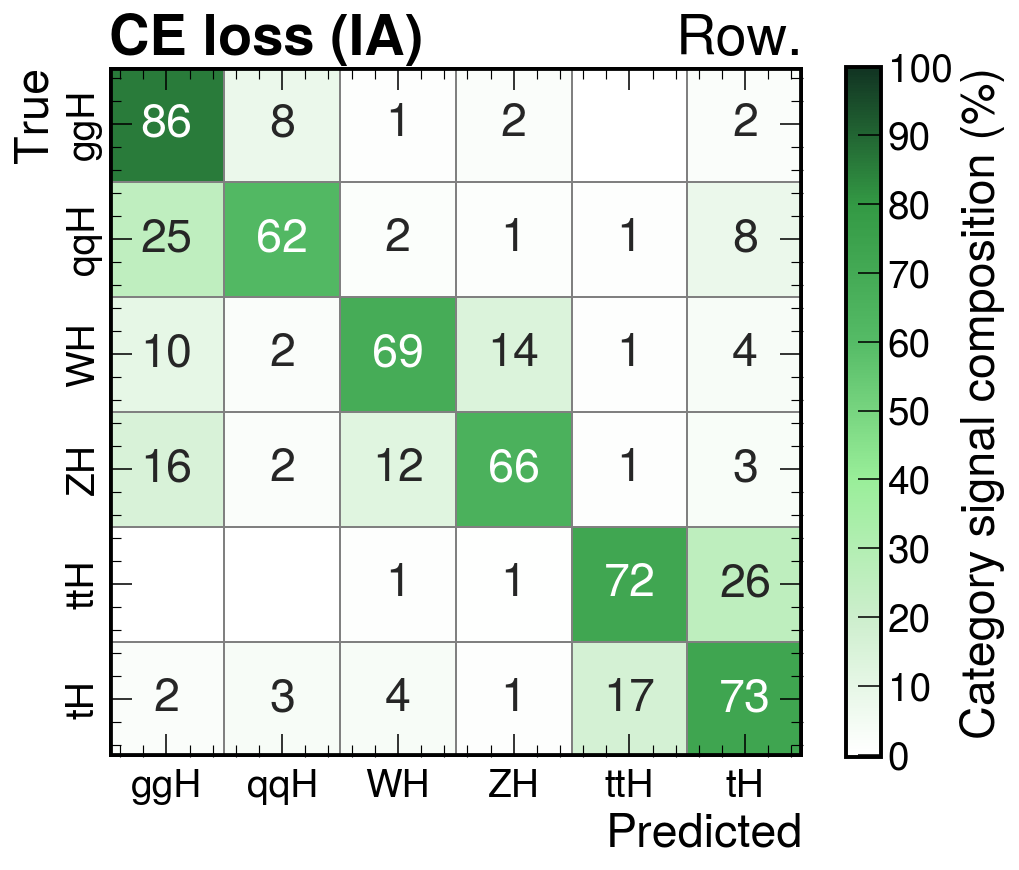

In [208]:
cm_w = pd.DataFrame(cm_ia_ce[1:,1:].detach().numpy())
CM = []
for i in range(6):
    cl = cm_w.iloc[:,i]/cm_w.iloc[:,i].sum()
    CM.append(cl)
cm = pd.DataFrame(CM)

plot_confusion_matrix(cm,title1='CE loss (IA)', title2 = 'Row.',filename='CM_rn_CEIA', cmap='greens')

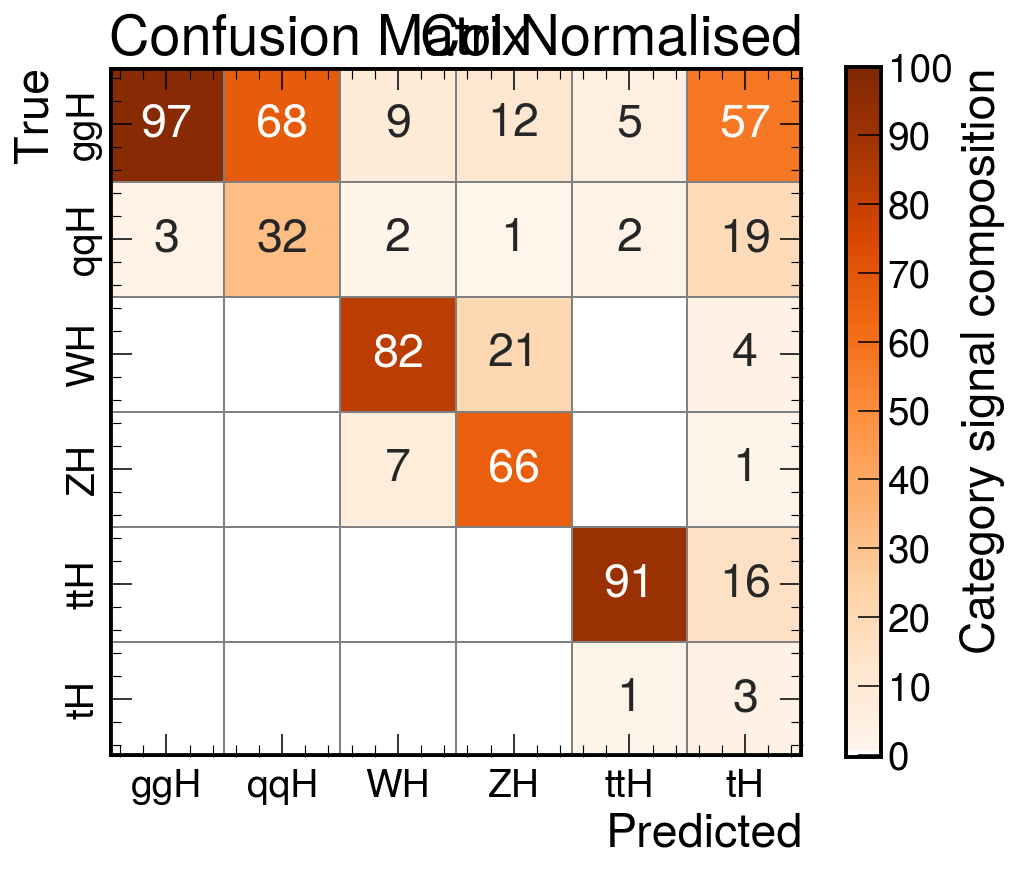

In [ ]:
cm_w = pd.DataFrame(cm_xgb[1:,1:].detach().numpy()).T
CM = []
for i in range(6):
    cl = cm_w.iloc[:,i]/cm_w.iloc[:,i].sum()
    CM.append(cl)
cm = pd.DataFrame(CM).T

plot_confusion_matrix(cm,filename='CM_xgb', cmap='Oranges')

# CR

In [88]:
def nll(theta1,cm):
    O = torch.sum(cm,dim=1)
    theta0 = torch.ones(1)
    theta = torch.cat([theta0,theta1])
    return -(O@(torch.log(cm@theta))-torch.sum((cm@theta)))

In [89]:
def hess_to_tensor(H):
    hess_elements = []
    for i in range(len(H)):
        for j in range(len(H)):
            hess_elements.append(H[i][j].reshape(1))
    return torch.cat(hess_elements).reshape(len(H),len(H))

def Correlation(cm):
    hess = torch.func.hessian(nll,0)(torch.ones(6),cm)
    H = hess_to_tensor(hess)
    I = torch.inverse(H)
    sigma = torch.diag(I)**0.5
    Cor = torch.zeros(6,6)
    for i in range(6):
        for j in range(6):
            Cor[i,j] = I[i,j]/(sigma[i]*sigma[j])
    return Cor

def Correlation_Tr(cm):
    hess = torch.func.hessian(nll,0)(torch.ones(6),cm)
    H = hess_to_tensor(hess)
    I = torch.inverse(H)
    sigma = torch.diag(I)**0.5
    Cor = torch.zeros(6,6)
    for i in range(6):
        for j in range(6):
            if j<=i:
                Cor[i,j] = I[i,j]/(sigma[i]*sigma[j])
        
    return Cor

In [90]:
def plot_correlation_matrix(cm, title='Correlation Matrix', filename='confusion_matrix',barlabel='Category signal composition (%)',**kwargs):
    annot = np.zeros([6,6]).astype(str)
    for i in range(6):
        for j in range (6):
            annot[i,j]= f"{cm[i,j]:.2f}"
    cm = pd.DataFrame(cm.numpy())
    fig, ax = plt.subplots(figsize=(8,6.4))
    plot_params = {k: v for k, v in kwargs.items()}
    mask = abs(cm) < 0.01

    annot = np.where(mask, "", annot)

    for i in range(annot.shape[0]):
        for j in range(annot.shape[1]):
            if annot[i, j] == '1.00':
                annot[i, j] = '1'  # 将 1.0 显示为 1
            elif annot[i, j].startswith('-0'):
                annot[i, j] = '-' + annot[i, j][2:]  # 处理 -0.22 的情况，变成 -.22
            else:
                annot[i, j] = annot[i, j].lstrip('0') 
    cmapp = sns.color_palette('reds', as_cmap=True)
    cmapn = sns.color_palette('blues_r', as_cmap=True)
    cmap_colors =  list(cmapn(np.linspace(0, 1, 200)))+ ['white'] + list(cmapp(np.linspace(0, 1, 200))) 
    custom_cmap = mcolors.ListedColormap(cmap_colors)
    boundaries = list(np.linspace(-1, -0.01, 200)) + [-0.01, 0.01] + list(np.linspace(0.01, 1, 200))
    norm = mcolors.BoundaryNorm(boundaries=boundaries, ncolors=len(boundaries) )

    ax = sns.heatmap(cm, annot=annot,fmt='',norm=norm,linewidths=1,linecolor='grey', cmap=custom_cmap,**plot_params) 
    # ax.set_xlabel('Predicted')
    # ax.set_ylabel('True')
    # ax.set_title(title)
    ax.set_xticklabels(col[1:])
    ax.set_yticklabels(col[1:])
    x0, y0, width, height = ax.get_position().bounds
    rect = plt.Rectangle((x0, y0), width, height, fill=False, edgecolor='black', lw=4, transform=plt.gcf().transFigure, figure=plt.gcf())
    plt.gca().add_patch(rect)
    cbar = ax.collections[0].colorbar
    def percentage(x, pos):
        return np.round(x,1)
    cbar.ax.yaxis.set_major_formatter(FuncFormatter(percentage))
    cbar.ax.yaxis.set_major_locator(MaxNLocator(nbins=11))
    cbar.ax.yaxis.set_minor_locator(plt.NullLocator())
    cbar.set_label(barlabel)
    cbar.outline.set_linewidth(2)
    plt.title(f"Cor.",loc='right')
    plt.title(f"{title}",loc='left',fontweight='bold')
    fig.savefig(f'{folder_name}/{filename}.pdf', bbox_inches='tight')

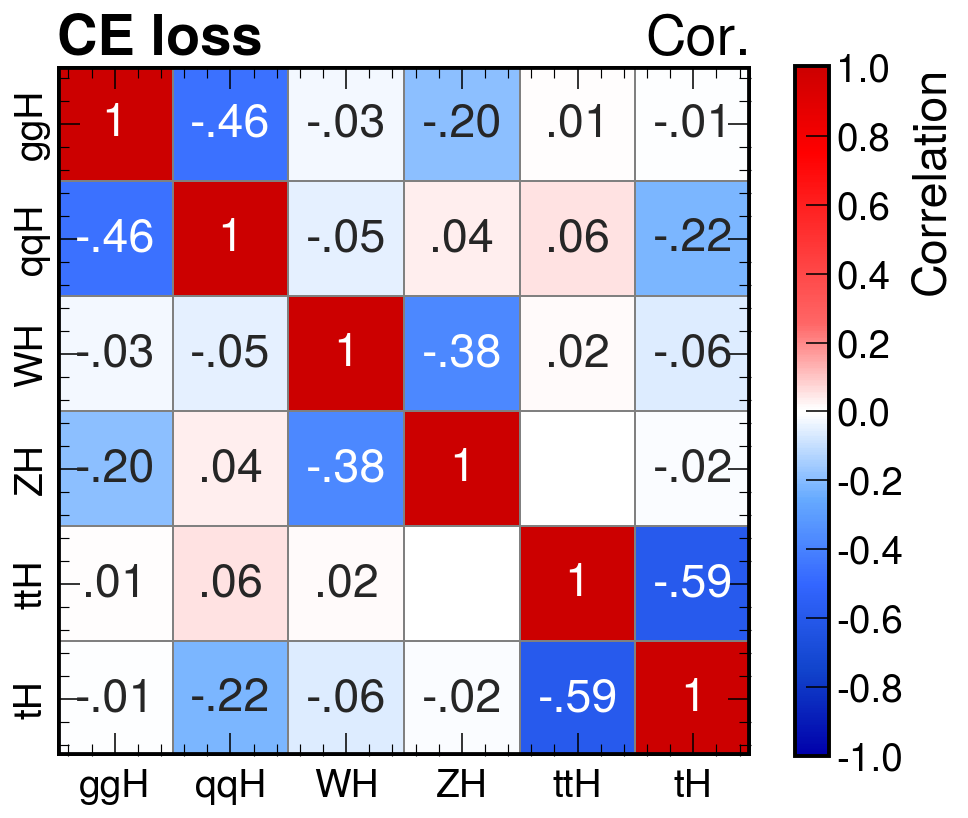

In [97]:
plot_correlation_matrix(Correlation(cm_ce),title='CE loss',
                        filename='Correlation_ce',barlabel='Correlation')

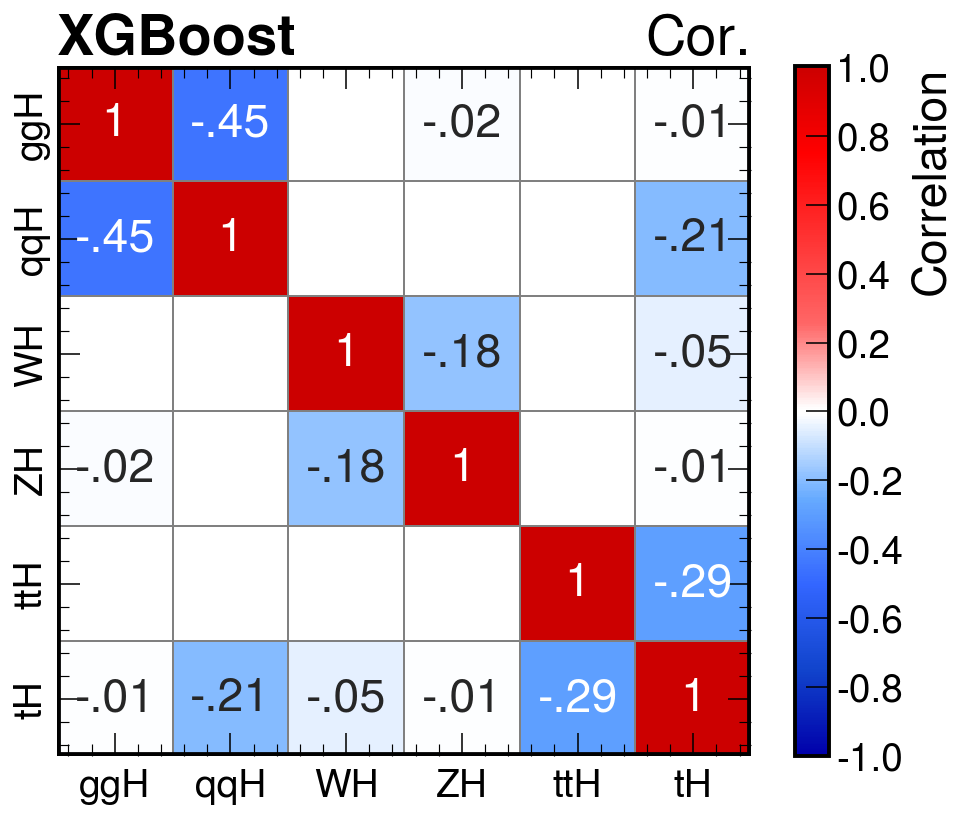

In [98]:
plot_correlation_matrix(Correlation(cm_xgb),title='XGBoost',
                        filename='Correlation_xgb',barlabel='Correlation')

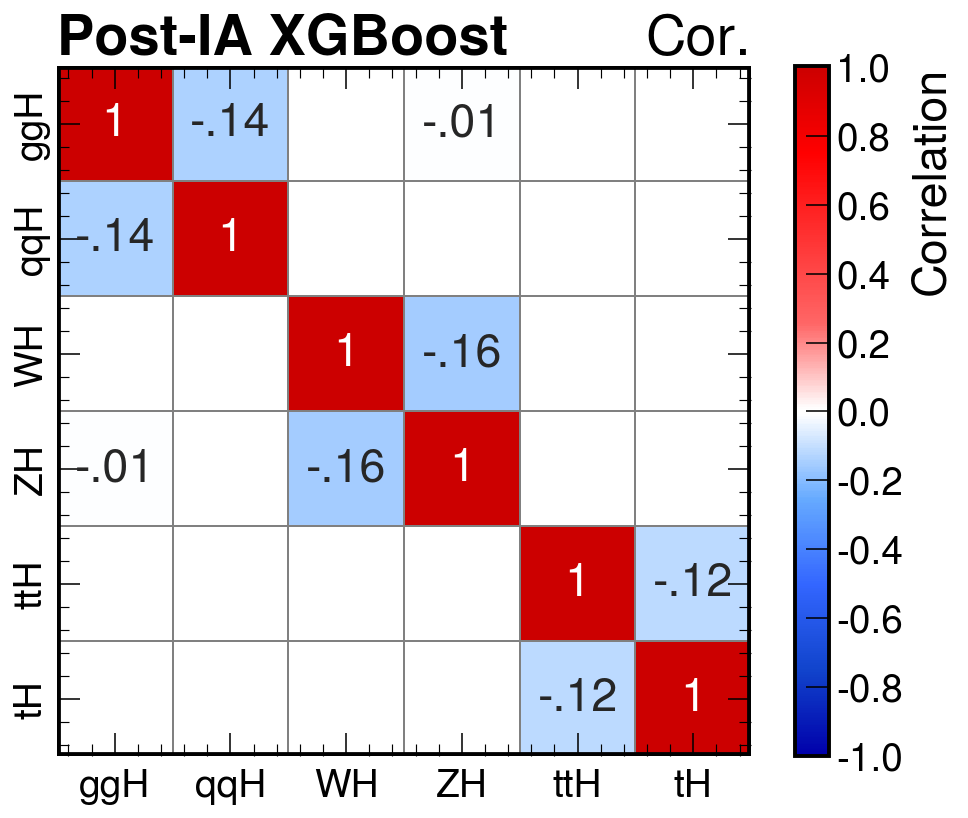

In [94]:
plot_correlation_matrix(Correlation(cm_ia_xgb),title='Post-IA XGBoost',
                        filename='Correlation_xgb_ia',barlabel='Correlation')

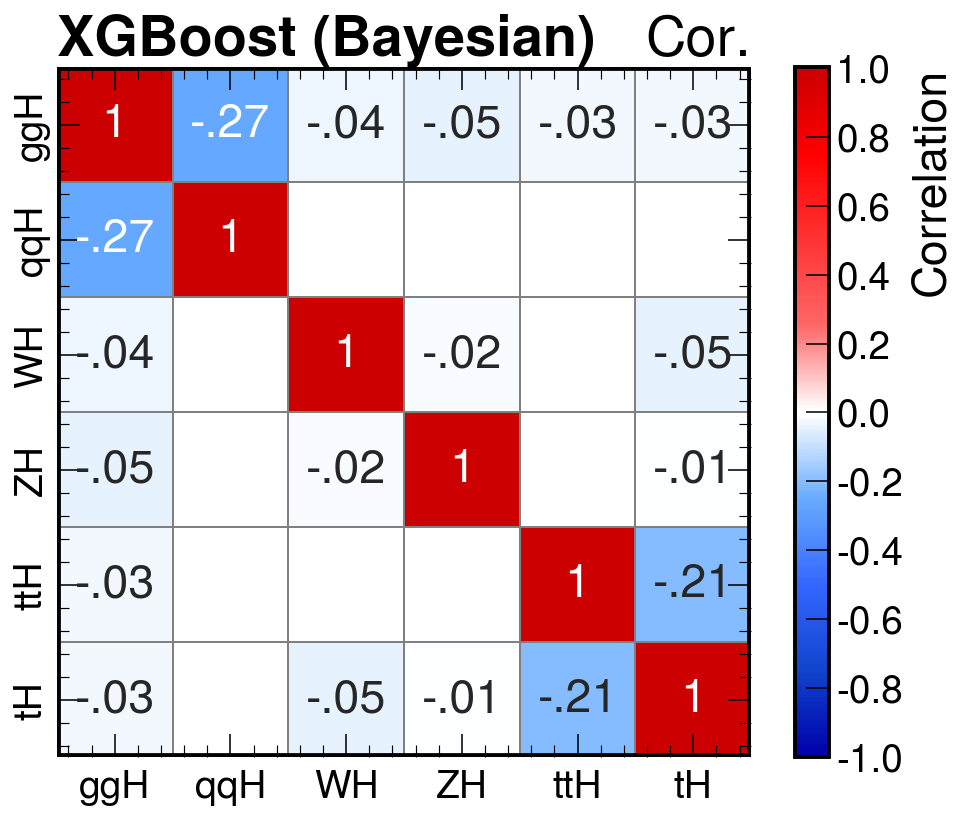

In [57]:
plot_correlation_matrix(Correlation(cm_xgb_new),title='XGBoost (Bayesian)',
                        filename='Correlation_xgb_B',barlabel='Correlation')

# Hist

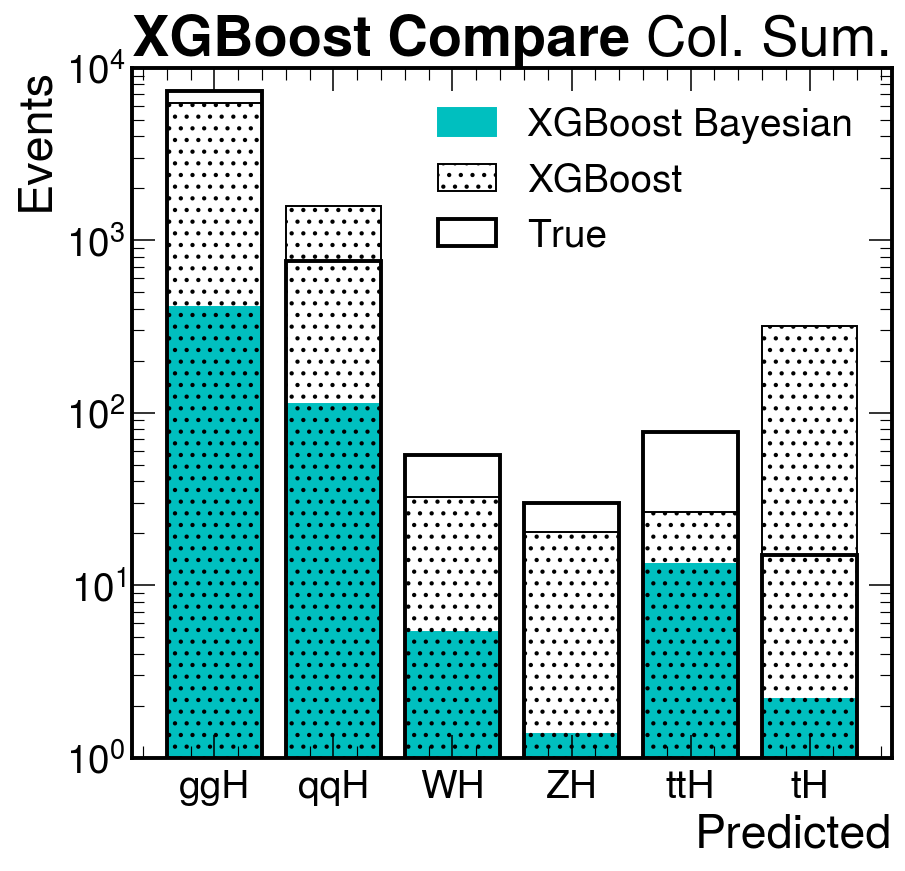

In [42]:
dims = 1
xgb_ia_Bin= confusion_matrix((OC_ia_xgb),label,weight)[1:,1:].sum(dim=dims)
xgb_bay_Bin= confusion_matrix((OC_xgb_new),label,weight)[1:,1:].sum(dim=dims)
xgb_Bin =confusion_matrix((OC_xgb),label,weight)[1:,1:].sum(dim=dims)
True_Bin =confusion_matrix((label),label,weight)[1:,1:].sum(dim=dims)

fig, ax = plt.subplots(figsize=(7,6.4))
# plt.bar(col[1:],xgb_ia_Bin,edgecolor='orange', facecolor='orange',label = 'Post-IA XGBoost')
plt.bar(col[1:],xgb_bay_Bin,edgecolor=edgecolors[1],label = 'XGBoost Bayesian',facecolor=colors[1])
plt.bar(col[1:],xgb_Bin,edgecolor='black', facecolor='none',hatch = '..',linewidth=1,label ='XGBoost')
plt.bar(col[1:],True_Bin,edgecolor='black', facecolor='none',linewidth=2,label ='True')
plt.ylabel('Events')
plt.ylim(1,1e4)
plt.legend()
plt.xlabel('Predicted')
plt.yscale('log')
plt.title('XGBoost Compare',loc='left',fontweight='bold')
plt.title('Col. Sum.',loc='right')
fig.savefig(f'{folder_name}/Bar_xgb_new_C.pdf')

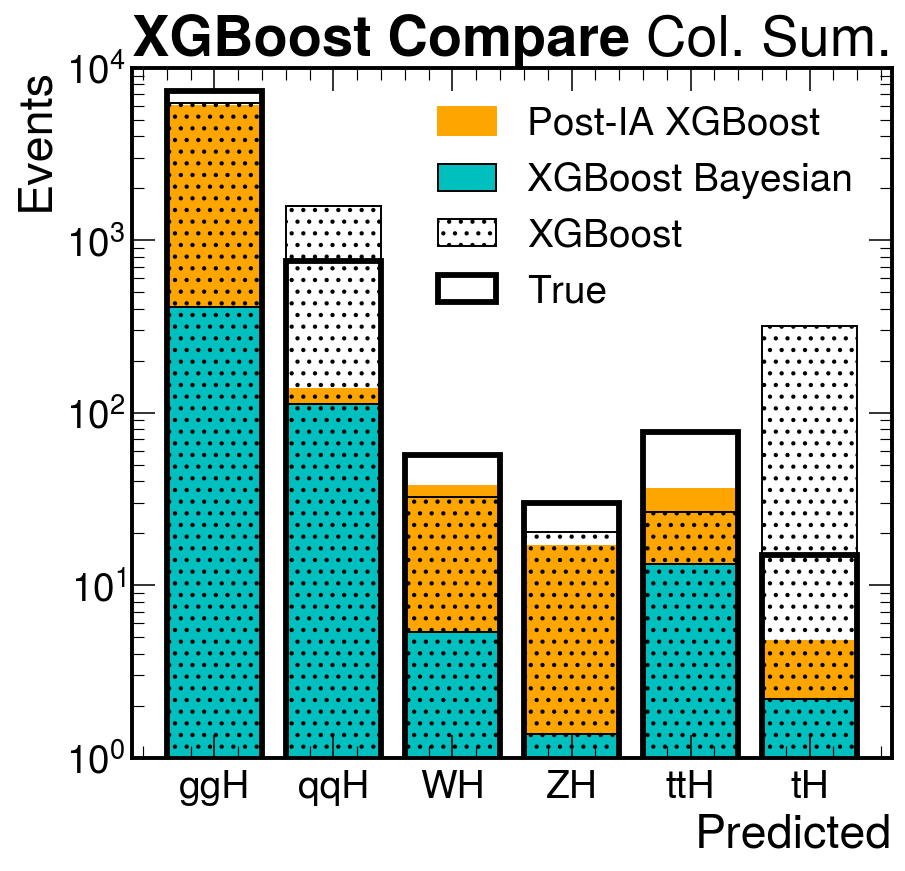

In [68]:
dims = 1
xgb_ia_Bin= confusion_matrix((OC_ia_xgb),label,weight)[1:,1:].sum(dim=dims)
xgb_bay_Bin= confusion_matrix((OC_xgb_new),label,weight)[1:,1:].sum(dim=dims)
xgb_Bin =confusion_matrix((OC_xgb),label,weight)[1:,1:].sum(dim=dims)
True_Bin =confusion_matrix((label),label,weight)[1:,1:].sum(dim=dims)

fig, ax = plt.subplots(figsize=(7,6.4))
plt.bar(col[1:],xgb_ia_Bin,edgecolor='orange', facecolor='orange',label = 'Post-IA XGBoost')
plt.bar(col[1:],xgb_bay_Bin,edgecolor=edgecolors[0],label = 'XGBoost Bayesian',facecolor=colors[1])
plt.bar(col[1:],xgb_Bin,edgecolor='black', facecolor='none',hatch='..',linewidth=1,label ='XGBoost')
plt.bar(col[1:],True_Bin,edgecolor='black', facecolor='none',linewidth=3,label ='True')
plt.ylabel('Events')
plt.legend()
plt.ylim(1,1e4)
plt.xlabel('Predicted')
plt.yscale('log')
plt.title('XGBoost Compare',loc='left',fontweight='bold')
plt.title('Col. Sum.',loc='right')
fig.savefig(f'{folder_name}/Bar_xgb_CP.pdf')

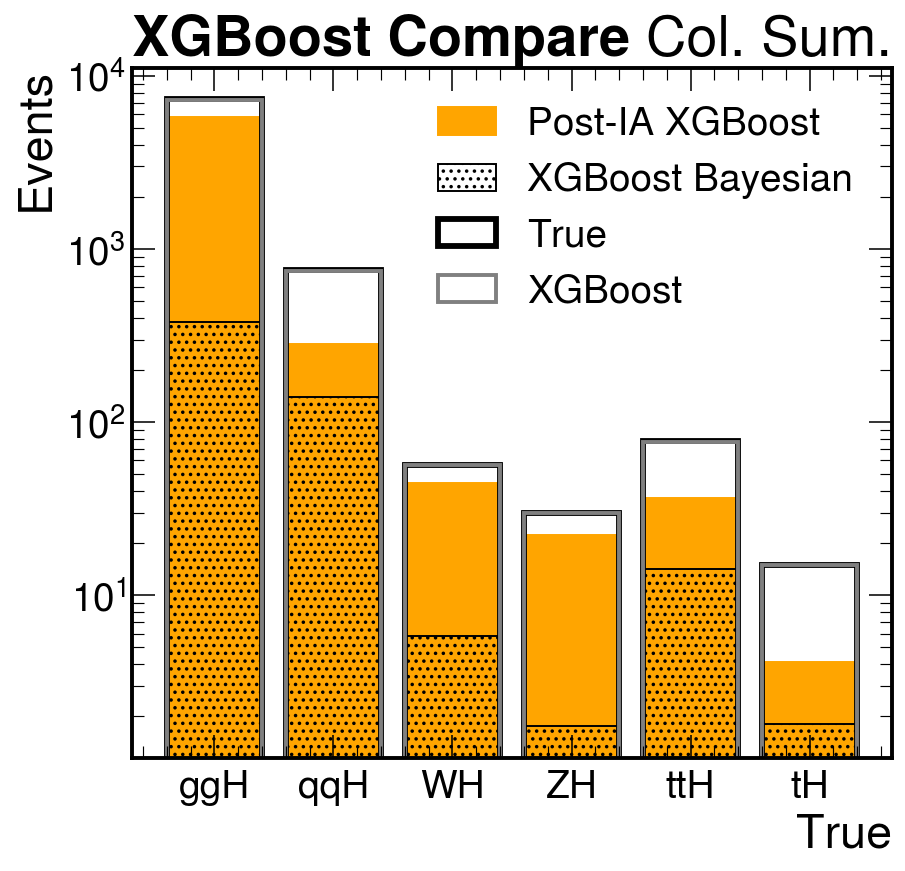

In [67]:
dims = 0
xgb_ia_Bin= confusion_matrix((OC_ia_xgb),label,weight)[1:,1:].sum(dim=dims)
xgb_bay_Bin= confusion_matrix((OC_xgb_new),label,weight)[1:,1:].sum(dim=dims)
xgb_Bin =confusion_matrix((OC_xgb),label,weight)[1:,1:].sum(dim=dims)
True_Bin =confusion_matrix((label),label,weight)[1:,1:].sum(dim=dims)

fig, ax = plt.subplots(figsize=(7,6.4))
plt.bar(col[1:],xgb_ia_Bin,edgecolor='orange', facecolor='orange',label = 'Post-IA XGBoost')
plt.bar(col[1:],xgb_bay_Bin,edgecolor=edgecolors[0],label = 'XGBoost Bayesian', hatch='...',facecolor='none')
plt.bar(col[1:],True_Bin,edgecolor='black', facecolor='none',linewidth=3,label ='True')
plt.bar(col[1:],xgb_Bin,edgecolor='grey', facecolor='none',linewidth=2,label ='XGBoost')

plt.ylabel('Events')
plt.legend()
plt.xlabel('True')
plt.yscale('log')
plt.title('XGBoost Compare',loc='left',fontweight='bold')
plt.title('Col. Sum.',loc='right')
fig.savefig(f'{folder_name}/Bar_xgb_R.pdf')

# Likelihoods

In [22]:
def nll_prof(theta1,cm,i,val):
    O = torch.sum(cm,dim=1)
    val =torch.tensor(val,dtype=theta1.dtype)
    theta0 = torch.ones(1)
    theta = torch.cat([theta0,theta1])
    theta[i+1] = val
    return -(O@(torch.log(cm@theta))-torch.sum((cm@theta)))

def LL_prof(cm,i,a,b,n,steps=500,lr = 0.001):
    xspace=np.linspace(a,b,n)
    likelihood_prf = torch.zeros(len(xspace),dtype=torch.float64)
    Theta = torch.zeros(6,n)
    for j,val in enumerate(xspace):
        theta = torch.ones(6,requires_grad=True)
        # theta[i]=val
        optimizer = torch.optim.Adam([theta], lr=lr)
        for step in range(steps):
            optimizer.zero_grad()
            loss = nll_prof(theta,cm,i,val)
            loss.backward()
            optimizer.step()
        likelihood_prf[j] = loss.item()
        Theta[:,j] = theta
    lkpf = likelihood_prf.detach().numpy()
    return lkpf,Theta.detach().numpy()

In [23]:
# ratio = [0.32,1,1.5,4,1.5,20]
ratio = [0.4,2.5,2.5,3.5,3,40]
# ratio = [0.4,2,12,25,5,50]
def Likelihoods(cm,ratio,title='xgb',num=100,xlim=-10,limx = [0,1,2,3,4,5,6],steps=140,lr=0.03,plim=[-3,3]):
    fs = (20,20)
    f = plt.figure(figsize=fs)
    gs0 = gridspec.GridSpec(2,3,figure=f)
    handles=[]
    labels=[]
    for i in range(6):
        xlimt = 0
        if i in limx:
            xlimt=xlim
        print(f'Begin to Plot {col[i+1]}')
        theta = torch.ones(6)
        thetam =  np.linspace(max(-1,-ratio[i]*0.5),ratio[i]*.5,num)
        thetas =  np.linspace(max(xlimt-1,-ratio[i]*0.5),ratio[i]*.5,num)
        theta_val = np.copy(theta[0])
        likelihood_ia = torch.tensor([])
        # likelihood_ce = torch.tensor([])
        for j in thetam:
            theta[i] = theta_val+j
            nlls = nll(theta,cm).view(-1)
            nlls_ce = nll(theta,cm).view(-1)
            likelihood_ia = torch.cat([likelihood_ia,nlls])
            # likelihood_ce = torch.cat([likelihood_ce,nlls_ce])
        lkpf_ia,Theta_ia = LL_prof(cm,i,max(xlimt,1-ratio[i]*0.5),1+ratio[i]*.5,num,steps=steps,lr=lr)
        # lkpf_ce,Theta_ce = LL_prof(cm_xgb,i,max(0,1-ratio[i]*0.5),1+ratio[i]*.5,num,steps=100,lr=0.003)
        
        gs00 = gridspec.GridSpecFromSubplotSpec(4,1,subplot_spec=gs0[i])
        ax1 = f.add_subplot(gs00[:-1,:])
        ax1.plot(thetam+1,likelihood_ia-likelihood_ia.min(), color='black',linestyle='--', alpha=0.7,label = f'Scan')
        # ax1.plot(thetas+1,likelihood_ce-likelihood_ce.min(), color='blue',linestyle='--',alpha=0.7,label = 'XGB scan')
        ax1.plot(thetas+1,lkpf_ia-lkpf_ia.min(),color = 'black',label = f'Profiled')
        # ax1.plot(thetas+1,lkpf_ce-lkpf_ce.min(),color = 'blue',label = 'XGB profiled')
        xmax = thetas[(lkpf_ia-lkpf_ia.min())<1].max()+1
        xmin = thetas[(lkpf_ia-lkpf_ia.min())<1].min()+1
        ax1.axvspan(xmin, xmax, color='black', alpha=0.1, label=f'$<1\sigma$')
        ax1.text((xmin + xmax) / 2, 8.5, fr'$\mu_{{{i+1}}}=1^{{+{xmax-1:.2f}}}_{{{xmin-1:.2f}}}$', 
         horizontalalignment='center', verticalalignment='center', fontsize=24, color='black')
        ax1.set_ylim(0,8)
        ax1.axhline(y=1,color='black',linestyle=':')
        ax1.axhline(y=4,color='black',linestyle='--')
        ax1.axvline(x=1,color='grey',linestyle=':')
        ax2 = f.add_subplot(gs00[-1,:],sharex=ax1)
        for k in range(6):
            if k != i:
                ax2.plot(thetas+1,Theta_ia[k,:],c=edgecolors[k+1],label=f'{col[k+1]}')
        # ymax = np.max(np.abs(Theta_ia-1))
        ax2.set_ylim(1+plim[0],1+plim[1])
        ax2.xaxis.set_major_locator(MaxNLocator(8))  
        ax2.set_yticks(np.linspace(1+plim[0],1+plim[1],5))
        # ax2.set_yticklabels(np.round(np.linspace(0.75,1.25,5,2)))
        ax2.grid(linestyle = '--')
        ax2.axvline(x=1,color='grey',linestyle=':')
        ax2.set_ylabel(r'$\mu_{j}$')
        ax1.set_title(f'{col[i+1]}',loc='left',fontweight='bold')
        ax2.set_xlabel(f'$\mu_{i+1}$')
        ax1.set_ylabel('2$\Delta$NLL')
        ax2.axvspan(xmin, xmax, color='black', alpha=0.1, label=f'$<1\sigma$')
        # ax1.legend()
        handles1, labels1 = ax1.get_legend_handles_labels()  # 获取ax1的legend
        handles2, labels2 = ax2.get_legend_handles_labels()  # 获取ax2的legend
        handles.append(handles2)
        labels.append(labels2)


        plt.setp(ax1.get_xticklabels(), visible=False)
        print(Theta_ia.max()) 
    f.legend(handles1, labels1, loc='upper right', bbox_to_anchor=(1.015, 0.87), 
            fancybox=True,edgecolor='black',framealpha=True,borderaxespad=0.)
    f.legend([handles[2][0]]+handles[0], [labels[2][0]]+labels[0], loc='upper right', bbox_to_anchor=(1.0, 0.23), 
            fancybox=True,edgecolor='black',framealpha=True,borderaxespad=0.)
    f.savefig(f'{folder_name}/LH_{title}.pdf',bbox_inches='tight')

Begin to Plot ggH


3.3795316178191612
Begin to Plot qqH
4.427248191185432
Begin to Plot WH
4.354237786019167
Begin to Plot ZH
3.6000879372089973
Begin to Plot ttH
4.968052275403129
Begin to Plot tH
2.020244934569917


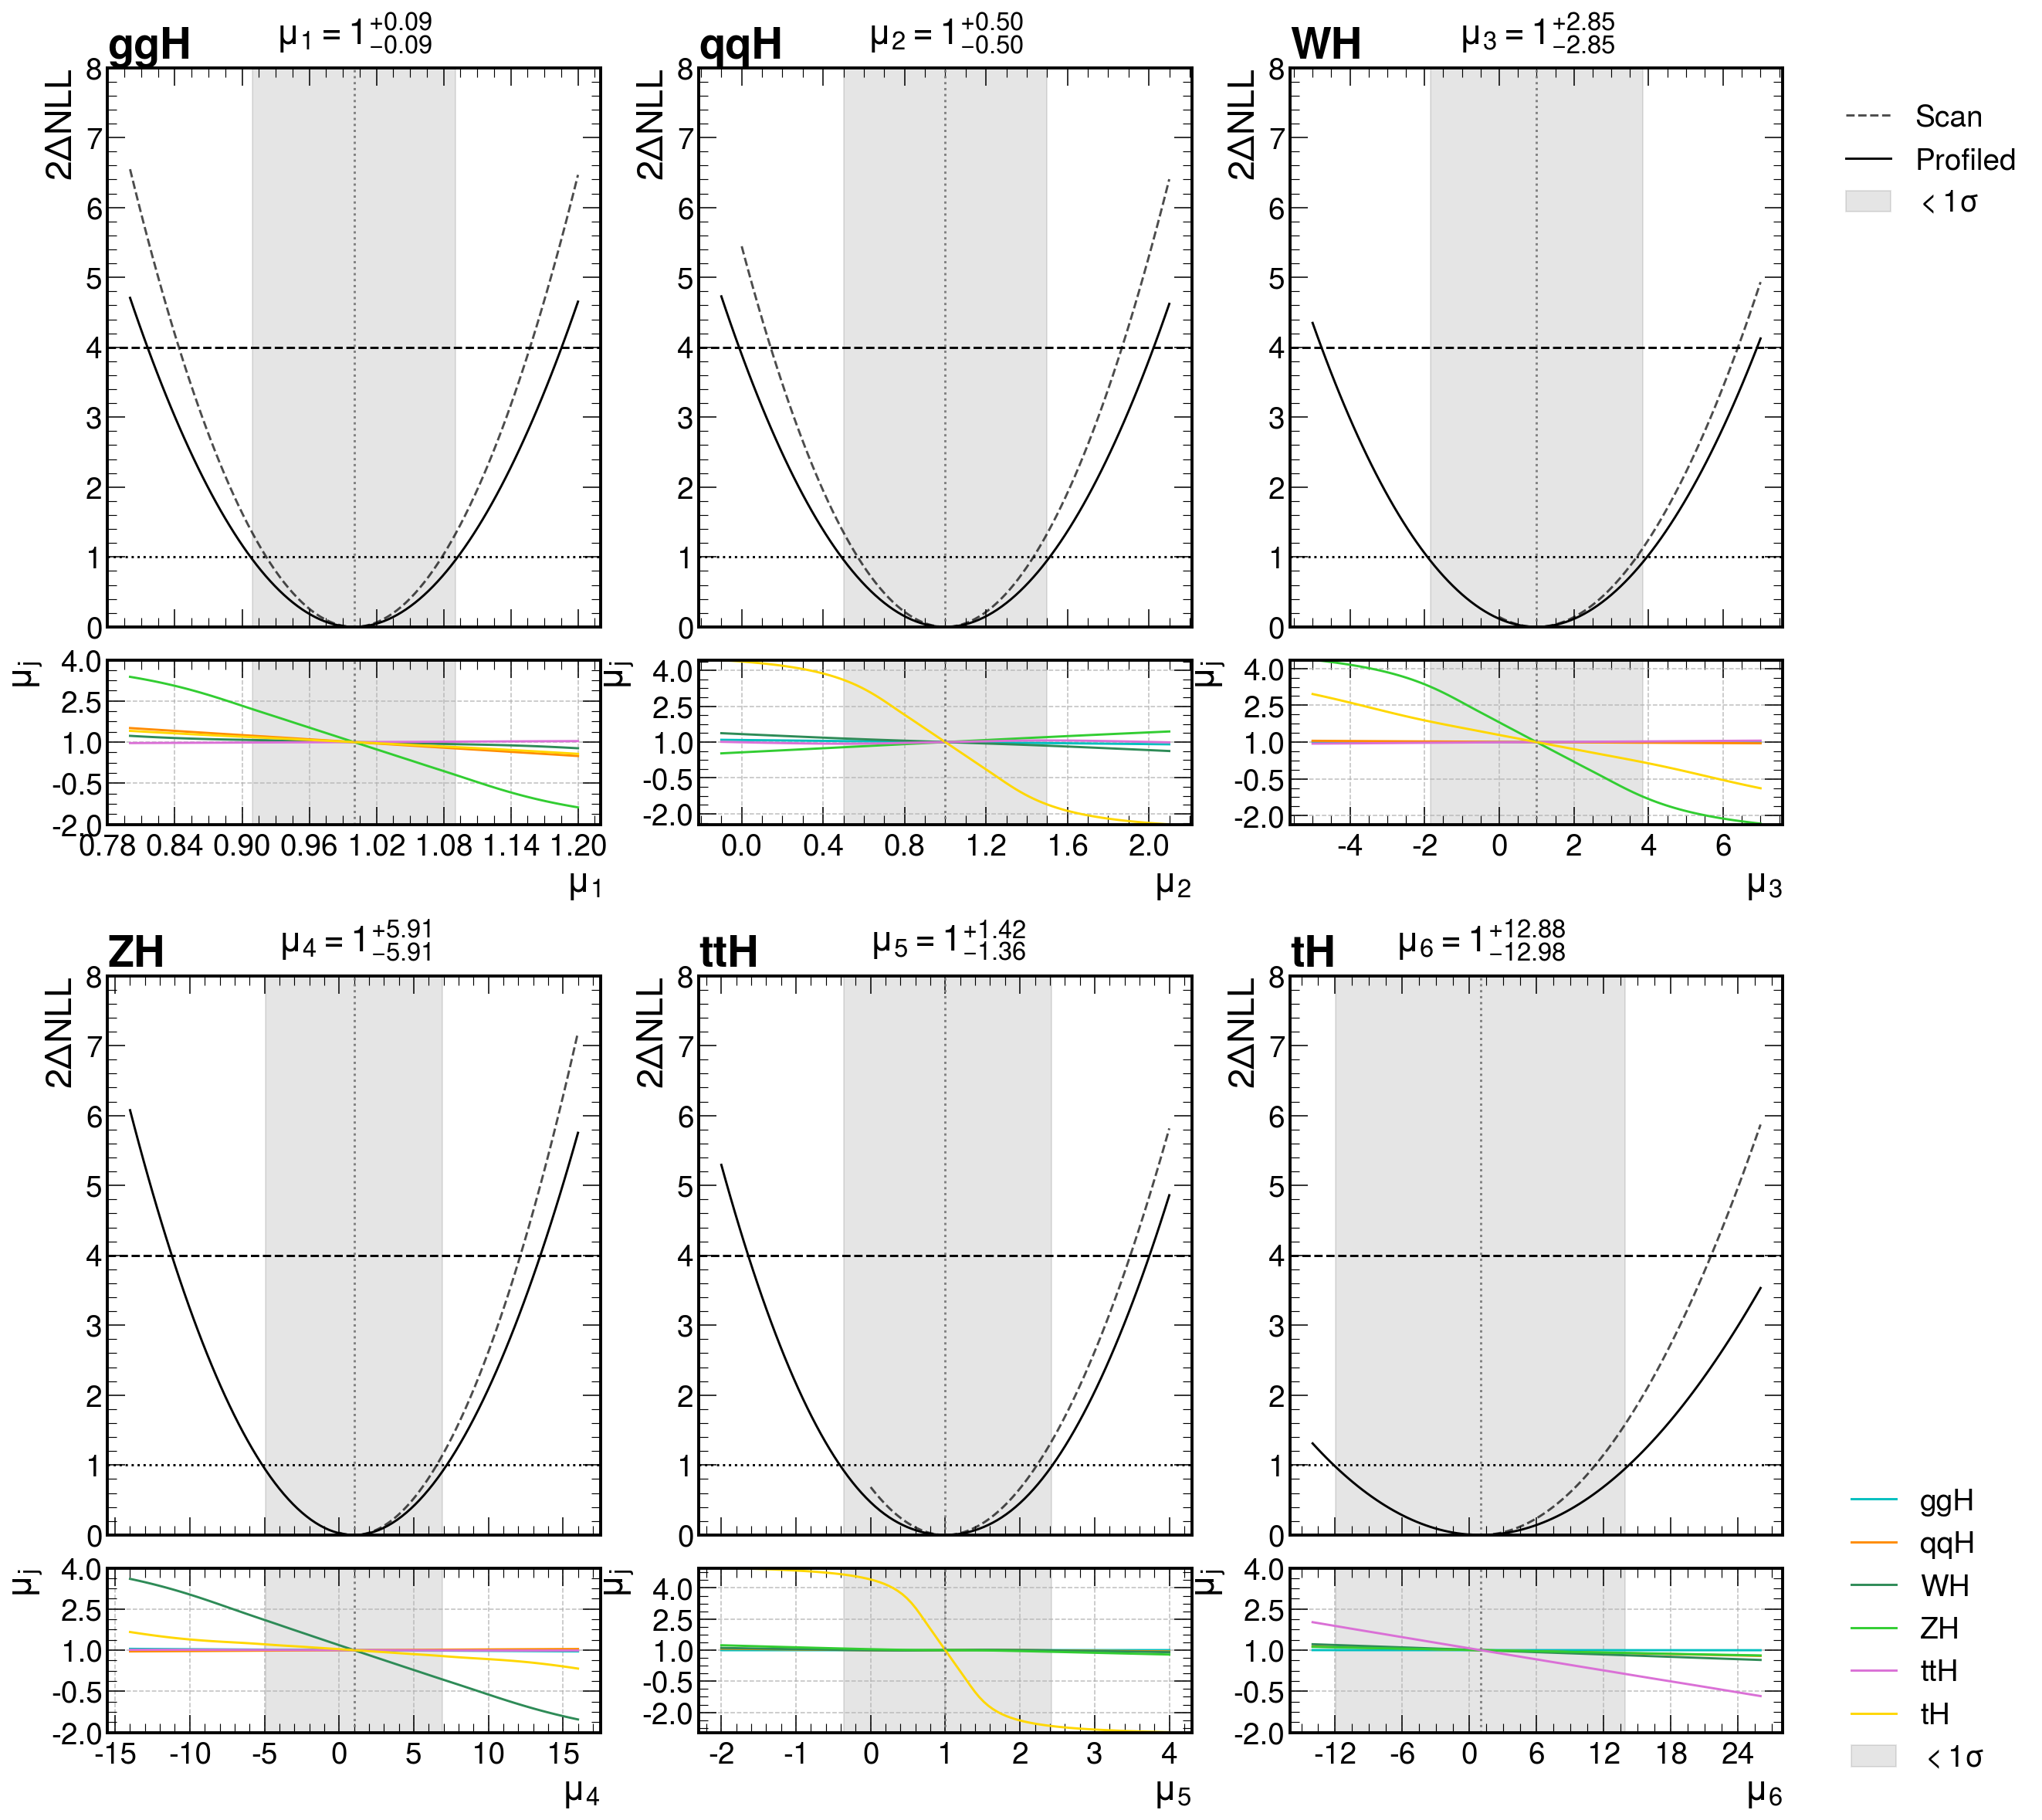

In [238]:
Likelihoods(cm_ce,ratio = [0.4,2.2,12,30,6,50],title='ce',num=100,xlim=-14)

Begin to Plot ggH
1.5159721098981904
Begin to Plot qqH
4.4563393200216845
Begin to Plot WH
2.6950529714315836
Begin to Plot ZH
2.8961711302445705
Begin to Plot ttH
4.735780157145489
Begin to Plot tH
1.18511969047012


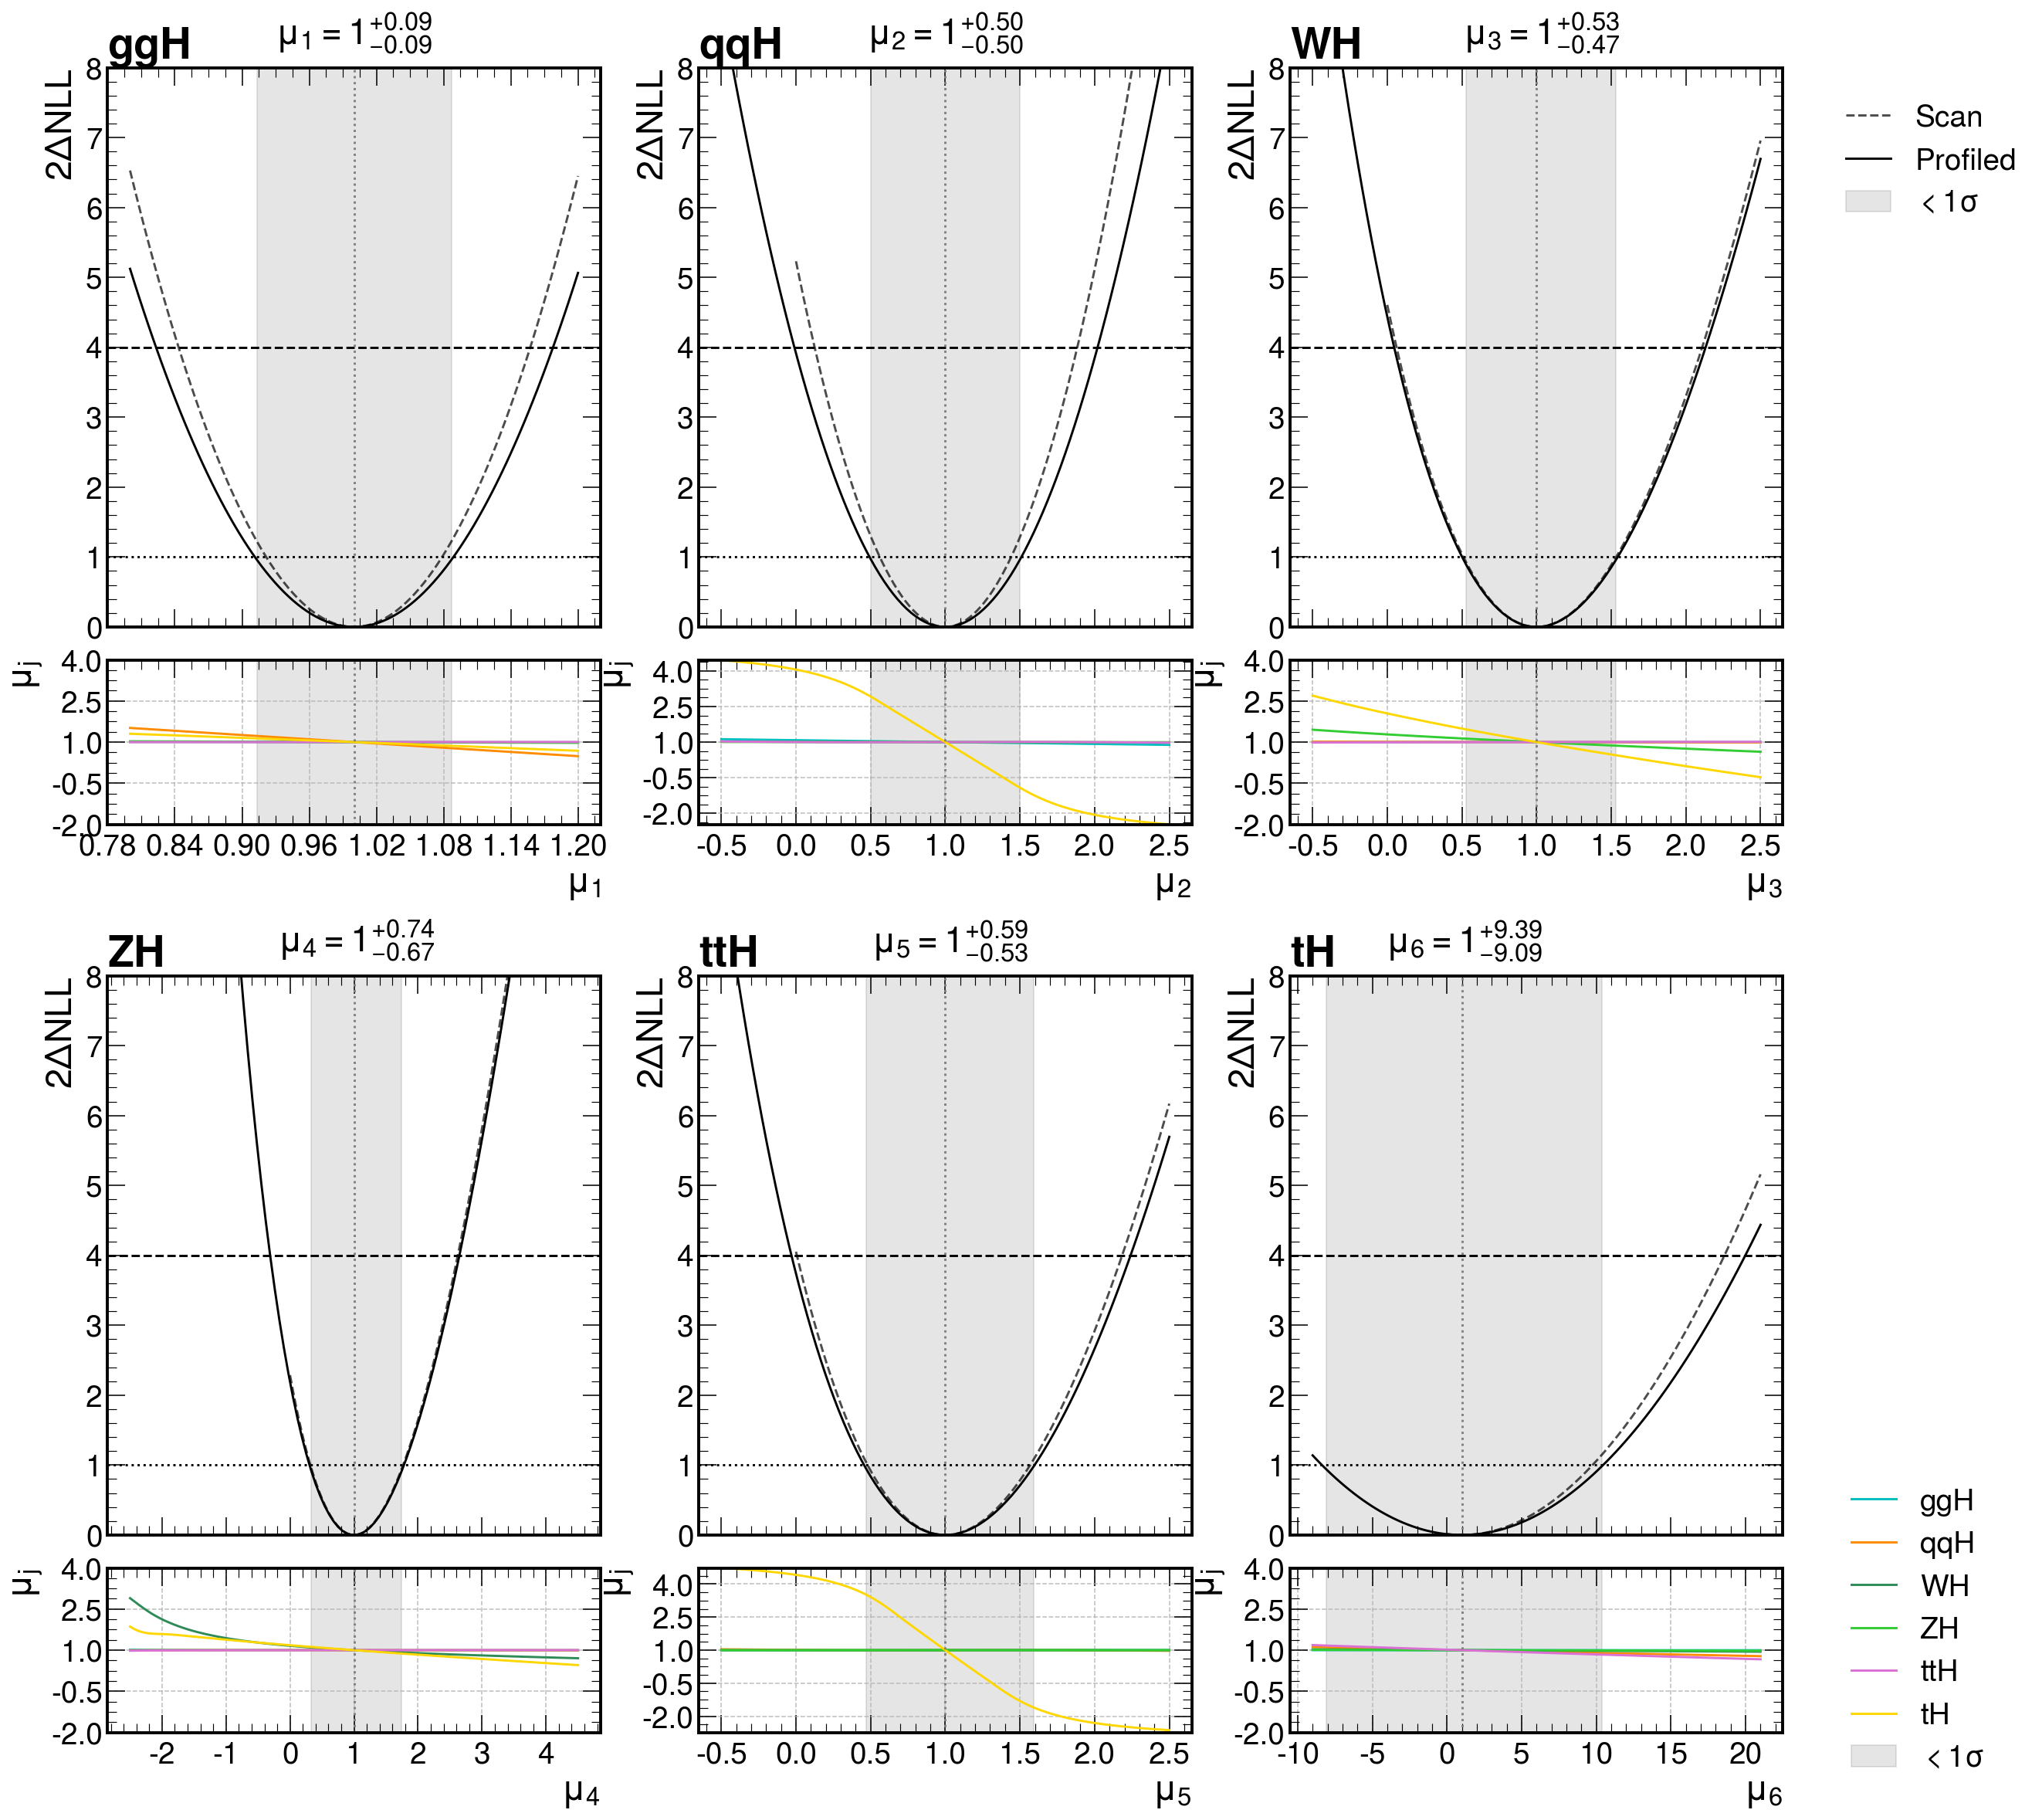

In [239]:
Likelihoods(cm_xgb,ratio = [0.4,3,3,7,3,40],title='xgb',num=100,xlim=-9)

Begin to Plot ggH
1.1467158905758725
Begin to Plot qqH
1.0644249506821892
Begin to Plot WH
4.015502282997616
Begin to Plot ZH
1.2585388582807542
Begin to Plot ttH
8.687290462982011
Begin to Plot tH
1.406477785338944


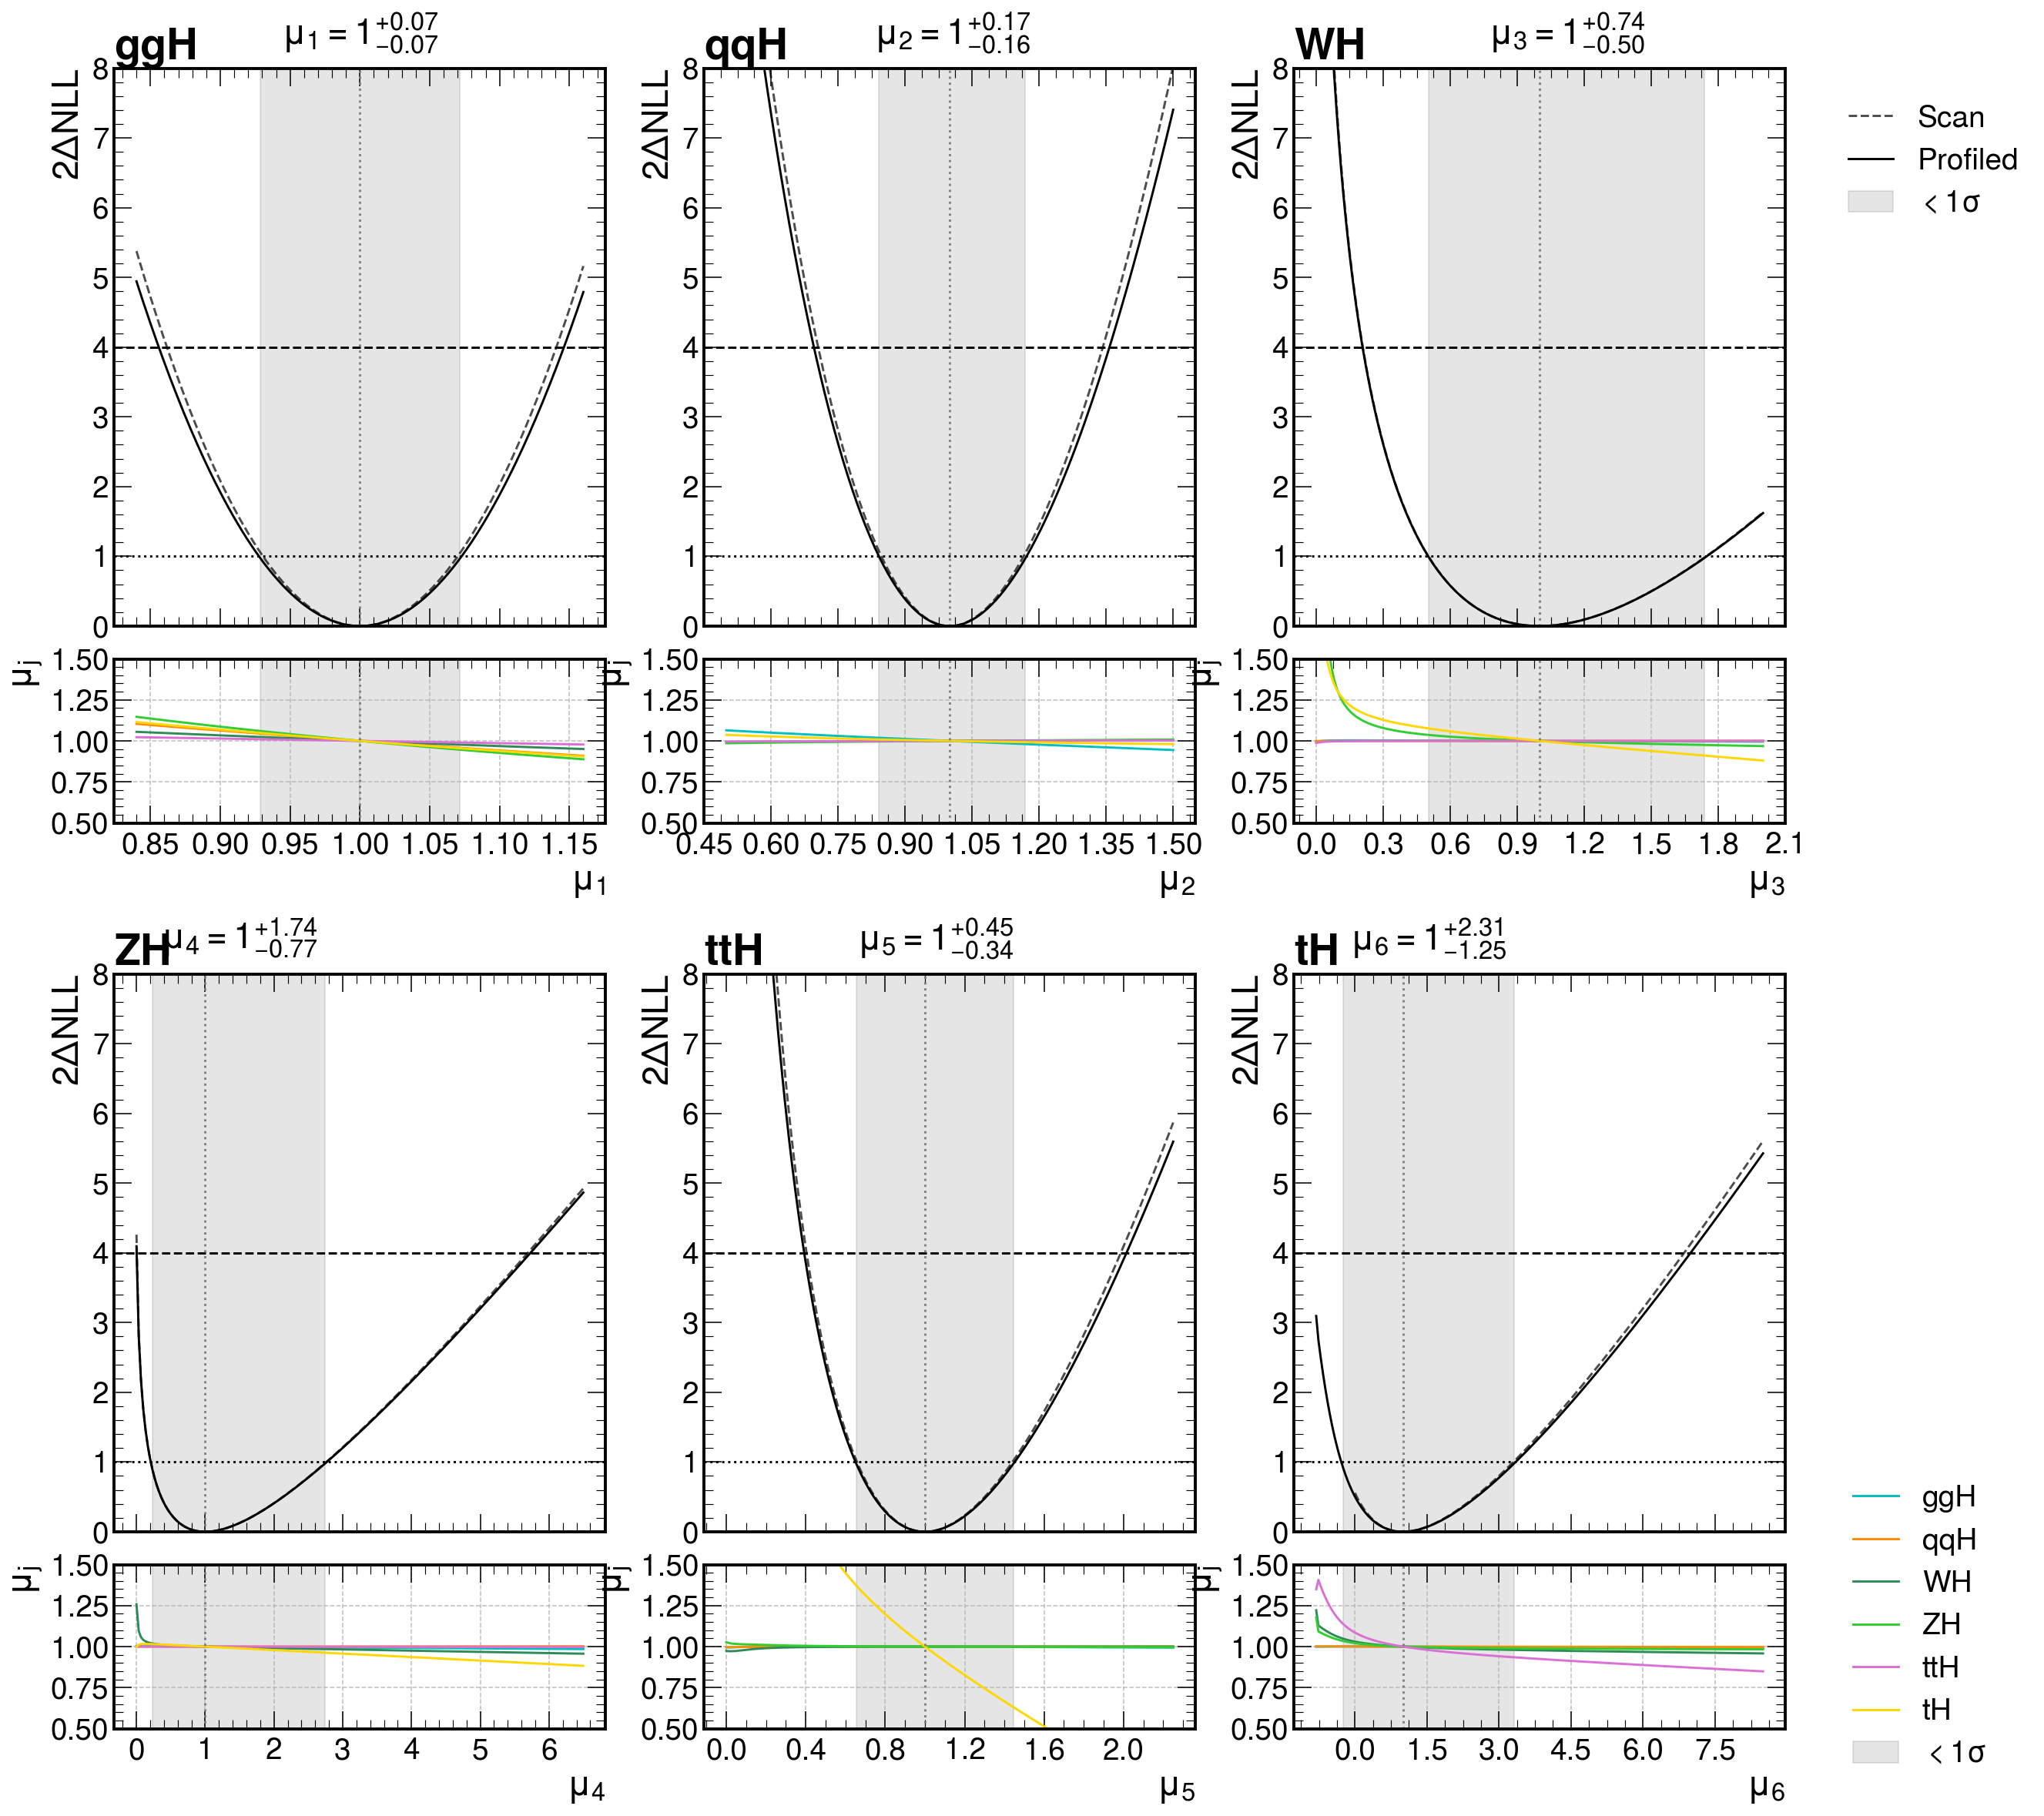

In [51]:
Likelihoods(cm_xgb_new,ratio = [0.32,1,2,11,2.5,15],title='xgb_new',num=200,xlim=-0.8072,limx=[5],steps=500,lr=0.04,plim=[-.5,.5])

Begin to Plot ggH
1.055586706989541
Begin to Plot qqH
1.0326246712659517
Begin to Plot WH
1.3351938965877659
Begin to Plot ZH
1.2206116974942485
Begin to Plot ttH
1.5174862958859399
Begin to Plot tH
1.3141470015371974


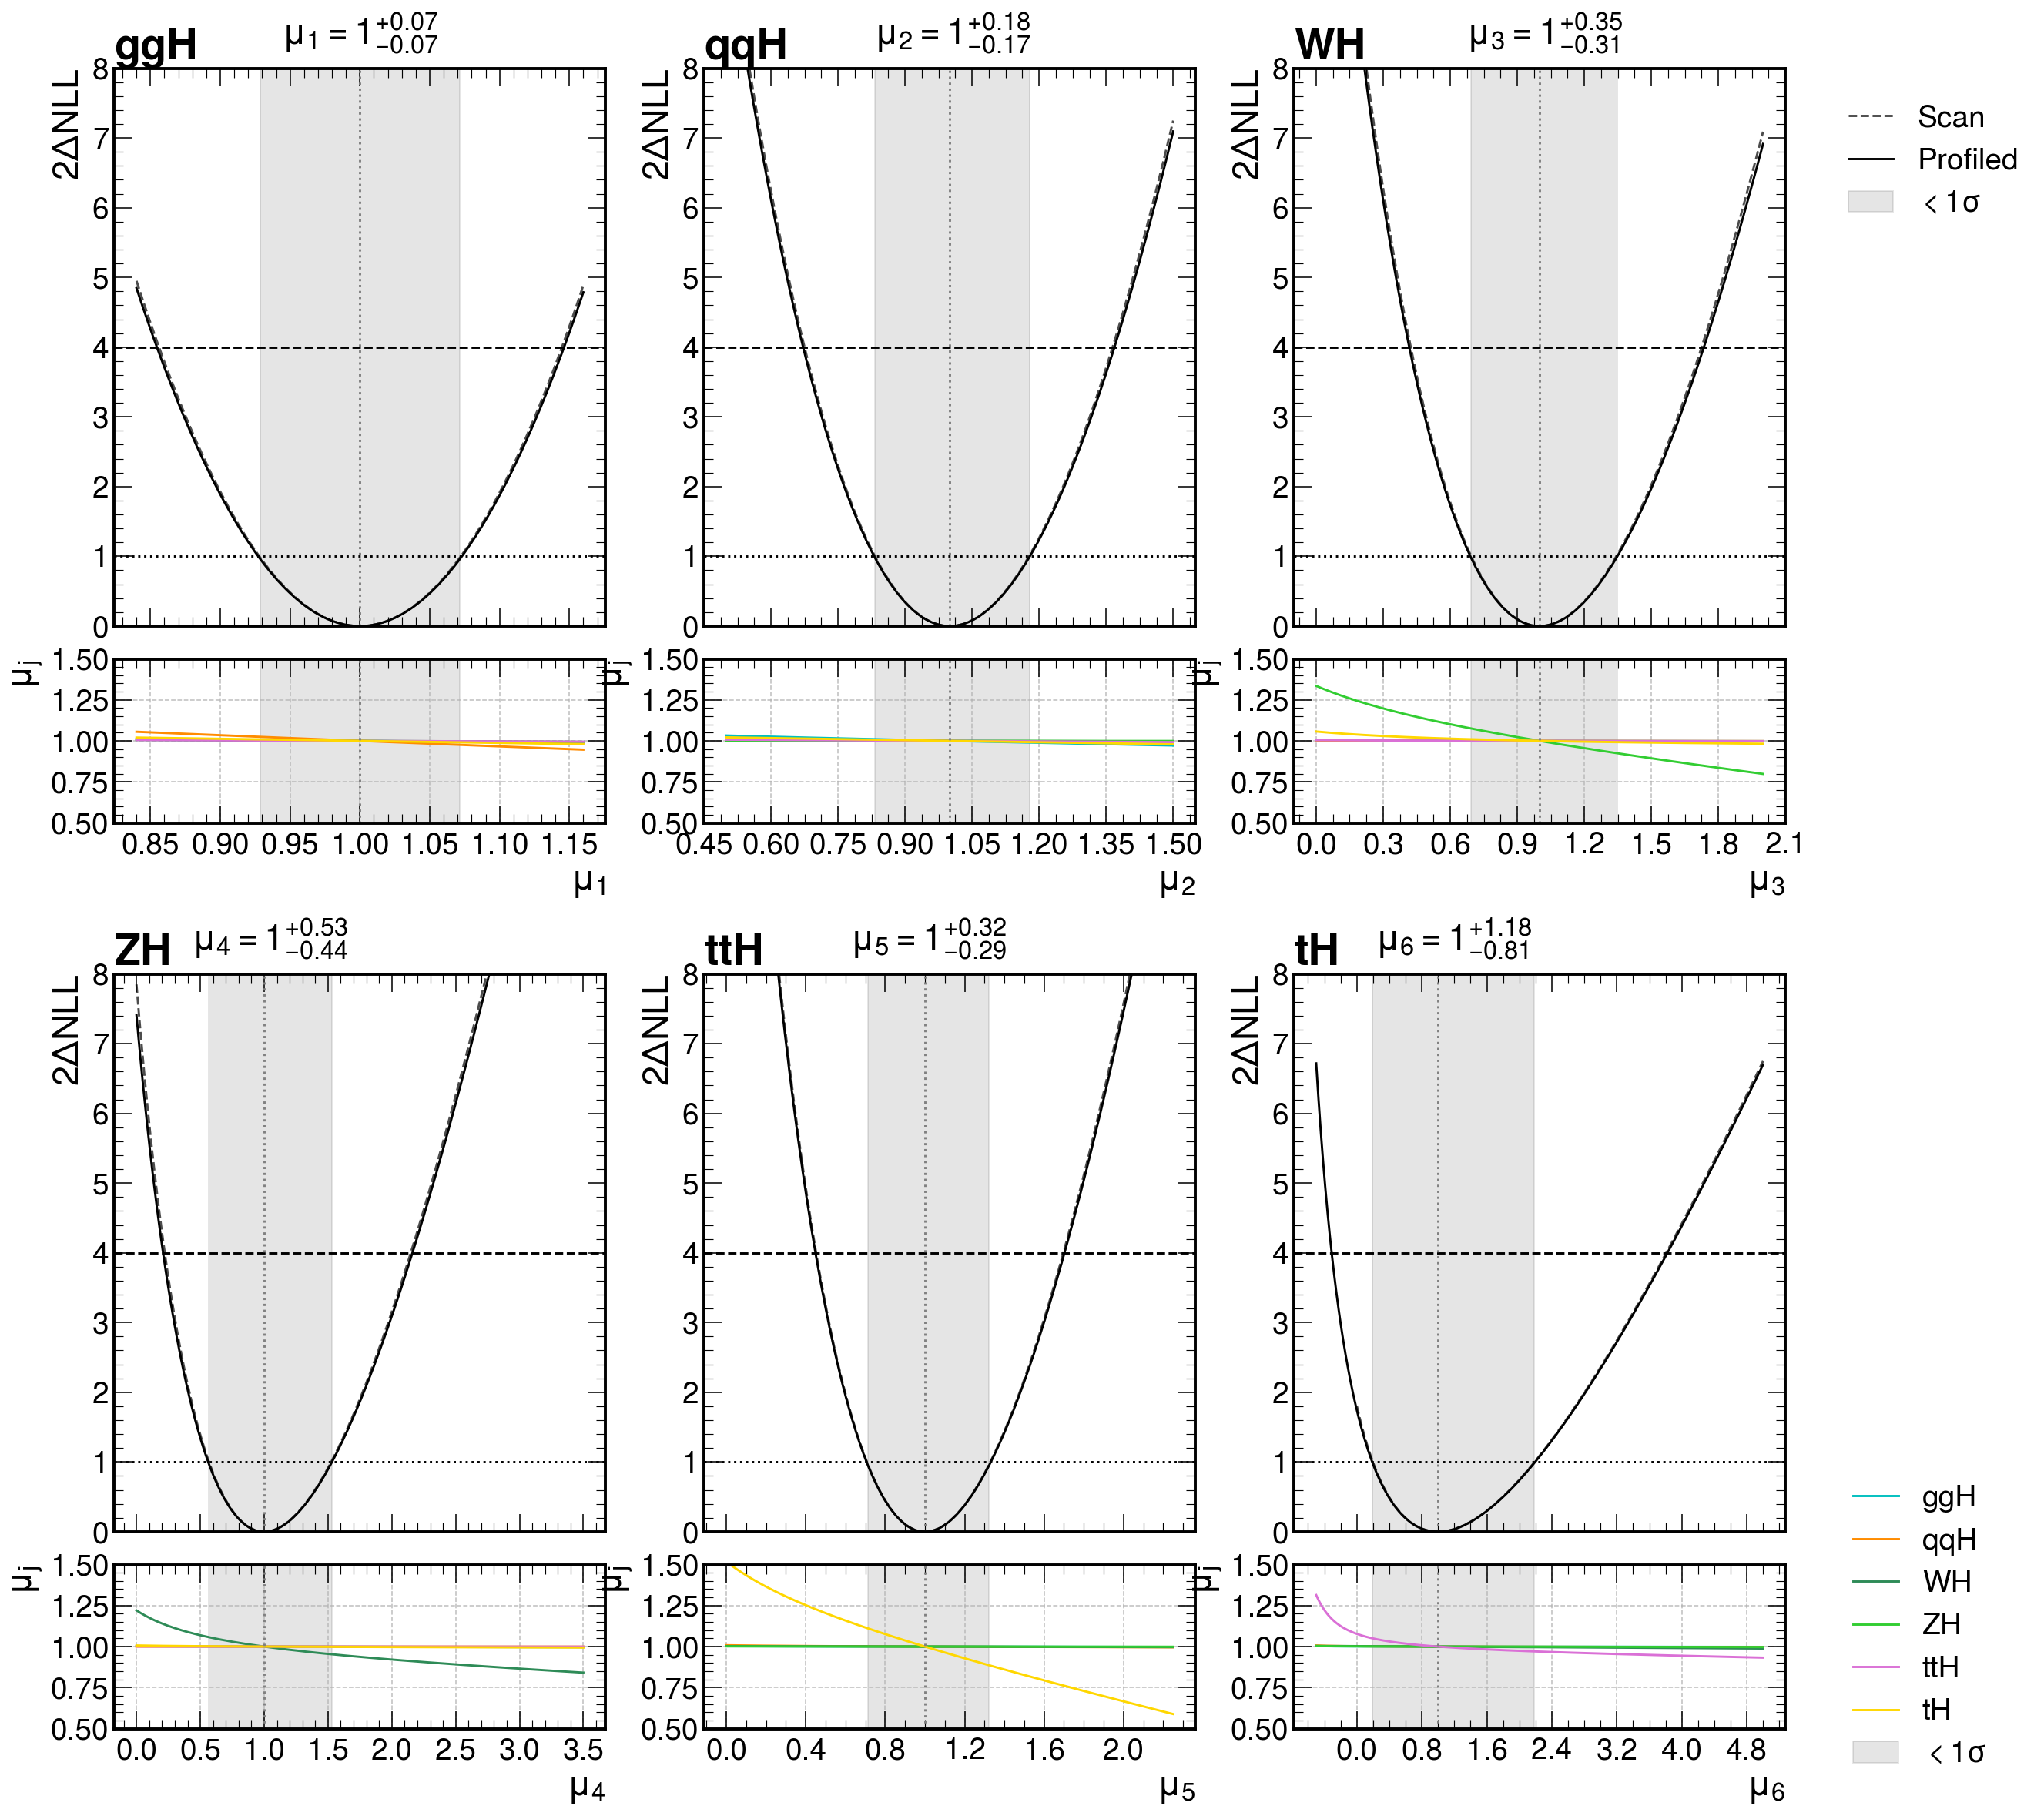

In [50]:
Likelihoods(cm_ia_xgb,ratio = [0.32,1,2,5,2.5,8],title='xgb_ia',num=200,xlim=-0.5,limx=[5],steps=200,lr=0.04,plim=[-0.5,0.5])

# Likelihood compare

In [95]:
# ratio = [0.32,1,1.5,4,1.5,20]
ratio = [0.4,2.5,2.5,3.5,3,40]
# ratio = [0.4,2,12,25,5,50]
def Likelihoods2(cm,cm_c,cm_n,ratio,title1='XGB',title2='IA',title3='Bayesian',num=100,xlim=-10,limx = [0,1,2,3,4,5,6],steps=140,lr=0.03,plim=[-3,3],color=['b','r']):
    fs = (20,20)
    color1,color2=color
    f = plt.figure(figsize=fs)
    gs0 = gridspec.GridSpec(2,3,figure=f,wspace=0.2, hspace=0.3)
    handles=[]
    labels=[]
    for i in range(6):
        xlimt = 0
        if i in limx:
            xlimt=xlim
        print(f'Begin to Plot {col[i+1]}')
        theta = torch.ones(6)
        thetam =  np.linspace(max(-1,-ratio[i]*0.5),ratio[i]*.5,num)
        thetac =  np.linspace(max(-10,-ratio[i]*0.5),ratio[i]*.5,num)
        thetas =  np.linspace(max(xlimt-1,-ratio[i]*0.5),ratio[i]*.5,num)
        theta_val = np.copy(theta[0])
        likelihood_ia = torch.tensor([])
        likelihood_ce = torch.tensor([])
        likelihood_n = torch.tensor([])
        for j in thetam:
            theta[i] = theta_val+j
            nlls = nll(theta,cm).view(-1)
            nlls_ce = nll(theta,cm_c).view(-1)
            nlls_n = nll(theta,cm_n).view(-1)
            likelihood_ia = torch.cat([likelihood_ia,nlls])
            likelihood_ce = torch.cat([likelihood_ce,nlls_ce])
            likelihood_n = torch.cat([likelihood_n,nlls_n])
        lkpf_ia,Theta_ia = LL_prof(cm,i,max(-9,1-ratio[i]*0.5),1+ratio[i]*.5,num,steps=steps,lr=lr)
        lkpf_ce,Theta_ce = LL_prof(cm_c,i,max(xlimt,1-ratio[i]*0.5),1+ratio[i]*.5,num,steps=steps,lr=lr)
        lkpf_n,Theta_n = LL_prof(cm_n,i,max(xlimt,1-ratio[i]*0.5),1+ratio[i]*.5,num,steps=steps,lr=lr)
        
        # gs00 = gridspec.GridSpecFromSubplotSpec(4,0,subplot_spec=gs0[i])
        ax1 = f.add_subplot(gs0[i])
        ax1.plot(thetam+1,likelihood_ia-likelihood_ia.min(), 
                 color='black',linestyle='--', alpha=0.7,label = f'{title1} Scan')
        ax1.plot(thetam+1,likelihood_n-likelihood_n.min(),
                 color='blue',linestyle='--',alpha=0.7,label = f'{title3} scan')
        ax1.plot(thetam+1,likelihood_ce-likelihood_ce.min(), 
                 color='r',linestyle='--',alpha=0.7,label = f'{title2} scan')
        
        ax1.plot(thetac+1,lkpf_ia-lkpf_ia.min(),color = 'black',label = f'{title1} Profiled')
        ax1.plot(thetas+1,lkpf_n-lkpf_n.min(),color = color1,label = f'{title3} profiled')
        ax1.plot(thetas+1,lkpf_ce-lkpf_ce.min(),color = color2,label = f'{title2} profiled')
        
        xmax = thetac[(lkpf_ia-lkpf_ia.min())<1].max()+1
        xmin = thetac[(lkpf_ia-lkpf_ia.min())<1].min()+1
        xmax1 = thetas[(lkpf_ce-lkpf_ce.min())<1].max()+1
        xmin1 = thetas[(lkpf_ce-lkpf_ce.min())<1].min()+1
        xmax2 = thetas[(lkpf_n-lkpf_n.min())<1].max()+1
        xmin2 = thetas[(lkpf_n-lkpf_n.min())<1].min()+1
        ax1.axvspan(xmin, xmax, hatch ='..', facecolor='none', edgecolor='grey',alpha=0.5, label=f'$<1\sigma$')
        ax1.axvspan(xmin2, xmax2, color=color1, alpha=0.05, label=f'$<1\sigma$-Bayesian')
        ax1.axvspan(xmin1, xmax1, color='mistyrose', alpha=1, label=f'$<1\sigma$-IA')
        
        # ax1.axvspan(xmin1, xmax1, color='mistyrose', alpha=0.5)
        
        ax1.text(1, 8.5, fr'$\mu_{{{i+1}}}=1^{{+{xmax-1:.2f}}}_{{{xmin-1:.2f}}}$',
         horizontalalignment='center', verticalalignment='center', fontsize=24, color='black')
        ax1.text(1, 9.5, fr'$\mu_{{{i+1}}}=1^{{+{xmax1-1:.2f}}}_{{{xmin1-1:.2f}}}$',
         horizontalalignment='center', verticalalignment='center', fontsize=24, color=color2)
        ax1.text(1, 9, fr'$\mu_{{{i+1}}}=1^{{+{xmax2-1:.2f}}}_{{{xmin2-1:.2f}}}$',
         horizontalalignment='center', verticalalignment='center', fontsize=24, color=color1)
        ax1.set_ylim(0,8)
        ax1.set_xlim(max(min(thetac+1),1+5*(xmin1-1)),min(max(thetac+1),1+5*(xmax1-1)))
        ax1.axhline(y=1,color='black',linestyle='-')
        ax1.axhline(y=4,color='black',linestyle='--')
        ax1.axvline(x=1,color='grey',linestyle='-')
        ax1.set_title(f'{col[i+1]}',loc='left',fontweight='bold')
        ax1.set_ylabel('2$\Delta$NLL')
        ax1.set_xlabel(fr'$\mu_{{{i+1}}}$')

        # ax1.legend()
        handles1, labels1 = ax1.get_legend_handles_labels() 
        # handles.append(handles2)


        # plt.setp(ax1.get_xticklabels(), visible=False)
        print(Theta_ia.max()) 
    f.legend(handles1, labels1, loc='upper right', bbox_to_anchor=(1.05, 0.87), 
            fancybox=True,edgecolor='black',framealpha=True,borderaxespad=0.)
    f.savefig(f'{folder_name}/LH_{title1}_{title2}_CM.pdf',bbox_inches='tight')

In [69]:
current_directory = os.getcwd()
print(current_directory)

/vols/cms/hw423/Week14


In [78]:
torch.save(cm_xgb, "/vols/cms/hw423/Week14/test/cm_xgb.pt")
torch.save(cm_ia_xgb, "/vols/cms/hw423/Week14/test/cm_ia_xgb.pt")
torch.save(cm_xgb_new, "/vols/cms/hw423/Week14/test/cm_xgb_new.pt")

Begin to Plot ggH
1.5159721098981904
Begin to Plot qqH
4.4563393200216845
Begin to Plot WH
2.6950529714315836
Begin to Plot ZH
2.1244638774827638
Begin to Plot ttH
4.735780157145489
Begin to Plot tH
1.18511969047012


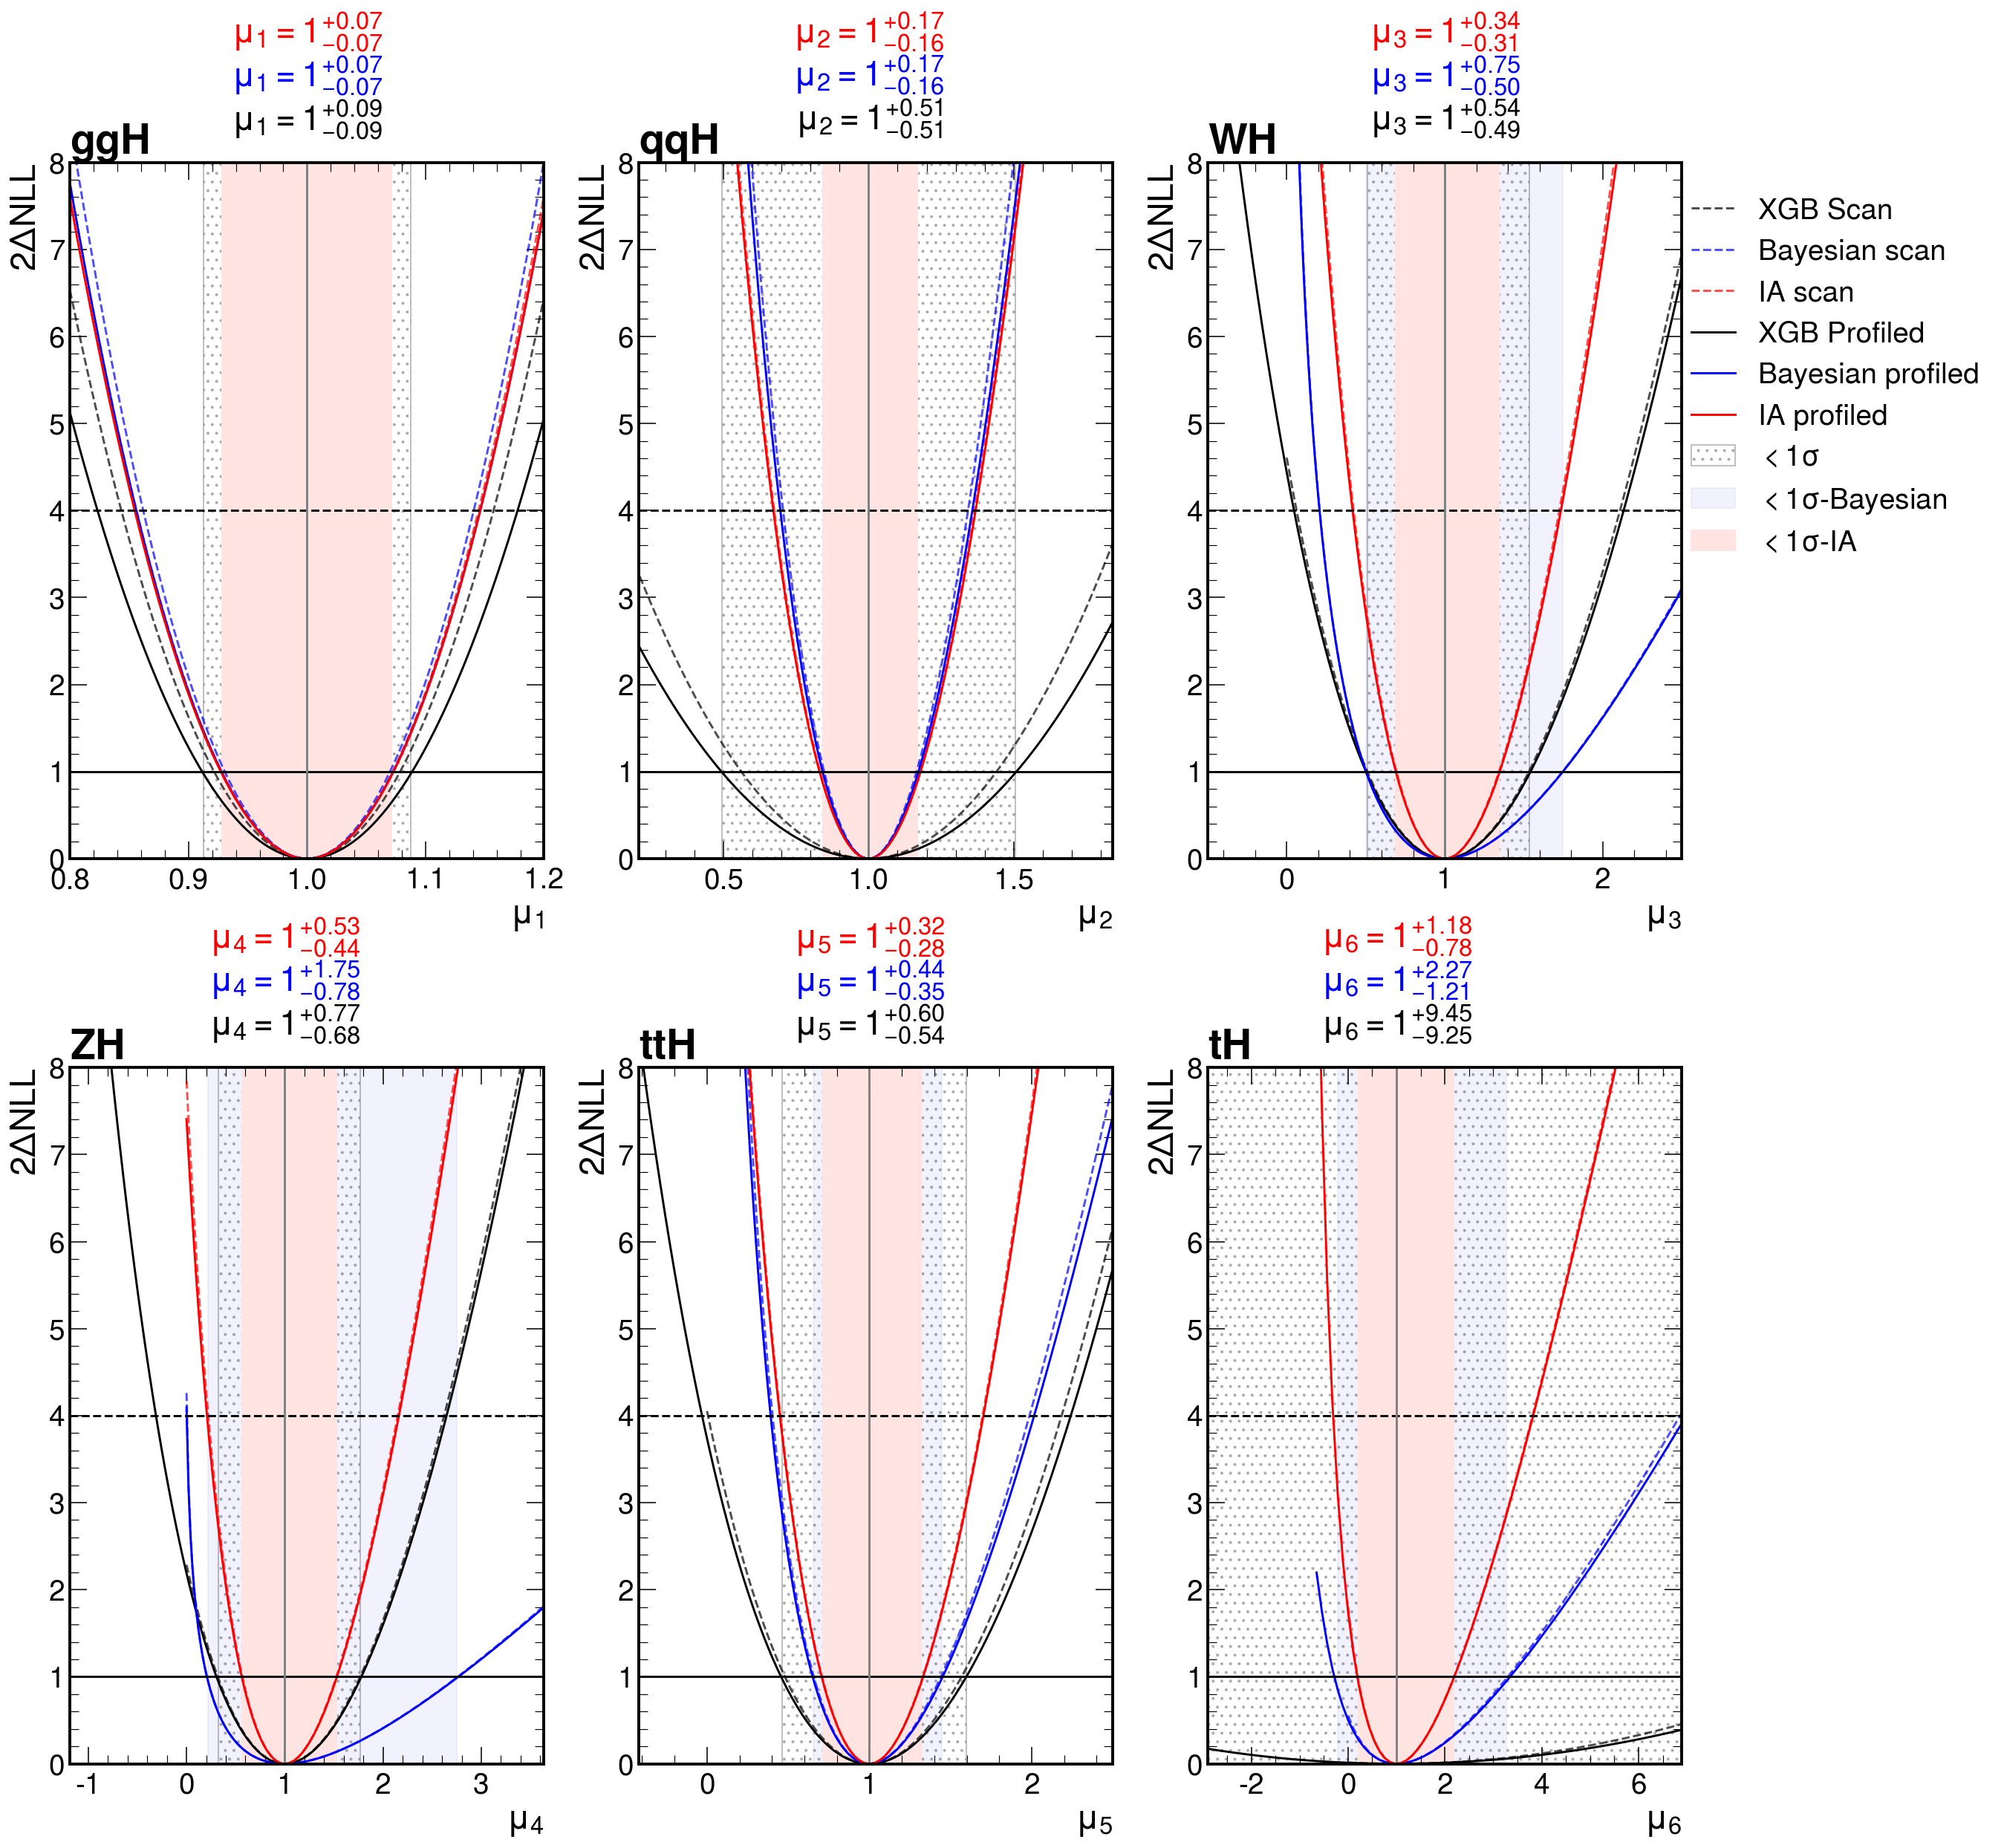

In [100]:
Likelihoods2(cm_xgb,cm_ia_xgb,cm_xgb_new,ratio = [0.4,3,3,6,3,40],
             title1='XGB',title2='IA',title3='Bayesian',
             num=200,xlim=-0.65,limx=[5],color=['b','r'])

In [ ]:
# ratio = [0.32,1,1.5,4,1.5,20]
ratio = [0.4,2.5,2.5,3.5,3,40]
# ratio = [0.4,2,12,25,5,50]
def Likelihoods1(cm,cm_c,cm_n,ratio,title1='XGB',title2='IA',num=100,xlim=-10,limx = [0,1,2,3,4,5,6],steps=140,lr=0.03,plim=[-3,3],color=['b','r']):
    fs = (20,20)
    color1,color2=color
    f = plt.figure(figsize=fs)
    gs0 = gridspec.GridSpec(2,3,figure=f,wspace=0.2, hspace=0.3)
    handles=[]
    labels=[]
    for i in range(6):
        xlimt = 0
        if i in limx:
            xlimt=xlim
        print(f'Begin to Plot {col[i+1]}')
        theta = torch.ones(6)
        thetam =  np.linspace(max(-1,-ratio[i]*0.5),ratio[i]*.5,num)
        thetac =  np.linspace(max(-10,-ratio[i]*0.5),ratio[i]*.5,num)
        thetas =  np.linspace(max(xlimt-1,-ratio[i]*0.5),ratio[i]*.5,num)
        theta_val = np.copy(theta[0])
        likelihood_ia = torch.tensor([])
        likelihood_ce = torch.tensor([])
        # likelihood_n = torch.tensor([])
        for j in thetam:
            theta[i] = theta_val+j
            nlls = nll(theta,cm).view(-1)
            nlls_ce = nll(theta,cm_c).view(-1)
            nlls_n = nll(theta,cm_n).view(-1)
            likelihood_ia = torch.cat([likelihood_ia,nlls])
            likelihood_ce = torch.cat([likelihood_ce,nlls_ce])
            # likelihood_n = torch.cat([likelihood_n,nlls_n])
        lkpf_ia,Theta_ia = LL_prof(cm,i,max(-9,1-ratio[i]*0.5),1+ratio[i]*.5,num,steps=steps,lr=lr)
        lkpf_ce,Theta_ce = LL_prof(cm_c,i,max(xlimt,1-ratio[i]*0.5),1+ratio[i]*.5,num,steps=steps,lr=lr)
        # lkpf_n,Theta_n = LL_prof(cm_n,i,max(xlimt,1-ratio[i]*0.5),1+ratio[i]*.5,num,steps=steps,lr=lr)
        
        # gs00 = gridspec.GridSpecFromSubplotSpec(4,0,subplot_spec=gs0[i])
        ax1 = f.add_subplot(gs0[i])
        ax1.plot(thetam+1,likelihood_ia-likelihood_ia.min(), 
                 color='black',linestyle='--', alpha=0.7,label = f'{title1} Scan')
        # ax1.plot(thetam+1,likelihood_n-likelihood_n.min(),
                #  color='blue',linestyle='--',alpha=0.7,label = f'{title3} scan')
        ax1.plot(thetam+1,likelihood_ce-likelihood_ce.min(), 
                 color='r',linestyle='--',alpha=0.7,label = f'{title2} scan')
        
        ax1.plot(thetac+1,lkpf_ia-lkpf_ia.min(),color = 'black',label = f'{title1} Profiled')
        # ax1.plot(thetas+1,lkpf_n-lkpf_n.min(),color = color1,label = f'{title3} profiled')
        ax1.plot(thetas+1,lkpf_ce-lkpf_ce.min(),color = color2,label = f'{title2} profiled')
        
        xmax = thetac[(lkpf_ia-lkpf_ia.min())<1].max()+1
        xmin = thetac[(lkpf_ia-lkpf_ia.min())<1].min()+1
        xmax1 = thetas[(lkpf_ce-lkpf_ce.min())<1].max()+1
        xmin1 = thetas[(lkpf_ce-lkpf_ce.min())<1].min()+1
        # xmax2 = thetas[(lkpf_n-lkpf_n.min())<1].max()+1
        # xmin2 = thetas[(lkpf_n-lkpf_n.min())<1].min()+1
        ax1.axvspan(xmin, xmax, hatch ='..', facecolor='none', edgecolor='grey',alpha=0.5, label=f'$<1\sigma$')
        # ax1.axvspan(xmin2, xmax2, color=color1, alpha=0.05, label=f'$<1\sigma$-Bayesian')
        ax1.axvspan(xmin1, xmax1, color='mistyrose', alpha=1, label=f'$<1\sigma$-IA')
        
        # ax1.axvspan(xmin1, xmax1, color='mistyrose', alpha=0.5)
        
        ax1.text(1, 8.5, fr'$\mu_{{{i+1}}}=1^{{+{xmax-1:.2f}}}_{{{xmin-1:.2f}}}$',
         horizontalalignment='center', verticalalignment='center', fontsize=24, color='black')
        ax1.text(1, 9.5, fr'$\mu_{{{i+1}}}=1^{{+{xmax1-1:.2f}}}_{{{xmin1-1:.2f}}}$',
         horizontalalignment='center', verticalalignment='center', fontsize=24, color=color2)
        # ax1.text(1, 9, fr'$\mu_{{{i+1}}}=1^{{+{xmax2-1:.2f}}}_{{{xmin2-1:.2f}}}$',
        #  horizontalalignment='center', verticalalignment='center', fontsize=24, color=color1)
        ax1.set_ylim(0,8)
        ax1.set_xlim(max(min(thetac+1),1+5*(xmin1-1)),min(max(thetac+1),1+5*(xmax1-1)))
        ax1.axhline(y=1,color='black',linestyle='-')
        ax1.axhline(y=4,color='black',linestyle='--')
        ax1.axvline(x=1,color='grey',linestyle='-')
        ax1.set_title(f'{col[i+1]}',loc='left',fontweight='bold')
        ax1.set_ylabel('2$\Delta$NLL')
        ax1.set_xlabel(fr'$\mu_{{{i+1}}}$')

        # ax1.legend()
        handles1, labels1 = ax1.get_legend_handles_labels() 
        # handles.append(handles2)


        # plt.setp(ax1.get_xticklabels(), visible=False)
        print(Theta_ia.max()) 
    f.legend(handles1, labels1, loc='upper right', bbox_to_anchor=(1.05, 0.87), 
            fancybox=True,edgecolor='black',framealpha=True,borderaxespad=0.)
    f.savefig(f'{folder_name}/LH_{title1}_{title2}_CM.pdf',bbox_inches='tight')

# Contours

In [165]:
def nll_prof_2(theta1,cm,j1,j2,val1,val2):
    O = torch.sum(cm,dim=1)
    val1 =torch.tensor(val1,dtype=theta1.dtype)
    val2 =torch.tensor(val2,dtype=theta1.dtype)
    theta0 = torch.ones(1)
    theta = torch.cat([theta0,theta1])
    theta[j1] = val1
    theta[j2] = val2
    return -(O@(torch.log(cm@theta))-torch.sum((cm@theta)))
def LL_prof_2(cm,j1,j2,x,y,n,steps=100,lr=lr):
    a,b = x[0],x[1]
    c,d = y[0],y[1]
    x_range=torch.linspace(a,b,n)
    y_range=torch.linspace(c,d,n)
    x_grid, y_grid = torch.meshgrid(x_range, y_range, indexing='ij')
    likelihood_prf = torch.zeros(x_grid.size())
    with tqdm(range(n)) as t:
        for i1 in t:
            for i2 in range(n):
                theta = torch.ones(6,requires_grad=True)
                optimizer = torch.optim.Adam([theta], lr=lr)
                for step in range(steps):
                    optimizer.zero_grad()
                    loss = nll_prof_2(theta,cm,j1,j2,x_grid[i1,i2],y_grid[i1,i2])
                    loss.backward()
                    optimizer.step()
                likelihood_prf[i1,i2]=loss.item()
        lkpf = likelihood_prf.detach().numpy()
       
    return lkpf
def ContFields(i,j,cm,x,y,res,steps = 300,lr = 0.001):
    LP= LL_prof_2(cm,i,j,x,y,res,steps=steps,lr=lr)
    deltLP = LP-LP.min()
    return deltLP
def PlotCont(i,j,x_ia,y_ia,x_new,y_new,x_xgb,y_xgb,res,deltLP56,deltLP56_xgb,deltLP56_new,xlim=None,ylim=None):
    x_range_ia = torch.linspace(x_ia[0],x_ia[1],res)
    y_range_ia = torch.linspace(y_ia[0],y_ia[1],res)
    x_range_xgb = torch.linspace(x_xgb[0],x_xgb[1],res)
    y_range_xgb = torch.linspace(y_xgb[0],y_xgb[1],res)
    x_range_new = torch.linspace(x_new[0],x_new[1],res)
    y_range_new = torch.linspace(y_new[0],y_new[1],res)
    

    x_grid_ia,y_grid_ia = torch.meshgrid(x_range_ia, y_range_ia, indexing='ij')
    x_grid_xgb,y_grid_xgb = torch.meshgrid(x_range_xgb, y_range_xgb, indexing='ij')
    x_grid_new,y_grid_new = torch.meshgrid(x_range_new, y_range_new, indexing='ij')
    # level=[1,2,4,90]
    level = [2.28,6.18,140]
    linestyles = ['-', ':','-.']
    
    alpha=[1,0.5,0.3,0.01]
    plt.figure(figsize=(6, 8))
    IA_c = plt.contour(x_grid_ia.numpy(), y_grid_ia.numpy(), deltLP56, levels=level,cmap = 'autumn',labels = 'IA',linestyles=linestyles,)
    XGB_c = plt.contour(x_grid_xgb.numpy(), y_grid_xgb.numpy(), deltLP56_xgb, levels=level,cmap = 'binary_r',labels = 'XGB',linestyles=linestyles)
    New_c = plt.contour(x_grid_new.numpy(), y_grid_new.numpy(), deltLP56_new, levels=level,cmap = 'winter',labels = 'Bayesian',linestyles=linestyles)
    # for contour in [IA_c,XGB_c,New_c]:
    #         for i, collection in enumerate(contour.collections):
    #             collection.set_alpha(alpha[i])
    plt.clabel(IA_c, inline=True, fontsize=8)
    plt.clabel(XGB_c, inline=True, fontsize=8)
    plt.clabel(New_c, inline=True, fontsize=8)
    plt.plot(1,1,color = 'red',label='IA')
    plt.plot(1,1,color = 'blue',label='Bayesian')
    plt.plot(1,1,color = 'black',label='XGB')
    
    plt.scatter(1,1,color = 'black',label='SM')
    plt.xlabel(f'{col[i]}')
    plt.ylabel(f'{col[j]}')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend()
    plt.savefig(f'{folder_name}/Contour_{i}{j}.pdf',bbox_inches='tight')
def PlotCont2(i,j,x_ia,y_ia,x_xgb,y_xgb,res,deltLP56,deltLP56_xgb,xlim=(0,4),figsize=(10, 8)):
    x_range_ia = torch.linspace(x_ia[0],x_ia[1],res)
    y_range_ia = torch.linspace(y_ia[0],y_ia[1],res)
    x_range_xgb = torch.linspace(x_xgb[0],x_xgb[1],res)
    y_range_xgb = torch.linspace(y_xgb[0],y_xgb[1],res)
    x_grid_ia,y_grid_ia = torch.meshgrid(x_range_ia, y_range_ia, indexing='ij')
    x_grid_xgb,y_grid_xgb = torch.meshgrid(x_range_xgb, y_range_xgb, indexing='ij')
    # level=[1,2,4,90]
    level = [2.28,5.99,9.23,90]
    plt.figure(figsize=figsize)
    IA_c = plt.contour(x_grid_ia.numpy(), y_grid_ia.numpy(), deltLP56, levels=level,cmap = 'autumn',labels = 'IA')
    XGB_c = plt.contour(x_grid_xgb.numpy(), y_grid_xgb.numpy(), deltLP56_xgb, levels=level,cmap = 'winter',labels = 'XGB')
    plt.clabel(IA_c, inline=True, fontsize=8)
    plt.clabel(XGB_c, inline=True, fontsize=8)
    plt.plot(1,1,color = 'red',label='IA')
    plt.plot(1,1,color = 'blue',label='XGB')
    plt.plot(1,1,color = 'green',label='Bayesian')
    plt.scatter(1,1,color = 'black',label='SM')
    plt.xlabel(f'{col[i]}')
    plt.ylabel(f'{col[j]}')
    plt.xlim(xlim)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{folder_name}/Contour2_{i}{j}.pdf',bbox_inches='tight')
    
def PlotContG(i,j,x_ia,y_ia,x_new,y_new,x_xgb,y_xgb,res,deltLP56,deltLP56_xgb,deltLP56_new,xlim=None,ylim=None):
    x_range_ia = torch.linspace(x_ia[0],x_ia[1],res)
    y_range_ia = torch.linspace(y_ia[0],y_ia[1],res)
    x_range_xgb = torch.linspace(x_xgb[0],x_xgb[1],res)
    y_range_xgb = torch.linspace(y_xgb[0],y_xgb[1],res)
    x_range_new = torch.linspace(x_new[0],x_new[1],res)
    y_range_new = torch.linspace(y_new[0],y_new[1],res)
    

    x_grid_ia,y_grid_ia = torch.meshgrid(x_range_ia, y_range_ia, indexing='ij')
    x_grid_xgb,y_grid_xgb = torch.meshgrid(x_range_xgb, y_range_xgb, indexing='ij')
    x_grid_new,y_grid_new = torch.meshgrid(x_range_new, y_range_new, indexing='ij')
    # level=[1,2,4,90]
    level = [2.28,6.18,140]
    linestyles = ['-', ':','-.']
    
    alpha=[1,0.5,0.3,0.01]
    plt.figure(figsize=(6, 8))
    IA_c = plt.contour(x_grid_ia.numpy(), y_grid_ia.numpy(), deltLP56, levels=level,cmap = 'autumn',labels = 'IA',linestyles=linestyles,)
    XGB_c = plt.contour(x_grid_xgb.numpy(), y_grid_xgb.numpy(), deltLP56_xgb, levels=level,cmap = 'binary_r',labels = 'XGB',linestyles=linestyles)
    New_c = plt.contour(x_grid_new.numpy(), y_grid_new.numpy(), deltLP56_new, levels=level,cmap = 'winter',labels = 'Bayesian',linestyles=linestyles)
    # for contour in [IA_c,XGB_c,New_c]:
    #         for i, collection in enumerate(contour.collections):
    #             collection.set_alpha(alpha[i])
    plt.clabel(IA_c, inline=True, fontsize=8)
    plt.clabel(XGB_c, inline=True, fontsize=8)
    plt.clabel(New_c, inline=True, fontsize=8)
    plt.plot(1,1,color = 'red',label='IA')
    plt.plot(1,1,color = 'blue',label='Bayesian')
    plt.plot(1,1,color = 'black',label='XGB')
    
    plt.scatter(1,1,color = 'black',label='SM')
    plt.xlabel(f'{col[i]}')
    plt.ylabel(f'{col[j]}')
    plt.xlim(xlim)
    plt.ylim(ylim)
    # plt.legend()
    plt.savefig(f'{folder_name}/Contour_{i}{j}.pdf',bbox_inches='tight')

In [154]:
IA_xy = [[0.7,1.3],[0,2],[0,3],[0,5],[0,3],[0,12]]
XGB_xy = [[0.6,1.4],[0,2.5],[-1,3],[0,6],[-1,3],[0,30]]
NEW_xy = [[0.7,1.3],[0,2],[0,4],[0,8],[0,3],[0,10]]


In [155]:
def PlotContours(i,j,res):
    
    x_ia = IA_xy[i-1]
    y_ia = IA_xy[j-1]
    x_xgb = XGB_xy[i-1]
    y_xgb = XGB_xy[j-1]
    x_new = NEW_xy[i-1]
    y_new = NEW_xy[j-1]

    deltLP56_ia = ContFields(i,j,cm_ia_xgb,x_ia,y_ia,res)
    deltLP56_new = ContFields(i,j,cm_xgb_new,x_new,y_new,res)
    deltLP56_xgb = ContFields(i,j,cm_xgb,x_xgb,y_xgb,res)

    np.save(f'{folder_name}/deltLP{i}{j}_xgb_ia.npy',deltLP56_ia)
    np.save(f'{folder_name}/deltLP{i}{j}_xgb_new.npy',deltLP56_new)
    np.save(f'{folder_name}/deltLP{i}{j}_xgb.npy',deltLP56_xgb)
    deltLP56_ia = np.load(f'{folder_name}/deltLP{i}{j}_xgb_ia.npy')
    deltLP56_new = np.load(f'{folder_name}/deltLP{i}{j}_xgb_new.npy')
    deltLP56_xgb = np.load(f'{folder_name}/deltLP{i}{j}_xgb.npy')
    PlotContG(i,j,x_ia,y_ia,x_new,y_new,x_xgb,y_xgb,res,deltLP56_ia,deltLP56_xgb,deltLP56_new)

In [157]:

for i in range(6):
    for j in range(6):
        print(i+1,j+1)
        if i<j:
            PlotContours(i+1,j+1,50)

1 1
1 2


 70%|███████   | 35/50 [03:26<01:28,  5.91s/it]


KeyboardInterrupt: 

### tH-ttH

In [181]:
res = 20
x_ia = [0,3]
y_ia = [0,12]
x_xgb = [-1,3]
y_xgb = [0,30]
steps = 300
lr=0.001
deltLP56_ia = ContFields(5,6,cm_ia_xgb,x_ia,y_ia,res,steps=steps,lr=lr)
deltLP56_new = ContFields(5,6,cm_xgb_new,x_ia,y_xgb,res,steps=steps,lr=lr)
deltLP56_xgb = ContFields(5,6,cm_xgb,x_xgb,y_xgb,res,steps=steps,lr=lr)

# np.save(f'{folder_name}/deltLP56_xgb_ia.npy',deltLP56_ia)
# np.save(f'{folder_name}/deltLP56_xgb_new.npy',deltLP56_new)
# np.save(f'{folder_name}/deltLP56_xgb.npy',deltLP56_xgb)
# deltLP56_ia = np.load(f'{folder_name}/deltLP56_xgb_ia.npy')
# deltLP56_new = np.load(f'{folder_name}/deltLP56_xgb_new.npy')
# deltLP56_xgb = np.load(f'{folder_name}/deltLP56_xgb.npy')

100%|██████████| 20/20 [00:45<00:00,  2.26s/it]


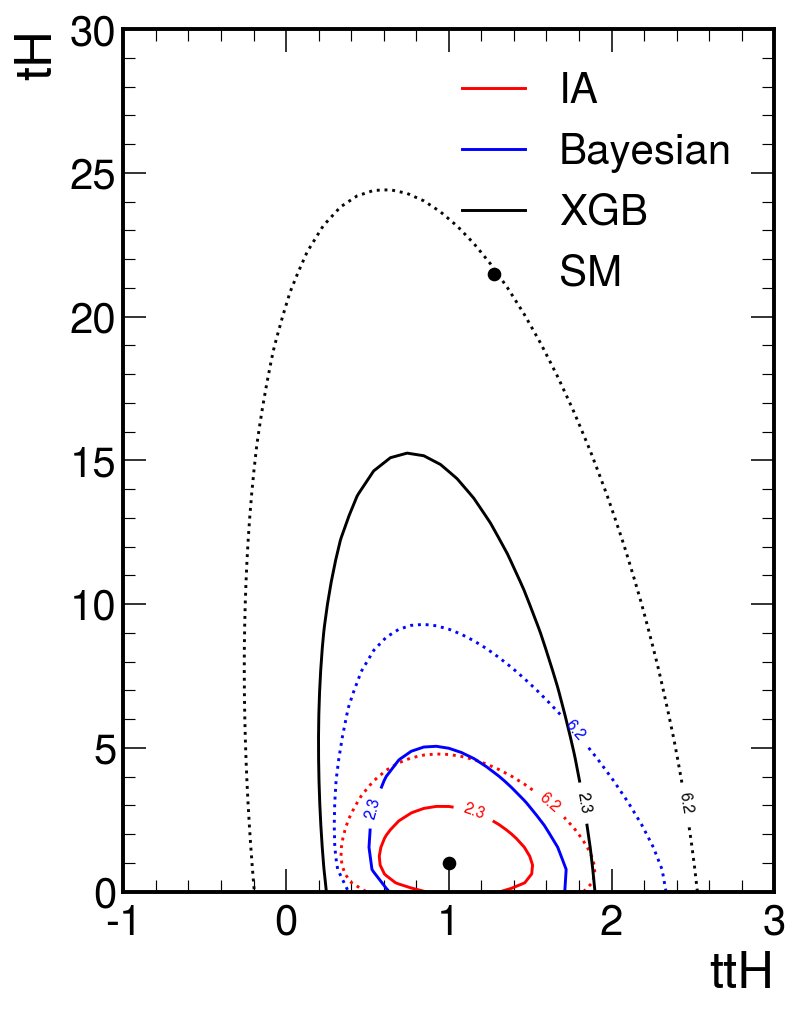

In [180]:
PlotCont(5,6,x_ia,y_ia,x_ia,y_xgb,x_xgb,y_xgb,res,deltLP56_ia,deltLP56_xgb,deltLP56_new)

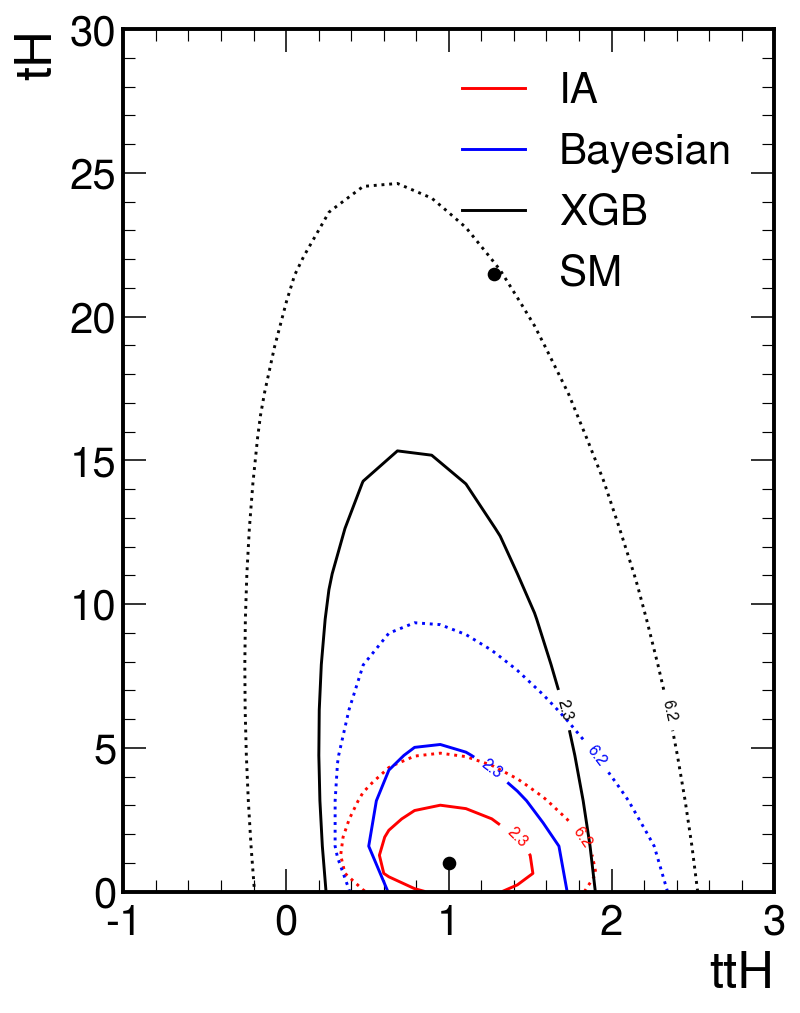

In [183]:
PlotCont(5,6,x_ia,y_ia,x_ia,y_xgb,x_xgb,y_xgb,res,deltLP56_ia,deltLP56_xgb,deltLP56_new)

### WH-ZH

In [65]:
res = 60
x_ia = [0,3]
y_ia = [0,5]
x_new = [0,4]
y_new = [0,8]
x_xgb = [-2,4]
y_xgb = [0,6]

# deltLP34_ia = ContFields(3,4,cm_ia_xgb,x_ia,y_ia,res)
# deltLP34_new = ContFields(3,4,cm_xgb_new,x_new,y_new,res)
# deltLP34_xgb = ContFields(3,4,cm_xgb,x_xgb,y_xgb,res)

# np.save(f'{folder_name}/deltLP34_xgb_ia.npy',deltLP34_ia)
# np.save(f'{folder_name}/deltLP34_xgb_new.npy',deltLP34_new)
# np.save(f'{folder_name}/deltLP34_xgb.npy',deltLP34_xgb)
deltLP34_ia = np.load(f'{folder_name}/deltLP34_xgb_ia.npy')
deltLP34_new = np.load(f'{folder_name}/deltLP34_xgb_new.npy')
deltLP34_xgb = np.load(f'{folder_name}/deltLP34_xgb.npy')

/tmp/ipykernel_2911918/3970991306.py:52: UserWarning: The following kwargs were not used by contour: 'labels'
  IA_c = plt.contour(x_grid_ia.numpy(), y_grid_ia.numpy(), deltLP56, levels=level,cmap = 'autumn',labels = 'IA',linestyles=linestyles)
/tmp/ipykernel_2911918/3970991306.py:53: UserWarning: The following kwargs were not used by contour: 'labels'
  XGB_c = plt.contour(x_grid_xgb.numpy(), y_grid_xgb.numpy(), deltLP56_xgb, levels=level,cmap = 'binary_r',labels = 'XGB',linestyles=linestyles)
/tmp/ipykernel_2911918/3970991306.py:54: UserWarning: The following kwargs were not used by contour: 'labels'
  New_c = plt.contour(x_grid_new.numpy(), y_grid_new.numpy(), deltLP56_new, levels=level,cmap = 'winter',labels = 'Bayesian',linestyles=linestyles)


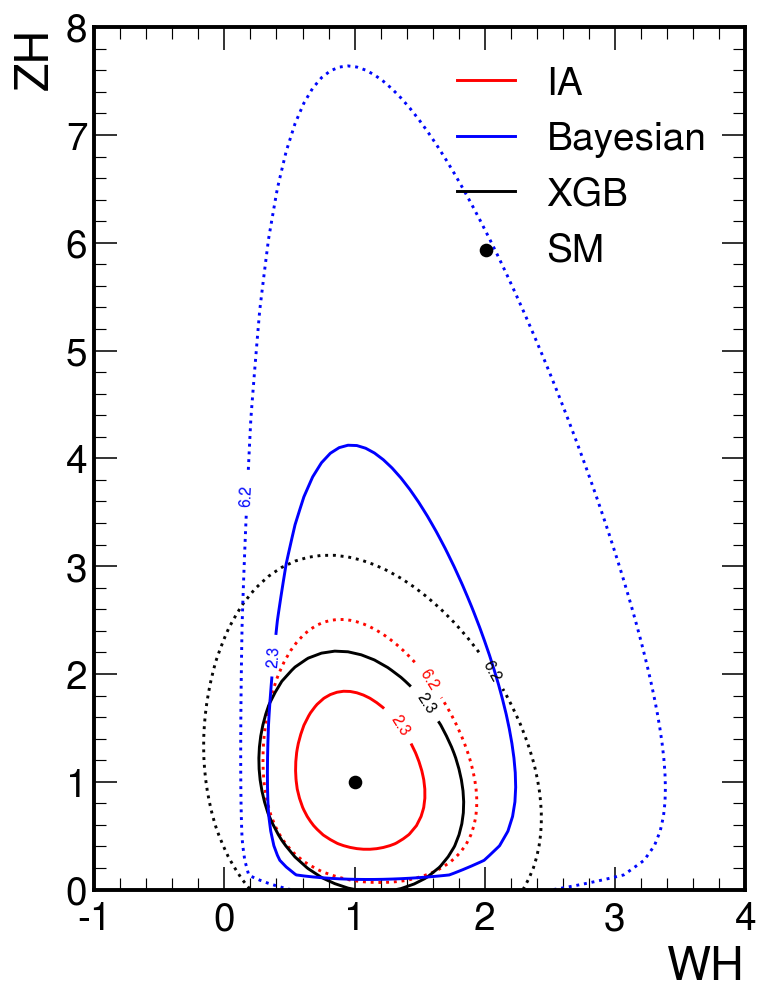

In [66]:
PlotCont(3,4,x_ia,y_ia,x_new,y_new,x_xgb,y_xgb,res,deltLP34_ia,deltLP34_xgb,deltLP34_new,xlim=(-1,4))

### ggH-qqH

In [61]:
res = 40
x_ia = [0.7,1.3]
y_ia = [0,2]
y_new = [0,2]
x_xgb = [0.6,1.4]
y_xgb = [0,3]

# deltLP34_ia = ContFields(1,2,cm_ia_xgb,x_ia,y_ia,res)
# deltLP34_new = ContFields(1,2,cm_xgb_new,x_ia,y_new,res)
# deltLP34_xgb = ContFields(1,2,cm_xgb,x_xgb,y_xgb,res)

# np.save(f'{folder_name}/deltLP12_xgb_ia.npy',deltLP34_ia)
# np.save(f'{folder_name}/deltLP12_xgb_new.npy',deltLP34_new)
# np.save(f'{folder_name}/deltLP12_xgb.npy',deltLP34_xgb)
deltLP34_ia = np.load(f'{folder_name}/deltLP12_xgb_ia.npy')
deltLP34_new = np.load(f'{folder_name}/deltLP12_xgb_new.npy')
deltLP34_xgb = np.load(f'{folder_name}/deltLP12_xgb.npy')

/tmp/ipykernel_2911918/3970991306.py:52: UserWarning: The following kwargs were not used by contour: 'labels'
  IA_c = plt.contour(x_grid_ia.numpy(), y_grid_ia.numpy(), deltLP56, levels=level,cmap = 'autumn',labels = 'IA',linestyles=linestyles)
/tmp/ipykernel_2911918/3970991306.py:53: UserWarning: The following kwargs were not used by contour: 'labels'
  XGB_c = plt.contour(x_grid_xgb.numpy(), y_grid_xgb.numpy(), deltLP56_xgb, levels=level,cmap = 'binary_r',labels = 'XGB',linestyles=linestyles)
/tmp/ipykernel_2911918/3970991306.py:54: UserWarning: The following kwargs were not used by contour: 'labels'
  New_c = plt.contour(x_grid_new.numpy(), y_grid_new.numpy(), deltLP56_new, levels=level,cmap = 'winter',labels = 'Bayesian',linestyles=linestyles)


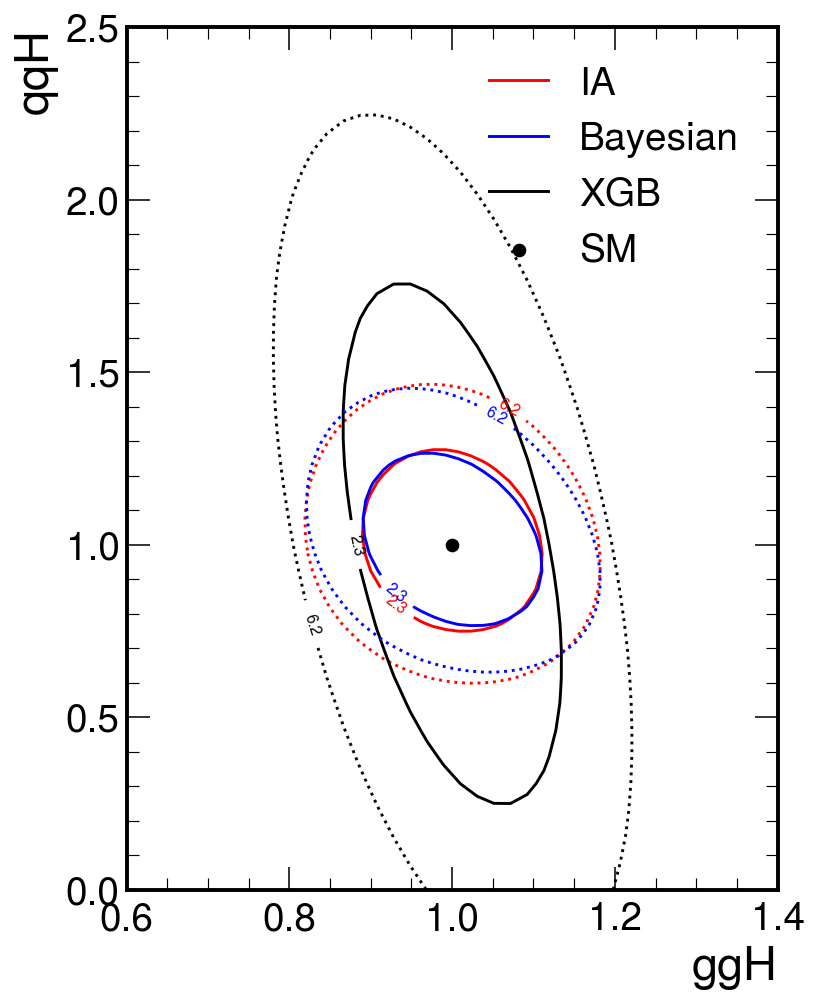

In [63]:
PlotCont(1,2,x_ia,y_ia,x_ia,y_new,x_xgb,y_xgb,res,deltLP34_ia,deltLP34_xgb,deltLP34_new,xlim=(0.6,1.4),ylim=(0,2.5))

In [ ]:
x_range_ia = torch.linspace(x_ia[0],x_ia[1],60)
y_range_ia = torch.linspace(y_ia[0],y_ia[1],60)
x_range_xgb = torch.linspace(x_xgb[0],x_xgb[1],60)
y_range_xgb = torch.linspace(y_xgb[0],y_xgb[1],60)

x_grid_ia,y_grid_ia = torch.meshgrid(x_range_ia, y_range_ia, indexing='ij')
x_grid_xgb,y_grid_xgb = torch.meshgrid(x_range_xgb, y_range_xgb, indexing='ij')
level=[1,2,4,90]
plt.figure(figsize=(8, 8))
IA_c = plt.contour(x_grid_ia.numpy(), y_grid_ia.numpy(), deltLP34, levels=level,cmap = 'autumn',labels = 'IA')
XGB_c = plt.contour(x_grid_xgb.numpy(), y_grid_xgb.numpy(), deltLP34_xgb, levels=level,cmap = 'winter',labels = 'XGB')
plt.clabel(IA_c, inline=True, fontsize=8)
plt.clabel(XGB_c, inline=True, fontsize=8)
plt.plot(1,1,color = 'red',label='IA')
plt.plot(1,1,color = 'blue',label='XGB')
plt.scatter(1,1,color = 'black',label='SM')
plt.xlabel('WH')
plt.ylabel('ZH')
plt.xlim(0,3.5)
plt.legend()
plt.tight_layout()
plt.savefig(f'{folder_name}/Contour_34.pdf')


NameError: name 'deltLP34' is not defined

<Figure size 560x560 with 0 Axes>

In [ ]:
x_ia = [0.,1.2]
y_ia = [0.5,1.5]
x_xgb = [0.7,1.3]
y_xgb = [0,2.3]
res = 50
LP12= LL_prof_2(cm_ia,1,2,x_ia,y_ia,res)
deltLP12 = LP12-LP12.min()
LP12_xgb= LL_prof_2(cm_xgb,1,2,x_xgb,y_xgb,res)
deltLP12_xgb = LP12_xgb-LP12_xgb.min()
np.save(f'{folder_name}/deltLP12.npy',deltLP12)
np.save(f'{folder_name}/deltLP12_xgb.npy',deltLP12_xgb)

  0%|          | 0/50 [00:00<?, ?it/s]/tmp/ipykernel_1513565/1473406898.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val1 =torch.tensor(val1,dtype=theta1.dtype)
/tmp/ipykernel_1513565/1473406898.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val2 =torch.tensor(val2,dtype=theta1.dtype)
100%|██████████| 50/50 [03:44<00:00,  4.50s/it]


/tmp/ipykernel_1513565/2292824367.py:10: UserWarning: The following kwargs were not used by contour: 'labels'
  IA_c = plt.contour(x_grid_ia.numpy(), y_grid_ia.numpy(), deltLP12, levels=level,cmap = 'autumn',labels = 'IA')
/tmp/ipykernel_1513565/2292824367.py:11: UserWarning: The following kwargs were not used by contour: 'labels'
  XGB_c = plt.contour(x_grid_xgb.numpy(), y_grid_xgb.numpy(), deltLP12_xgb, levels=level,cmap = 'winter',labels = 'XGB')


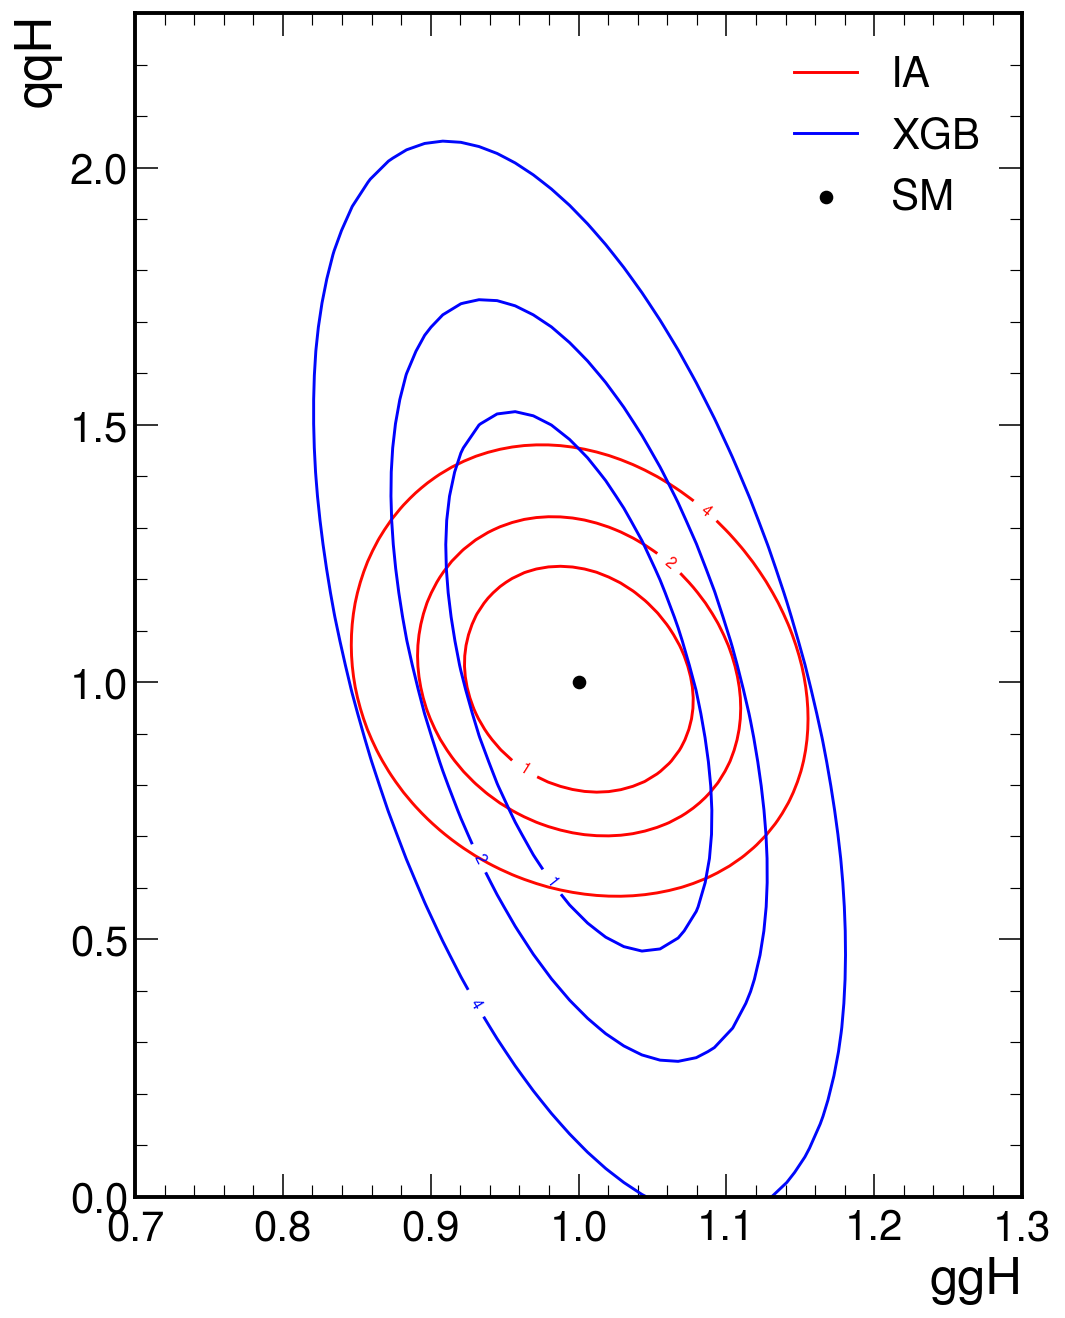

In [ ]:
x_range_ia = torch.linspace(x_ia[0],x_ia[1],res)
y_range_ia = torch.linspace(y_ia[0],y_ia[1],res)
x_range_xgb = torch.linspace(x_xgb[0],x_xgb[1],res)
y_range_xgb = torch.linspace(y_xgb[0],y_xgb[1],res)

x_grid_ia,y_grid_ia = torch.meshgrid(x_range_ia, y_range_ia, indexing='ij')
x_grid_xgb,y_grid_xgb = torch.meshgrid(x_range_xgb, y_range_xgb, indexing='ij')
level=[1,2,4,90]
plt.figure(figsize=(8, 10))
IA_c = plt.contour(x_grid_ia.numpy(), y_grid_ia.numpy(), deltLP12, levels=level,cmap = 'autumn',labels = 'IA')
XGB_c = plt.contour(x_grid_xgb.numpy(), y_grid_xgb.numpy(), deltLP12_xgb, levels=level,cmap = 'winter',labels = 'XGB')
plt.clabel(IA_c, inline=True, fontsize=8)
plt.clabel(XGB_c, inline=True, fontsize=8)
plt.plot(1,1,color = 'red',label='IA')
plt.plot(1,1,color = 'blue',label='XGB')
plt.scatter(1,1,color = 'black',label='SM')
plt.xlabel('ggH')
plt.ylabel('qqH')
plt.xlim(0.7,1.3)
plt.legend()
plt.tight_layout()
plt.savefig(f'{folder_name}/Contour_12.pdf')


/tmp/ipykernel_1609711/4273003293.py:11: UserWarning: The following kwargs were not used by contour: 'labels'
  IA_c = plt.contour(x_grid_ia.numpy(), y_grid_ia.numpy(), deltLP56, levels=level,cmap = 'autumn',labels = 'IA')
/tmp/ipykernel_1609711/4273003293.py:12: UserWarning: The following kwargs were not used by contour: 'labels'
  XGB_c = plt.contour(x_grid_xgb.numpy(), y_grid_xgb.numpy(), deltLP56_xgb, levels=level,cmap = 'winter',labels = 'XGB')


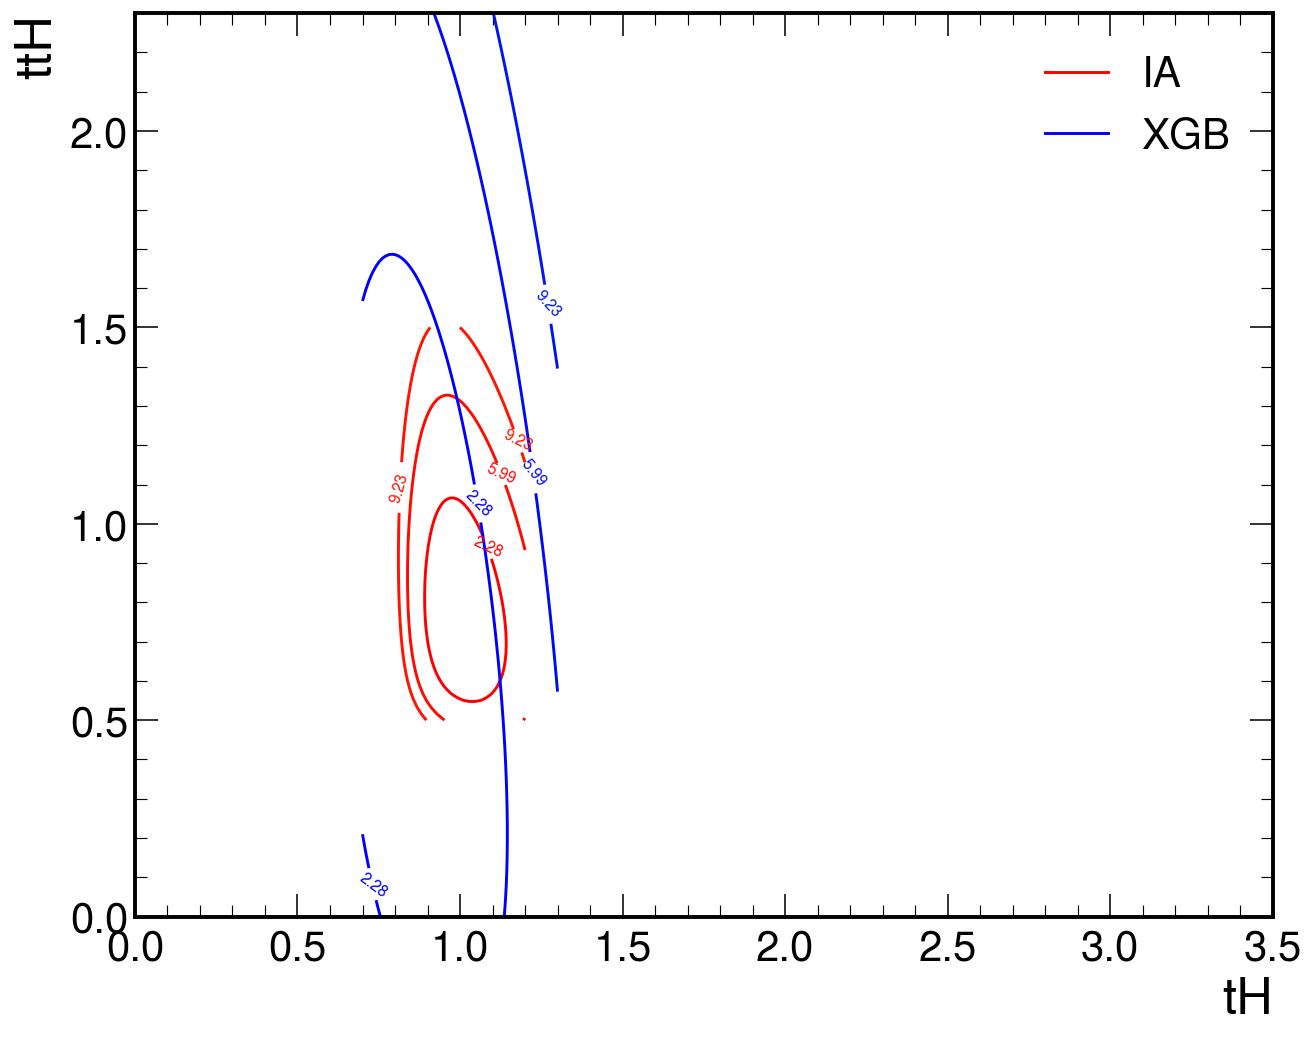

/tmp/ipykernel_1513565/3172586204.py:10: UserWarning: The following kwargs were not used by contour: 'labels'
  IA_c = plt.contour(x_grid_ia.numpy(), y_grid_ia.numpy(), deltLP34, levels=level,cmap = 'autumn',labels = 'IA')
/tmp/ipykernel_1513565/3172586204.py:11: UserWarning: The following kwargs were not used by contour: 'labels'
  XGB_c = plt.contour(x_grid_xgb.numpy(), y_grid_xgb.numpy(), deltLP34_xgb, levels=level,cmap = 'winter',labels = 'XGB')


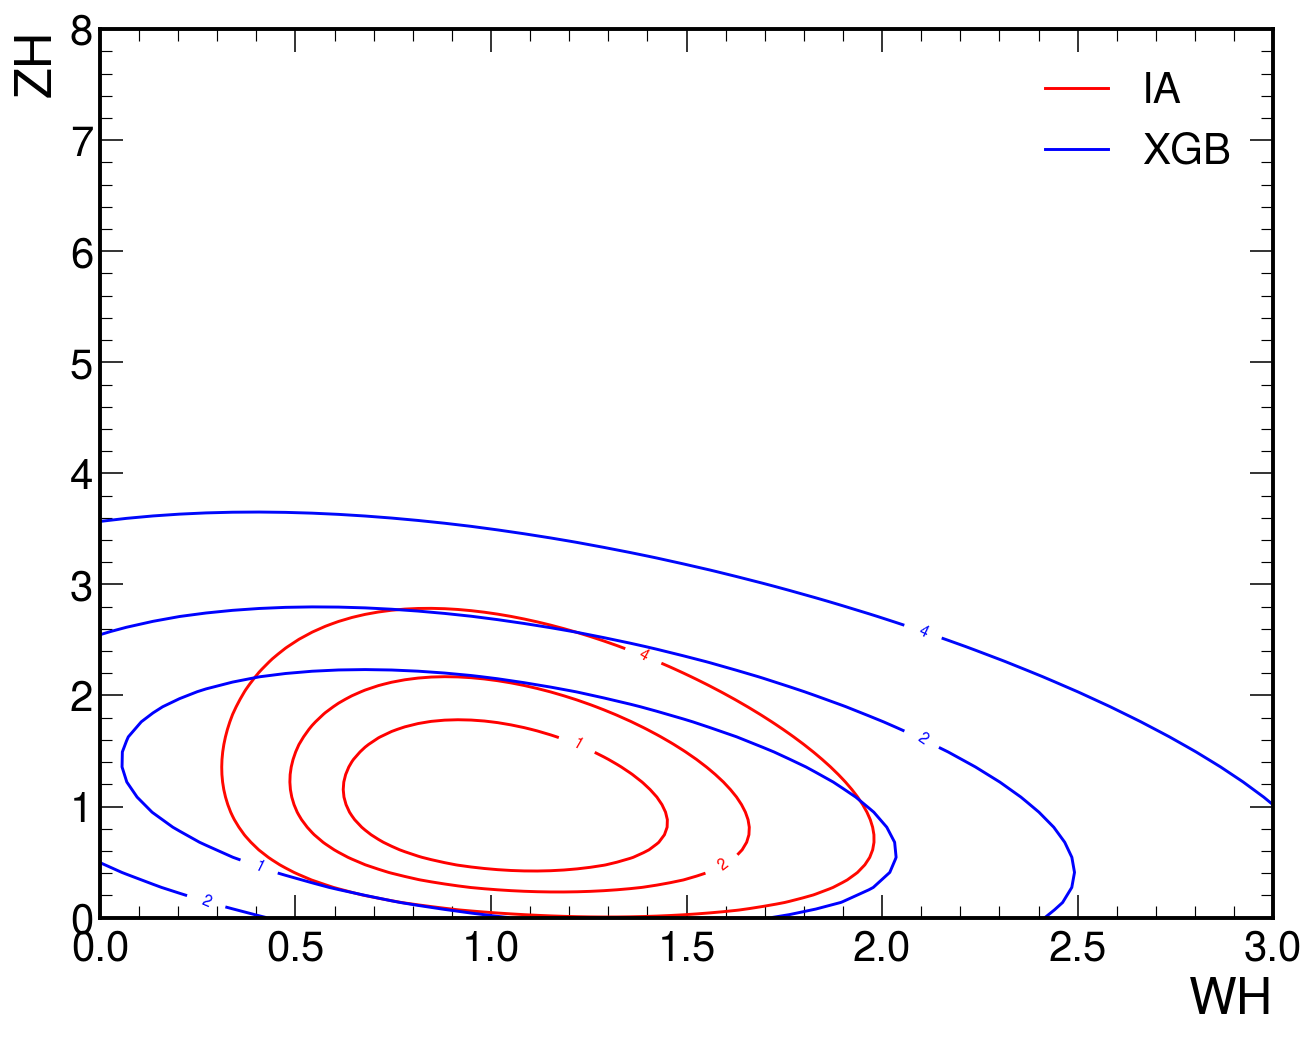

/tmp/ipykernel_3908848/2863019314.py:6: UserWarning: The following kwargs were not used by contour: 'labels'
  plt.contour(x_grid.numpy(), y_grid.numpy(), deltLP2, levels=level,cmap = 'autumn',labels = 'IA')
/tmp/ipykernel_3908848/2863019314.py:7: UserWarning: The following kwargs were not used by contour: 'labels'
  plt.contour(x_grid.numpy(), y_grid.numpy(), deltLP2_xgb, levels=level,cmap = 'winter',labels = 'XGB')


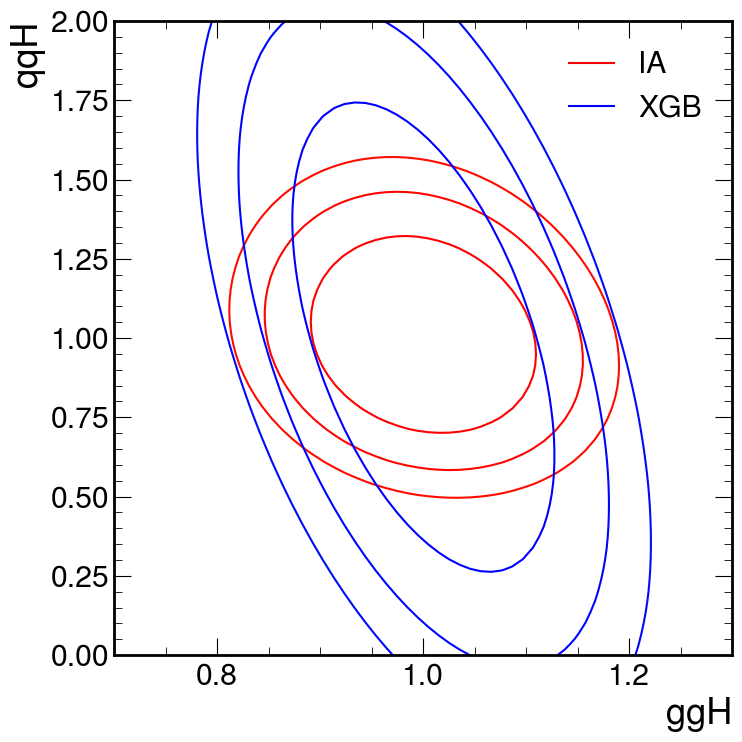

In [ ]:
x_range = torch.linspace(0.7,1.3,60)
y_range = torch.linspace(0,2,60)
x_grid,y_grid = torch.meshgrid(x_range, y_range, indexing='ij')
level=[2,4,6,90]
plt.figure(figsize=(8, 8))
plt.contour(x_grid.numpy(), y_grid.numpy(), deltLP2, levels=level,cmap = 'autumn',labels = 'IA')
plt.contour(x_grid.numpy(), y_grid.numpy(), deltLP2_xgb, levels=level,cmap = 'winter',labels = 'XGB')
plt.plot(1,1,color = 'red',label='IA')
plt.plot(1,1,color = 'b',label='XGB')
plt.xlabel('ggH')
plt.ylabel('qqH')
plt.legend()
plt.tight_layout()
plt.savefig(f'{folder_name}/Contour_12.pdf')


In [ ]:
pd.DataFrame(np.round(OC_ce_new,2))

0     1    2    3    4    5    6
0        0.05  0.04  0.0  0.0  0.0  0.0  0.0
1        0.96  0.00  0.0  0.0  0.0  0.0  0.0
2        0.96  0.00  0.0  0.0  0.0  0.0  0.0
3        0.96  0.00  0.0  0.0  0.0  0.0  0.0
4        0.00  0.00  0.0  0.0  0.0  0.0  0.0
...       ...   ...  ...  ...  ...  ...  ...
4154834  0.01  0.00  0.0  0.0  0.0  0.0  0.0
4154835  0.00  0.00  0.0  0.0  0.0  0.0  0.0
4154836  0.00  0.00  0.0  0.0  0.0  0.0  0.0
4154837  0.00  0.00  0.0  0.0  0.0  0.0  0.0
4154838  0.00  0.00  0.0  0.0  0.0  0.0  0.0

[4154839 rows x 7 columns]